# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:08:12.863720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:08:16.826848
2025-04-14 22:08:16.826848


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:08:10"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

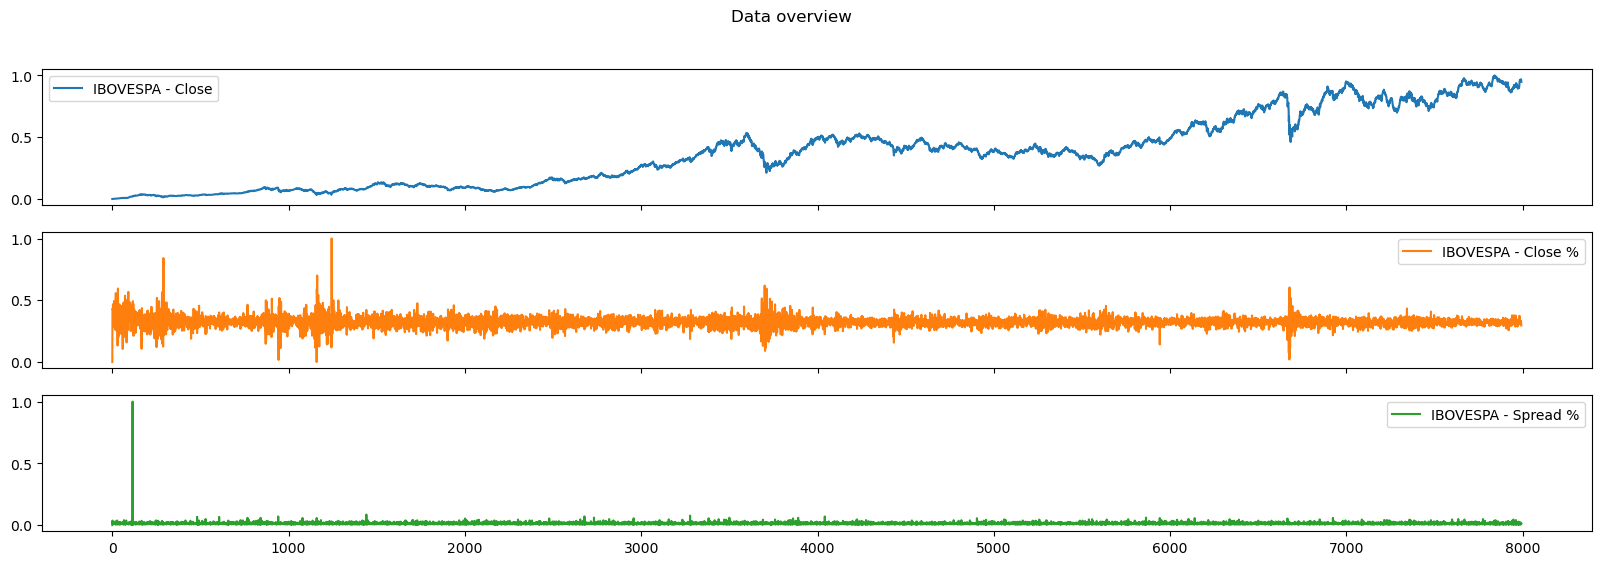

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

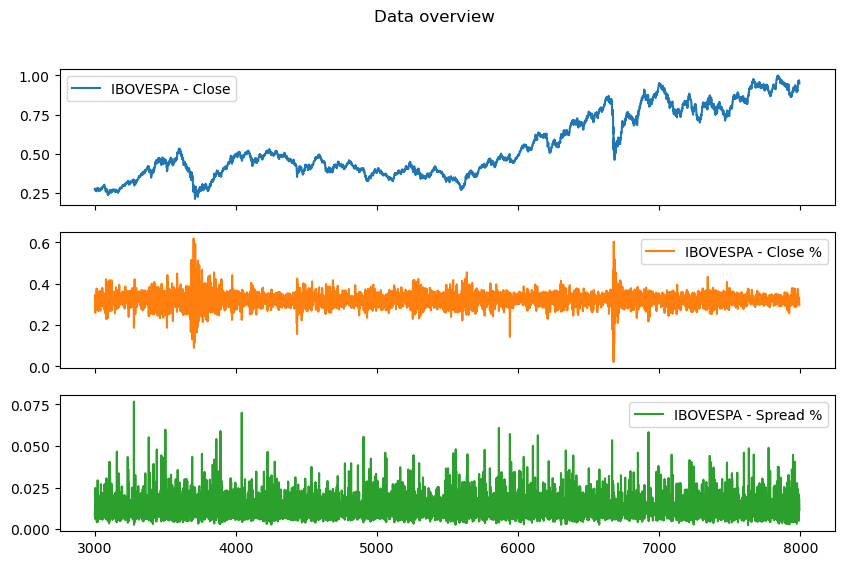

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

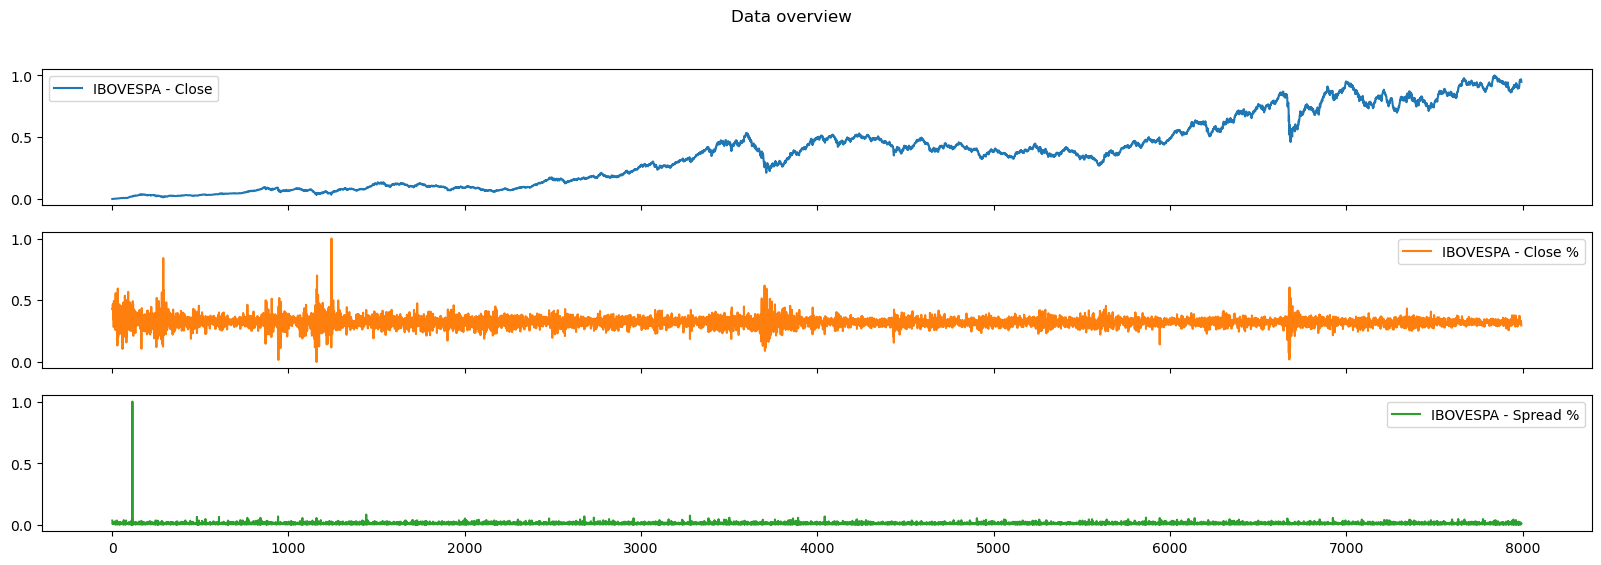

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

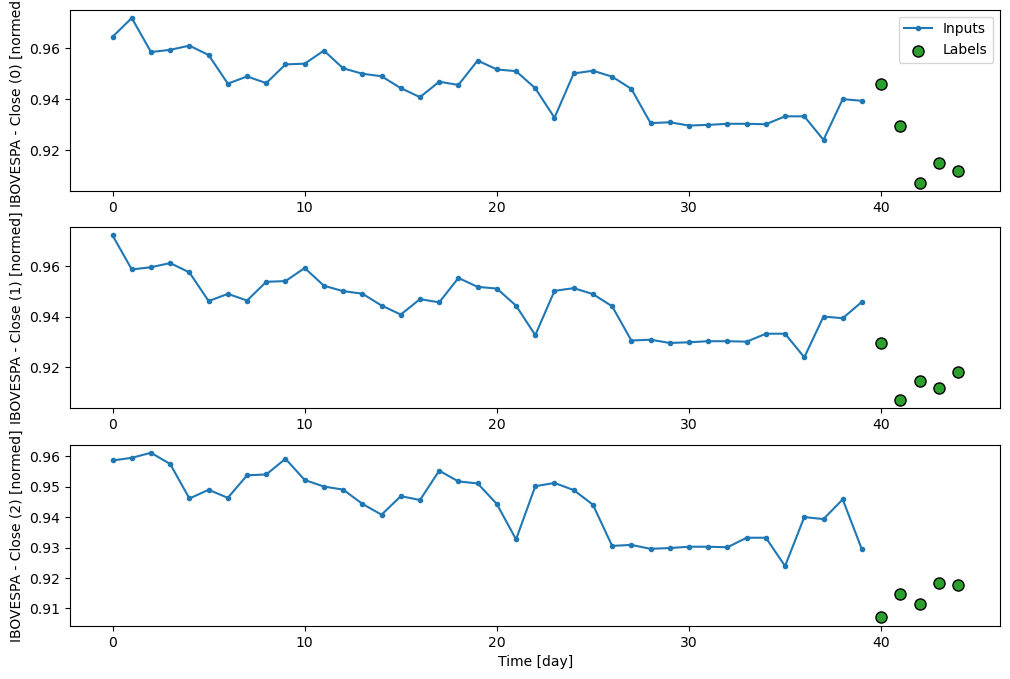

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18:15 5s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  2/237 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 97.4582 - mean_squared_error: 6.7359e-05 - root_mean_squared_error: 0.0082 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 93.8699 - mean_squared_error: 1.5625e-04 - root_mean_squared_error: 0.0119

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 86.5092 - mean_squared_error: 1.8230e-04 - root_mean_squared_error: 0.0130 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 80.5009 - mean_squared_error: 1.8557e-04 - root_mean_squared_error: 0.0133

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 77.8028 - mean_squared_error: 1.8380e-04 - root_mean_squared_error: 0.0132

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 72.9077 - mean_squared_error: 1.7762e-04 - root_mean_squared_error: 0.0131 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 68.4984 - mean_squared_error: 1.6991e-04 - root_mean_squared_error: 0.0128

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 64.7203 - mean_squared_error: 1.6255e-04 - root_mean_squared_error: 0.0125

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.7036 - mean_squared_error: 1.5694e-04 - root_mean_squared_error: 0.0123

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.1282 - mean_squared_error: 1.5216e-04 - root_mean_squared_error: 0.0121

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 56.8230 - mean_squared_error: 1.4760e-04 - root_mean_squared_error: 0.0119

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 54.7294 - mean_squared_error: 1.4345e-04 - root_mean_squared_error: 0.0118

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.9346 - mean_squared_error: 1.4157e-04 - root_mean_squared_error: 0.0117

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.3799 - mean_squared_error: 1.4267e-04 - root_mean_squared_error: 0.0118

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.9771 - mean_squared_error: 1.4447e-04 - root_mean_squared_error: 0.0118

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.7651 - mean_squared_error: 1.4782e-04 - root_mean_squared_error: 0.0120

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.6324 - mean_squared_error: 1.5052e-04 - root_mean_squared_error: 0.0121

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.5827 - mean_squared_error: 1.5284e-04 - root_mean_squared_error: 0.0122

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.7085 - mean_squared_error: 1.5620e-04 - root_mean_squared_error: 0.0123

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.9120 - mean_squared_error: 1.5924e-04 - root_mean_squared_error: 0.0125

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.2049 - mean_squared_error: 1.6346e-04 - root_mean_squared_error: 0.0126

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.5575 - mean_squared_error: 1.6790e-04 - root_mean_squared_error: 0.0128

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.9453 - mean_squared_error: 1.7216e-04 - root_mean_squared_error: 0.0129

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.3768 - mean_squared_error: 1.7738e-04 - root_mean_squared_error: 0.0131

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 41.8510 - mean_squared_error: 1.8343e-04 - root_mean_squared_error: 0.0133

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 41.3314 - mean_squared_error: 1.8872e-04 - root_mean_squared_error: 0.0135

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 40.8208 - mean_squared_error: 1.9327e-04 - root_mean_squared_error: 0.0136

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 40.3214 - mean_squared_error: 1.9725e-04 - root_mean_squared_error: 0.0138

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 39.8280 - mean_squared_error: 2.0060e-04 - root_mean_squared_error: 0.0139

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 39.3512 - mean_squared_error: 2.0355e-04 - root_mean_squared_error: 0.0140

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 38.8913 - mean_squared_error: 2.0619e-04 - root_mean_squared_error: 0.0141

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 38.4477 - mean_squared_error: 2.0854e-04 - root_mean_squared_error: 0.0142

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 38.0187 - mean_squared_error: 2.1061e-04 - root_mean_squared_error: 0.0142

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 37.6241 - mean_squared_error: 2.1281e-04 - root_mean_squared_error: 0.0143

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 37.2493 - mean_squared_error: 2.1488e-04 - root_mean_squared_error: 0.0144

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 36.8826 - mean_squared_error: 2.1669e-04 - root_mean_squared_error: 0.0145

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 36.5383 - mean_squared_error: 2.1872e-04 - root_mean_squared_error: 0.0145

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 36.2203 - mean_squared_error: 2.2164e-04 - root_mean_squared_error: 0.0146

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 35.9310 - mean_squared_error: 2.2698e-04 - root_mean_squared_error: 0.0148

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 35.6635 - mean_squared_error: 2.3399e-04 - root_mean_squared_error: 0.0150

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 35.4033 - mean_squared_error: 2.4079e-04 - root_mean_squared_error: 0.0152

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 35.1473 - mean_squared_error: 2.4718e-04 - root_mean_squared_error: 0.0153

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 34.8951 - mean_squared_error: 2.5318e-04 - root_mean_squared_error: 0.0155

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 34.6481 - mean_squared_error: 2.5905e-04 - root_mean_squared_error: 0.0157

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 34.4020 - mean_squared_error: 2.6443e-04 - root_mean_squared_error: 0.0158

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 34.1582 - mean_squared_error: 2.6945e-04 - root_mean_squared_error: 0.0160

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 33.9177 - mean_squared_error: 2.7423e-04 - root_mean_squared_error: 0.0161

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 33.6818 - mean_squared_error: 2.7900e-04 - root_mean_squared_error: 0.0162

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 33.4501 - mean_squared_error: 2.8372e-04 - root_mean_squared_error: 0.0164

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 33.2216 - mean_squared_error: 2.8831e-04 - root_mean_squared_error: 0.0165

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 33.0003 - mean_squared_error: 2.9372e-04 - root_mean_squared_error: 0.0166

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 32.7840 - mean_squared_error: 2.9944e-04 - root_mean_squared_error: 0.0168

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 32.5716 - mean_squared_error: 3.0556e-04 - root_mean_squared_error: 0.0169

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 32.3653 - mean_squared_error: 3.1325e-04 - root_mean_squared_error: 0.0171

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 32.1606 - mean_squared_error: 3.2058e-04 - root_mean_squared_error: 0.0173

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 31.9579 - mean_squared_error: 3.2765e-04 - root_mean_squared_error: 0.0175

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 31.7588 - mean_squared_error: 3.3530e-04 - root_mean_squared_error: 0.0176

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 31.5753 - mean_squared_error: 3.5149e-04 - root_mean_squared_error: 0.0179

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 31.4147 - mean_squared_error: 3.7989e-04 - root_mean_squared_error: 0.0184

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 31.2640 - mean_squared_error: 4.1076e-04 - root_mean_squared_error: 0.0189

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 31.1155 - mean_squared_error: 4.4063e-04 - root_mean_squared_error: 0.0194

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 30.9728 - mean_squared_error: 4.7267e-04 - root_mean_squared_error: 0.0198

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 30.8388 - mean_squared_error: 5.1183e-04 - root_mean_squared_error: 0.0204

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 30.7128 - mean_squared_error: 5.5801e-04 - root_mean_squared_error: 0.0210

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 30.5928 - mean_squared_error: 6.0735e-04 - root_mean_squared_error: 0.0216

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 30.4775 - mean_squared_error: 6.5855e-04 - root_mean_squared_error: 0.0222

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 30.3651 - mean_squared_error: 7.0993e-04 - root_mean_squared_error: 0.0229

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 30.2524 - mean_squared_error: 7.5923e-04 - root_mean_squared_error: 0.0235

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 30.1406 - mean_squared_error: 8.0685e-04 - root_mean_squared_error: 0.0241

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 30.0310 - mean_squared_error: 8.5341e-04 - root_mean_squared_error: 0.0246

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 29.9214 - mean_squared_error: 8.9811e-04 - root_mean_squared_error: 0.0252

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 29.8130 - mean_squared_error: 9.4158e-04 - root_mean_squared_error: 0.0257

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 29.7047 - mean_squared_error: 9.8349e-04 - root_mean_squared_error: 0.0262

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 29.5962 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0267    

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 29.4876 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 29.3788 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 29.2719 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 29.1681 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0285

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 29.0653 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0290

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 28.9640 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0294

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 28.8629 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0298

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 28.7630 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 28.6641 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 28.5650 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0309

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 28.4666 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0313

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 28.3685 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0316

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 28.2717 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 28.1776 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0323

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 28.0838 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0326

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 27.9907 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 27.8994 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 27.8101 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0335

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 27.7226 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0338

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 27.6365 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 27.5523 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 27.4697 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0347

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 27.3885 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 27.3076 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 27.2267 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 27.1459 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0359

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 27.0651 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0361

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 26.9844 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0364

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 26.9037 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 26.8232 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 26.7461 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0372

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 26.6714 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0375

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 26.5974 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0378

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 26.5243 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 26.4522 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 26.3817 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 26.3119 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0390

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 26.2421 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0393

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 26.1723 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0396

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 26.1031 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0399

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 26.0342 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0402

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 25.9652 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0405

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 25.8964 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0407

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 25.8279 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0410

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 25.7602 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0413

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 25.7268 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0414 - val_loss: 0.1530 - val_mean_absolute_error: 0.1530 - val_mean_absolute_percentage_error: 16.2902 - val_mean_squared_error: 0.0242 - val_root_mean_squared_error: 0.1557 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.7599 - mean_absolute_error: 0.7599 - mean_absolute_percentage_error: 10092.0234 - mean_squared_error: 0.5774 - root_mean_squared_error: 0.7599

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7582 - mean_absolute_error: 0.7582 - mean_absolute_percentage_error: 8416.1562 - mean_squared_error: 0.5750 - root_mean_squared_error: 0.7583  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7520 - mean_absolute_error: 0.7520 - mean_absolute_percentage_error: 7140.8364 - mean_squared_error: 0.5658 - root_mean_squared_error: 0.7521

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7436 - mean_absolute_error: 0.7436 - mean_absolute_percentage_error: 6323.5171 - mean_squared_error: 0.5536 - root_mean_squared_error: 0.7439

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7260 - mean_absolute_error: 0.7260 - mean_absolute_percentage_error: 5761.2632 - mean_squared_error: 0.5345 - root_mean_squared_error: 0.7305

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7636 - mean_absolute_error: 0.7636 - mean_absolute_percentage_error: 5556.3325 - mean_squared_error: 0.7127 - root_mean_squared_error: 0.8212

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7839 - mean_absolute_error: 0.7839 - mean_absolute_percentage_error: 5365.3696 - mean_squared_error: 0.8291 - root_mean_squared_error: 0.8813

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7899 - mean_absolute_error: 0.7899 - mean_absolute_percentage_error: 5171.6064 - mean_squared_error: 0.8922 - root_mean_squared_error: 0.9160

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7889 - mean_absolute_error: 0.7889 - mean_absolute_percentage_error: 4985.9150 - mean_squared_error: 0.9259 - root_mean_squared_error: 0.9360

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7819 - mean_absolute_error: 0.7819 - mean_absolute_percentage_error: 4805.3384 - mean_squared_error: 0.9401 - root_mean_squared_error: 0.9458

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7712 - mean_absolute_error: 0.7712 - mean_absolute_percentage_error: 4632.5942 - mean_squared_error: 0.9422 - root_mean_squared_error: 0.9492

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7590 - mean_absolute_error: 0.7590 - mean_absolute_percentage_error: 4470.5684 - mean_squared_error: 0.9373 - root_mean_squared_error: 0.9484

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7457 - mean_absolute_error: 0.7457 - mean_absolute_percentage_error: 4317.8579 - mean_squared_error: 0.9276 - root_mean_squared_error: 0.9448

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7315 - mean_absolute_error: 0.7315 - mean_absolute_percentage_error: 4174.1494 - mean_squared_error: 0.9148 - root_mean_squared_error: 0.9392

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7171 - mean_absolute_error: 0.7171 - mean_absolute_percentage_error: 4039.3357 - mean_squared_error: 0.9002 - root_mean_squared_error: 0.9323

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7028 - mean_absolute_error: 0.7028 - mean_absolute_percentage_error: 3913.2100 - mean_squared_error: 0.8846 - root_mean_squared_error: 0.9245

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6889 - mean_absolute_error: 0.6889 - mean_absolute_percentage_error: 3795.1516 - mean_squared_error: 0.8685 - root_mean_squared_error: 0.9161

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6753 - mean_absolute_error: 0.6753 - mean_absolute_percentage_error: 3684.5889 - mean_squared_error: 0.8522 - root_mean_squared_error: 0.9074

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6622 - mean_absolute_error: 0.6622 - mean_absolute_percentage_error: 3581.2632 - mean_squared_error: 0.8360 - root_mean_squared_error: 0.8986

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6495 - mean_absolute_error: 0.6495 - mean_absolute_percentage_error: 3484.2329 - mean_squared_error: 0.8201 - root_mean_squared_error: 0.8896

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6373 - mean_absolute_error: 0.6373 - mean_absolute_percentage_error: 3392.8169 - mean_squared_error: 0.8044 - root_mean_squared_error: 0.8807

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6254 - mean_absolute_error: 0.6254 - mean_absolute_percentage_error: 3306.5356 - mean_squared_error: 0.7891 - root_mean_squared_error: 0.8718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6140 - mean_absolute_error: 0.6140 - mean_absolute_percentage_error: 3225.0342 - mean_squared_error: 0.7742 - root_mean_squared_error: 0.8630

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6030 - mean_absolute_error: 0.6030 - mean_absolute_percentage_error: 3147.8872 - mean_squared_error: 0.7598 - root_mean_squared_error: 0.8544

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5924 - mean_absolute_error: 0.5924 - mean_absolute_percentage_error: 3074.7407 - mean_squared_error: 0.7459 - root_mean_squared_error: 0.8459

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5821 - mean_absolute_error: 0.5821 - mean_absolute_percentage_error: 3005.2961 - mean_squared_error: 0.7323 - root_mean_squared_error: 0.8375

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5723 - mean_absolute_error: 0.5723 - mean_absolute_percentage_error: 2939.3071 - mean_squared_error: 0.7193 - root_mean_squared_error: 0.8294

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5629 - mean_absolute_error: 0.5629 - mean_absolute_percentage_error: 2876.5164 - mean_squared_error: 0.7067 - root_mean_squared_error: 0.8214

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5538 - mean_absolute_error: 0.5538 - mean_absolute_percentage_error: 2816.7246 - mean_squared_error: 0.6945 - root_mean_squared_error: 0.8136

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5450 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 2759.7056 - mean_squared_error: 0.6827 - root_mean_squared_error: 0.8060

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5366 - mean_absolute_error: 0.5366 - mean_absolute_percentage_error: 2705.2563 - mean_squared_error: 0.6713 - root_mean_squared_error: 0.7986

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5285 - mean_absolute_error: 0.5285 - mean_absolute_percentage_error: 2653.1978 - mean_squared_error: 0.6603 - root_mean_squared_error: 0.7913

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5206 - mean_absolute_error: 0.5206 - mean_absolute_percentage_error: 2603.3884 - mean_squared_error: 0.6497 - root_mean_squared_error: 0.7843

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5130 - mean_absolute_error: 0.5130 - mean_absolute_percentage_error: 2555.7114 - mean_squared_error: 0.6395 - root_mean_squared_error: 0.7774

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5057 - mean_absolute_error: 0.5057 - mean_absolute_percentage_error: 2510.0183 - mean_squared_error: 0.6295 - root_mean_squared_error: 0.7706

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4987 - mean_absolute_error: 0.4987 - mean_absolute_percentage_error: 2466.1738 - mean_squared_error: 0.6199 - root_mean_squared_error: 0.7641

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4918 - mean_absolute_error: 0.4918 - mean_absolute_percentage_error: 2424.0554 - mean_squared_error: 0.6107 - root_mean_squared_error: 0.7577

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4852 - mean_absolute_error: 0.4852 - mean_absolute_percentage_error: 2383.5562 - mean_squared_error: 0.6017 - root_mean_squared_error: 0.7514

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4789 - mean_absolute_error: 0.4789 - mean_absolute_percentage_error: 2344.5781 - mean_squared_error: 0.5930 - root_mean_squared_error: 0.7453

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4727 - mean_absolute_error: 0.4727 - mean_absolute_percentage_error: 2307.0330 - mean_squared_error: 0.5845 - root_mean_squared_error: 0.7393

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4667 - mean_absolute_error: 0.4667 - mean_absolute_percentage_error: 2270.8508 - mean_squared_error: 0.5764 - root_mean_squared_error: 0.7335

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4610 - mean_absolute_error: 0.4610 - mean_absolute_percentage_error: 2235.9407 - mean_squared_error: 0.5685 - root_mean_squared_error: 0.7278

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4554 - mean_absolute_error: 0.4554 - mean_absolute_percentage_error: 2202.2383 - mean_squared_error: 0.5608 - root_mean_squared_error: 0.7223

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4500 - mean_absolute_error: 0.4500 - mean_absolute_percentage_error: 2169.6853 - mean_squared_error: 0.5533 - root_mean_squared_error: 0.7169

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4448 - mean_absolute_error: 0.4448 - mean_absolute_percentage_error: 2138.2153 - mean_squared_error: 0.5461 - root_mean_squared_error: 0.7116

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4397 - mean_absolute_error: 0.4397 - mean_absolute_percentage_error: 2107.7666 - mean_squared_error: 0.5391 - root_mean_squared_error: 0.7064

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4348 - mean_absolute_error: 0.4348 - mean_absolute_percentage_error: 2078.2847 - mean_squared_error: 0.5323 - root_mean_squared_error: 0.7014

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4300 - mean_absolute_error: 0.4300 - mean_absolute_percentage_error: 2049.7256 - mean_squared_error: 0.5256 - root_mean_squared_error: 0.6964

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 2022.0475 - mean_squared_error: 0.5192 - root_mean_squared_error: 0.6916

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4208 - mean_absolute_error: 0.4208 - mean_absolute_percentage_error: 1995.2068 - mean_squared_error: 0.5129 - root_mean_squared_error: 0.6868

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4164 - mean_absolute_error: 0.4164 - mean_absolute_percentage_error: 1969.1664 - mean_squared_error: 0.5068 - root_mean_squared_error: 0.6822

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 1943.8856 - mean_squared_error: 0.5009 - root_mean_squared_error: 0.6776

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4079 - mean_absolute_error: 0.4079 - mean_absolute_percentage_error: 1919.3293 - mean_squared_error: 0.4951 - root_mean_squared_error: 0.6732

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4039 - mean_absolute_error: 0.4039 - mean_absolute_percentage_error: 1895.4653 - mean_squared_error: 0.4894 - root_mean_squared_error: 0.6688

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 1872.2633 - mean_squared_error: 0.4839 - root_mean_squared_error: 0.6645

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3960 - mean_absolute_error: 0.3960 - mean_absolute_percentage_error: 1849.6952 - mean_squared_error: 0.4786 - root_mean_squared_error: 0.6604

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 1827.7346 - mean_squared_error: 0.4734 - root_mean_squared_error: 0.6562

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3886 - mean_absolute_error: 0.3886 - mean_absolute_percentage_error: 1806.3608 - mean_squared_error: 0.4683 - root_mean_squared_error: 0.6522

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3850 - mean_absolute_error: 0.3850 - mean_absolute_percentage_error: 1785.5516 - mean_squared_error: 0.4633 - root_mean_squared_error: 0.6483

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 1765.2885 - mean_squared_error: 0.4584 - root_mean_squared_error: 0.6444

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3782 - mean_absolute_error: 0.3782 - mean_absolute_percentage_error: 1745.5486 - mean_squared_error: 0.4537 - root_mean_squared_error: 0.6406

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3749 - mean_absolute_error: 0.3749 - mean_absolute_percentage_error: 1726.3053 - mean_squared_error: 0.4491 - root_mean_squared_error: 0.6369

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3718 - mean_absolute_error: 0.3718 - mean_absolute_percentage_error: 1707.5386 - mean_squared_error: 0.4446 - root_mean_squared_error: 0.6332

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3687 - mean_absolute_error: 0.3687 - mean_absolute_percentage_error: 1689.2310 - mean_squared_error: 0.4402 - root_mean_squared_error: 0.6297

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 1671.3646 - mean_squared_error: 0.4359 - root_mean_squared_error: 0.6262

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3627 - mean_absolute_error: 0.3627 - mean_absolute_percentage_error: 1653.9210 - mean_squared_error: 0.4317 - root_mean_squared_error: 0.6227

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1636.8861 - mean_squared_error: 0.4276 - root_mean_squared_error: 0.6193

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 1620.2441 - mean_squared_error: 0.4235 - root_mean_squared_error: 0.6160

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1603.9811 - mean_squared_error: 0.4196 - root_mean_squared_error: 0.6127

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3515 - mean_absolute_error: 0.3515 - mean_absolute_percentage_error: 1588.0846 - mean_squared_error: 0.4157 - root_mean_squared_error: 0.6095

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3489 - mean_absolute_error: 0.3489 - mean_absolute_percentage_error: 1572.5413 - mean_squared_error: 0.4120 - root_mean_squared_error: 0.6063

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 1557.3408 - mean_squared_error: 0.4083 - root_mean_squared_error: 0.6032

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1542.4712 - mean_squared_error: 0.4046 - root_mean_squared_error: 0.6002

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1527.9210 - mean_squared_error: 0.4011 - root_mean_squared_error: 0.5972

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3389 - mean_absolute_error: 0.3389 - mean_absolute_percentage_error: 1513.6782 - mean_squared_error: 0.3976 - root_mean_squared_error: 0.5942

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1499.7336 - mean_squared_error: 0.3942 - root_mean_squared_error: 0.5913

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1486.0780 - mean_squared_error: 0.3909 - root_mean_squared_error: 0.5884

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1472.7032 - mean_squared_error: 0.3876 - root_mean_squared_error: 0.5856

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 1459.5999 - mean_squared_error: 0.3844 - root_mean_squared_error: 0.5828

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1446.7584 - mean_squared_error: 0.3812 - root_mean_squared_error: 0.5801

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 1434.1708 - mean_squared_error: 0.3781 - root_mean_squared_error: 0.5774

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1421.8293 - mean_squared_error: 0.3751 - root_mean_squared_error: 0.5748

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1409.7261 - mean_squared_error: 0.3721 - root_mean_squared_error: 0.5721

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1397.8551 - mean_squared_error: 0.3692 - root_mean_squared_error: 0.5696

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1386.2092 - mean_squared_error: 0.3663 - root_mean_squared_error: 0.5670

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1374.7814 - mean_squared_error: 0.3635 - root_mean_squared_error: 0.5645

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1363.5653 - mean_squared_error: 0.3607 - root_mean_squared_error: 0.5621

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1352.5549 - mean_squared_error: 0.3580 - root_mean_squared_error: 0.5596

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1341.7439 - mean_squared_error: 0.3553 - root_mean_squared_error: 0.5572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1331.1265 - mean_squared_error: 0.3526 - root_mean_squared_error: 0.5549

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1320.6970 - mean_squared_error: 0.3500 - root_mean_squared_error: 0.5525

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1310.4506 - mean_squared_error: 0.3475 - root_mean_squared_error: 0.5502

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1300.3817 - mean_squared_error: 0.3450 - root_mean_squared_error: 0.5480

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1290.4861 - mean_squared_error: 0.3425 - root_mean_squared_error: 0.5457

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1280.7594 - mean_squared_error: 0.3401 - root_mean_squared_error: 0.5435

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1271.1964 - mean_squared_error: 0.3377 - root_mean_squared_error: 0.5413

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1261.7930 - mean_squared_error: 0.3354 - root_mean_squared_error: 0.5392

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2940 - mean_absolute_error: 0.2940 - mean_absolute_percentage_error: 1252.5460 - mean_squared_error: 0.3331 - root_mean_squared_error: 0.5370

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1243.4507 - mean_squared_error: 0.3308 - root_mean_squared_error: 0.5349

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1234.5039 - mean_squared_error: 0.3285 - root_mean_squared_error: 0.5329

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1225.7014 - mean_squared_error: 0.3263 - root_mean_squared_error: 0.5308

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1217.0392 - mean_squared_error: 0.3242 - root_mean_squared_error: 0.5288

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1208.5138 - mean_squared_error: 0.3220 - root_mean_squared_error: 0.5268

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1200.1219 - mean_squared_error: 0.3199 - root_mean_squared_error: 0.5248

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1191.8625 - mean_squared_error: 0.3179 - root_mean_squared_error: 0.5229

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1183.7313 - mean_squared_error: 0.3158 - root_mean_squared_error: 0.5210

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1175.7242 - mean_squared_error: 0.3138 - root_mean_squared_error: 0.5191

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1167.8386 - mean_squared_error: 0.3118 - root_mean_squared_error: 0.5172

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1160.0715 - mean_squared_error: 0.3099 - root_mean_squared_error: 0.5154

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1152.4200 - mean_squared_error: 0.3080 - root_mean_squared_error: 0.5135

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1144.8810 - mean_squared_error: 0.3061 - root_mean_squared_error: 0.5117

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2741 - mean_absolute_error: 0.2741 - mean_absolute_percentage_error: 1137.4523 - mean_squared_error: 0.3042 - root_mean_squared_error: 0.5100

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1130.1318 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5082

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1122.9167 - mean_squared_error: 0.3006 - root_mean_squared_error: 0.5065

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1115.8046 - mean_squared_error: 0.2988 - root_mean_squared_error: 0.5048

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1108.7930 - mean_squared_error: 0.2970 - root_mean_squared_error: 0.5031

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1101.8796 - mean_squared_error: 0.2953 - root_mean_squared_error: 0.5014

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1095.0625 - mean_squared_error: 0.2936 - root_mean_squared_error: 0.4997

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1088.3438 - mean_squared_error: 0.2919 - root_mean_squared_error: 0.4981

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1085.0261 - mean_squared_error: 0.2910 - root_mean_squared_error: 0.4973 - val_loss: 0.0538 - val_mean_absolute_error: 0.0538 - val_mean_absolute_percentage_error: 5.7527 - val_mean_squared_error: 0.0054 - val_root_mean_squared_error: 0.0733 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.9045 - mean_absolute_error: 0.9045 - mean_absolute_percentage_error: 12003.5127 - mean_squared_error: 0.8222 - root_mean_squared_error: 0.9067

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8898 - mean_absolute_error: 0.8898 - mean_absolute_percentage_error: 9926.0127 - mean_squared_error: 0.7994 - root_mean_squared_error: 0.8940  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8585 - mean_absolute_error: 0.8585 - mean_absolute_percentage_error: 8335.8203 - mean_squared_error: 0.7530 - root_mean_squared_error: 0.8670

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8156 - mean_absolute_error: 0.8156 - mean_absolute_percentage_error: 7260.6924 - mean_squared_error: 0.6967 - root_mean_squared_error: 0.8322

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7678 - mean_absolute_error: 0.7678 - mean_absolute_percentage_error: 6483.1455 - mean_squared_error: 0.6403 - root_mean_squared_error: 0.7951

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7240 - mean_absolute_error: 0.7240 - mean_absolute_percentage_error: 5888.0200 - mean_squared_error: 0.5913 - root_mean_squared_error: 0.7612

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6898 - mean_absolute_error: 0.6898 - mean_absolute_percentage_error: 5428.5996 - mean_squared_error: 0.5516 - root_mean_squared_error: 0.7330

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6622 - mean_absolute_error: 0.6622 - mean_absolute_percentage_error: 5061.2427 - mean_squared_error: 0.5191 - root_mean_squared_error: 0.7092

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6378 - mean_absolute_error: 0.6378 - mean_absolute_percentage_error: 4752.7910 - mean_squared_error: 0.4909 - root_mean_squared_error: 0.6880

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6150 - mean_absolute_error: 0.6150 - mean_absolute_percentage_error: 4485.6045 - mean_squared_error: 0.4658 - root_mean_squared_error: 0.6684

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5941 - mean_absolute_error: 0.5941 - mean_absolute_percentage_error: 4252.0698 - mean_squared_error: 0.4434 - root_mean_squared_error: 0.6505

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5752 - mean_absolute_error: 0.5752 - mean_absolute_percentage_error: 4046.4568 - mean_squared_error: 0.4235 - root_mean_squared_error: 0.6342

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5580 - mean_absolute_error: 0.5580 - mean_absolute_percentage_error: 3862.9736 - mean_squared_error: 0.4055 - root_mean_squared_error: 0.6191

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5420 - mean_absolute_error: 0.5420 - mean_absolute_percentage_error: 3697.7935 - mean_squared_error: 0.3893 - root_mean_squared_error: 0.6052

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5271 - mean_absolute_error: 0.5271 - mean_absolute_percentage_error: 3548.2227 - mean_squared_error: 0.3744 - root_mean_squared_error: 0.5923

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5132 - mean_absolute_error: 0.5132 - mean_absolute_percentage_error: 3412.0959 - mean_squared_error: 0.3608 - root_mean_squared_error: 0.5802

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5002 - mean_absolute_error: 0.5002 - mean_absolute_percentage_error: 3287.5234 - mean_squared_error: 0.3483 - root_mean_squared_error: 0.5688

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4879 - mean_absolute_error: 0.4879 - mean_absolute_percentage_error: 3173.0798 - mean_squared_error: 0.3367 - root_mean_squared_error: 0.5581

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4763 - mean_absolute_error: 0.4763 - mean_absolute_percentage_error: 3067.6621 - mean_squared_error: 0.3260 - root_mean_squared_error: 0.5481

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4654 - mean_absolute_error: 0.4654 - mean_absolute_percentage_error: 2970.2224 - mean_squared_error: 0.3161 - root_mean_squared_error: 0.5386

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4551 - mean_absolute_error: 0.4551 - mean_absolute_percentage_error: 2879.7122 - mean_squared_error: 0.3068 - root_mean_squared_error: 0.5296

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4454 - mean_absolute_error: 0.4454 - mean_absolute_percentage_error: 2795.3213 - mean_squared_error: 0.2981 - root_mean_squared_error: 0.5211

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4360 - mean_absolute_error: 0.4360 - mean_absolute_percentage_error: 2716.3818 - mean_squared_error: 0.2900 - root_mean_squared_error: 0.5130

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4271 - mean_absolute_error: 0.4271 - mean_absolute_percentage_error: 2642.3484 - mean_squared_error: 0.2823 - root_mean_squared_error: 0.5053

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4186 - mean_absolute_error: 0.4186 - mean_absolute_percentage_error: 2572.7737 - mean_squared_error: 0.2751 - root_mean_squared_error: 0.4980

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4106 - mean_absolute_error: 0.4106 - mean_absolute_percentage_error: 2507.2585 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.4909

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4028 - mean_absolute_error: 0.4028 - mean_absolute_percentage_error: 2445.4392 - mean_squared_error: 0.2619 - root_mean_squared_error: 0.4842

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 2386.9790 - mean_squared_error: 0.2558 - root_mean_squared_error: 0.4778

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 2331.5996 - mean_squared_error: 0.2500 - root_mean_squared_error: 0.4716

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 2279.0620 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4656

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3749 - mean_absolute_error: 0.3749 - mean_absolute_percentage_error: 2229.1704 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4599

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - mean_absolute_percentage_error: 2181.7183 - mean_squared_error: 0.2343 - root_mean_squared_error: 0.4544

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3625 - mean_absolute_error: 0.3625 - mean_absolute_percentage_error: 2136.5356 - mean_squared_error: 0.2295 - root_mean_squared_error: 0.4491

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 2093.4551 - mean_squared_error: 0.2250 - root_mean_squared_error: 0.4440

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 2052.3467 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4391

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 2013.0439 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4344

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 1975.4250 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4298

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1939.3737 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4254

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3309 - mean_absolute_error: 0.3309 - mean_absolute_percentage_error: 1904.7856 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4211

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3263 - mean_absolute_error: 0.3263 - mean_absolute_percentage_error: 1871.5720 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4169

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1839.6517 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4129

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3175 - mean_absolute_error: 0.3175 - mean_absolute_percentage_error: 1808.9438 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4090

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3134 - mean_absolute_error: 0.3134 - mean_absolute_percentage_error: 1779.3804 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4052

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1750.8954 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4015

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1723.4238 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.3979

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1696.9088 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3945

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1671.2974 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3911

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1646.5431 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3878

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1622.6028 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3846

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1599.4366 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3815

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1577.0045 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3784

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1555.2722 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3755

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1534.2042 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3726

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1513.7689 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3697

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1493.9381 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3670

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1474.6857 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3643

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1455.9838 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3617

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1437.8120 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3591

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1420.1505 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3566

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1402.9774 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3542

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1386.2748 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3518

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1370.0187 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3495

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2520 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 1354.1890 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3473

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1338.7679 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3451

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1323.7401 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3430

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1309.0883 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3409

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1294.7987 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3389

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1280.8564 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3369

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1267.2483 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3349

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1253.9629 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3330

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1240.9874 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3311

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1228.3123 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3293

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1215.9269 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3274

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1203.8196 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3257

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1191.9802 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3239

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1180.3998 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3222

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1169.0701 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3205

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1157.9830 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3189

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1147.1307 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3172

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1136.5050 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3156

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2200 - mean_absolute_error: 0.2200 - mean_absolute_percentage_error: 1126.0974 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3141

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1115.9011 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3125

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1105.9109 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3110

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1096.1204 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3095

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1086.5236 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3080

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1077.1140 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3066

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 1067.8870 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3052

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1058.8364 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3037

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 1049.9598 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3024

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 1041.2516 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3010

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 1032.7046 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.2997

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 1024.3148 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.2984

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 1016.0776 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.2971

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 1007.9880 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.2958

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 1000.0432 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2946

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 992.2386 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.2933 

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 984.5697 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.2921

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 977.0343 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.2910

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 969.6283 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2898

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 962.3475 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2886

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 955.1888 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.2875

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 948.1489 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2864

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 941.2241 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2853

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 934.4115 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2842

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 927.7105 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.2832

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 921.1168 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2821

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 914.6277 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2811

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 908.2409 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2801

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 901.9534 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2791

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1883 - mean_absolute_error: 0.1883 - mean_absolute_percentage_error: 895.7624 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2781

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 889.6669 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2772

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 883.6645 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2762

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 877.7524 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2753

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 871.9285 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.2744

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 866.1906 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2735

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - mean_absolute_percentage_error: 860.5368 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2726

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 854.9658 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.2717

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 849.4752 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2708

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 844.0656 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2700

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 841.3945 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2696 - val_loss: 0.1218 - val_mean_absolute_error: 0.1218 - val_mean_absolute_percentage_error: 12.9535 - val_mean_squared_error: 0.0161 - val_root_mean_squared_error: 0.1268 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.8054 - mean_absolute_error: 0.8054 - mean_absolute_percentage_error: 10696.1895 - mean_squared_error: 0.6492 - root_mean_squared_error: 0.8057

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7916 - mean_absolute_error: 0.7916 - mean_absolute_percentage_error: 8842.3457 - mean_squared_error: 0.6278 - root_mean_squared_error: 0.7922  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7642 - mean_absolute_error: 0.7642 - mean_absolute_percentage_error: 7427.0356 - mean_squared_error: 0.5890 - root_mean_squared_error: 0.7667

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7268 - mean_absolute_error: 0.7268 - mean_absolute_percentage_error: 6471.2607 - mean_squared_error: 0.5431 - root_mean_squared_error: 0.7346

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6817 - mean_absolute_error: 0.6817 - mean_absolute_percentage_error: 5765.3569 - mean_squared_error: 0.4973 - root_mean_squared_error: 0.7002

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6402 - mean_absolute_error: 0.6402 - mean_absolute_percentage_error: 5223.2744 - mean_squared_error: 0.4575 - root_mean_squared_error: 0.6688

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6081 - mean_absolute_error: 0.6081 - mean_absolute_percentage_error: 4806.6270 - mean_squared_error: 0.4256 - root_mean_squared_error: 0.6429

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5829 - mean_absolute_error: 0.5829 - mean_absolute_percentage_error: 4475.9102 - mean_squared_error: 0.4000 - root_mean_squared_error: 0.6216

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5611 - mean_absolute_error: 0.5611 - mean_absolute_percentage_error: 4200.0605 - mean_squared_error: 0.3782 - root_mean_squared_error: 0.6030

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5410 - mean_absolute_error: 0.5410 - mean_absolute_percentage_error: 3962.3291 - mean_squared_error: 0.3588 - root_mean_squared_error: 0.5859

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5223 - mean_absolute_error: 0.5223 - mean_absolute_percentage_error: 3754.0903 - mean_squared_error: 0.3415 - root_mean_squared_error: 0.5702

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5055 - mean_absolute_error: 0.5055 - mean_absolute_percentage_error: 3571.0557 - mean_squared_error: 0.3261 - root_mean_squared_error: 0.5559

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.4902 - mean_absolute_error: 0.4902 - mean_absolute_percentage_error: 3407.9631 - mean_squared_error: 0.3123 - root_mean_squared_error: 0.5427

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.4758 - mean_absolute_error: 0.4758 - mean_absolute_percentage_error: 3260.9670 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5304

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 3127.7886 - mean_squared_error: 0.2881 - root_mean_squared_error: 0.5189

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4496 - mean_absolute_error: 0.4496 - mean_absolute_percentage_error: 3006.4797 - mean_squared_error: 0.2776 - root_mean_squared_error: 0.5082

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4376 - mean_absolute_error: 0.4376 - mean_absolute_percentage_error: 2895.4480 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.4981

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4263 - mean_absolute_error: 0.4263 - mean_absolute_percentage_error: 2793.5388 - mean_squared_error: 0.2588 - root_mean_squared_error: 0.4886

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - mean_absolute_percentage_error: 2699.5461 - mean_squared_error: 0.2505 - root_mean_squared_error: 0.4796

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4058 - mean_absolute_error: 0.4058 - mean_absolute_percentage_error: 2612.7837 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4712

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 2532.3435 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4633

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 2457.4082 - mean_squared_error: 0.2288 - root_mean_squared_error: 0.4557

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3794 - mean_absolute_error: 0.3794 - mean_absolute_percentage_error: 2387.4536 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4486

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3716 - mean_absolute_error: 0.3716 - mean_absolute_percentage_error: 2321.9524 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4418

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3641 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 2260.4182 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4353

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 2202.5188 - mean_squared_error: 0.2057 - root_mean_squared_error: 0.4291

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3503 - mean_absolute_error: 0.3503 - mean_absolute_percentage_error: 2147.9412 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4232

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3439 - mean_absolute_error: 0.3439 - mean_absolute_percentage_error: 2096.3550 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4176

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 2047.5330 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4122

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 2001.2705 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4070

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3263 - mean_absolute_error: 0.3263 - mean_absolute_percentage_error: 1957.3579 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.4020

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1915.6057 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3972

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3158 - mean_absolute_error: 0.3158 - mean_absolute_percentage_error: 1875.8673 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3926

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1837.9877 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3882

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1801.8558 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3839

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1767.3306 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3797

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2972 - mean_absolute_error: 0.2972 - mean_absolute_percentage_error: 1734.2970 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3758

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1702.6494 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3719

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1672.2950 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3682

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2850 - mean_absolute_error: 0.2850 - mean_absolute_percentage_error: 1643.1520 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3645

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1615.1519 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3610

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1588.2218 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3577

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 1562.3005 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3544

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1537.3263 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3512

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1513.2495 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3481

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1490.0188 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3451

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1467.5862 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3422

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1445.9098 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3393

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 1424.9485 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3366

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1404.6677 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3339

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1385.0310 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3313

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1366.0068 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3287

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1347.5648 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3262

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1329.6766 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3238

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1312.3169 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3214

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1295.4613 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3191

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1279.0875 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3169

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1263.1785 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3147

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1247.7179 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3126

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 1232.6835 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3105

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1218.0627 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3085

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1203.8361 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3065

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2234 - mean_absolute_error: 0.2234 - mean_absolute_percentage_error: 1189.9827 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.3046

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1176.4866 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3028

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2200 - mean_absolute_error: 0.2200 - mean_absolute_percentage_error: 1163.3385 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3010

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1150.5231 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2992

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1138.0233 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2975

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1125.8269 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2958

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1113.9232 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2942

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1102.3011 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2926

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 1090.9498 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.2910

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 1079.8608 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2895

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 1069.0243 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.2880

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 1058.4296 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2865

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 1048.0685 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2850

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 1037.9329 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2836

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 1028.0156 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2822

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 1018.3101 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.2808

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 1008.8091 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2794

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 999.5068 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2781 

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 990.3956 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2768

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 981.4693 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2755

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 972.7229 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2742

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 964.1502 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2729

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 955.7460 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2717

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1923 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 947.5053 - mean_squared_error: 0.0909 - root_mean_squared_error: 0.2705

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 939.4237 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2693

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 931.4962 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2681

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 923.7203 - mean_squared_error: 0.0887 - root_mean_squared_error: 0.2669

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 916.0910 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2658

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 908.6028 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2647

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 901.2517 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2635

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 894.0341 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2625

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 886.9455 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2614

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 879.9833 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2603

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 873.1439 - mean_squared_error: 0.0842 - root_mean_squared_error: 0.2593

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 866.4232 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2583

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 859.8195 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2573

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 853.3290 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2563

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 846.9479 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2553

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 840.6736 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2544

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 834.5029 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2534

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 828.4329 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2525

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 822.4607 - mean_squared_error: 0.0796 - root_mean_squared_error: 0.2516

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 816.5869 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2507

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 810.8071 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2498

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1739 - mean_absolute_error: 0.1739 - mean_absolute_percentage_error: 805.1186 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2490

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1732 - mean_absolute_error: 0.1732 - mean_absolute_percentage_error: 799.5199 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2481

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 794.0079 - mean_squared_error: 0.0771 - root_mean_squared_error: 0.2473

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 788.5802 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2465

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 783.2362 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2457

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 777.9746 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2449

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 772.7923 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2441

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 767.6870 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2434

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 762.6571 - mean_squared_error: 0.0744 - root_mean_squared_error: 0.2426

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 757.7014 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2419

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1676 - mean_absolute_error: 0.1676 - mean_absolute_percentage_error: 752.8181 - mean_squared_error: 0.0735 - root_mean_squared_error: 0.2412

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 748.0049 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2405

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1665 - mean_absolute_error: 0.1665 - mean_absolute_percentage_error: 743.2627 - mean_squared_error: 0.0727 - root_mean_squared_error: 0.2398

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1662 - mean_absolute_error: 0.1662 - mean_absolute_percentage_error: 740.9211 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2394 - val_loss: 0.1029 - val_mean_absolute_error: 0.1029 - val_mean_absolute_percentage_error: 10.9691 - val_mean_squared_error: 0.0128 - val_root_mean_squared_error: 0.1133 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.8651 - mean_absolute_error: 0.8651 - mean_absolute_percentage_error: 11487.1484 - mean_squared_error: 0.7566 - root_mean_squared_error: 0.8698

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8537 - mean_absolute_error: 0.8537 - mean_absolute_percentage_error: 9518.4951 - mean_squared_error: 0.7399 - root_mean_squared_error: 0.8601  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8299 - mean_absolute_error: 0.8299 - mean_absolute_percentage_error: 8016.1128 - mean_squared_error: 0.7059 - root_mean_squared_error: 0.8397

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7974 - mean_absolute_error: 0.7974 - mean_absolute_percentage_error: 7013.4688 - mean_squared_error: 0.6636 - root_mean_squared_error: 0.8132

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7579 - mean_absolute_error: 0.7579 - mean_absolute_percentage_error: 6293.1211 - mean_squared_error: 0.6190 - root_mean_squared_error: 0.7836

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7186 - mean_absolute_error: 0.7186 - mean_absolute_percentage_error: 5733.9653 - mean_squared_error: 0.5770 - root_mean_squared_error: 0.7544

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6850 - mean_absolute_error: 0.6850 - mean_absolute_percentage_error: 5291.5273 - mean_squared_error: 0.5405 - root_mean_squared_error: 0.7280

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6569 - mean_absolute_error: 0.6569 - mean_absolute_percentage_error: 4934.1733 - mean_squared_error: 0.5095 - root_mean_squared_error: 0.7049

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6329 - mean_absolute_error: 0.6329 - mean_absolute_percentage_error: 4636.0200 - mean_squared_error: 0.4828 - root_mean_squared_error: 0.6845

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6109 - mean_absolute_error: 0.6109 - mean_absolute_percentage_error: 4378.7520 - mean_squared_error: 0.4590 - root_mean_squared_error: 0.6658

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5904 - mean_absolute_error: 0.5904 - mean_absolute_percentage_error: 4153.0869 - mean_squared_error: 0.4376 - root_mean_squared_error: 0.6485

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5716 - mean_absolute_error: 0.5716 - mean_absolute_percentage_error: 3953.5371 - mean_squared_error: 0.4183 - root_mean_squared_error: 0.6325

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5545 - mean_absolute_error: 0.5545 - mean_absolute_percentage_error: 3775.4253 - mean_squared_error: 0.4009 - root_mean_squared_error: 0.6177

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5386 - mean_absolute_error: 0.5386 - mean_absolute_percentage_error: 3614.9360 - mean_squared_error: 0.3851 - root_mean_squared_error: 0.6041

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5239 - mean_absolute_error: 0.5239 - mean_absolute_percentage_error: 3469.5254 - mean_squared_error: 0.3707 - root_mean_squared_error: 0.5913

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5100 - mean_absolute_error: 0.5100 - mean_absolute_percentage_error: 3336.9707 - mean_squared_error: 0.3574 - root_mean_squared_error: 0.5793

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4970 - mean_absolute_error: 0.4970 - mean_absolute_percentage_error: 3215.6660 - mean_squared_error: 0.3451 - root_mean_squared_error: 0.5681

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4848 - mean_absolute_error: 0.4848 - mean_absolute_percentage_error: 3104.2769 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5575

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - mean_absolute_percentage_error: 3001.7454 - mean_squared_error: 0.3233 - root_mean_squared_error: 0.5476

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4626 - mean_absolute_error: 0.4626 - mean_absolute_percentage_error: 2906.8584 - mean_squared_error: 0.3135 - root_mean_squared_error: 0.5382

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4524 - mean_absolute_error: 0.4524 - mean_absolute_percentage_error: 2818.6609 - mean_squared_error: 0.3044 - root_mean_squared_error: 0.5293

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4426 - mean_absolute_error: 0.4426 - mean_absolute_percentage_error: 2736.4028 - mean_squared_error: 0.2959 - root_mean_squared_error: 0.5208

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4334 - mean_absolute_error: 0.4334 - mean_absolute_percentage_error: 2659.4719 - mean_squared_error: 0.2878 - root_mean_squared_error: 0.5128

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4246 - mean_absolute_error: 0.4246 - mean_absolute_percentage_error: 2587.3193 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5051

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4162 - mean_absolute_error: 0.4162 - mean_absolute_percentage_error: 2519.5063 - mean_squared_error: 0.2732 - root_mean_squared_error: 0.4978

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4082 - mean_absolute_error: 0.4082 - mean_absolute_percentage_error: 2455.6313 - mean_squared_error: 0.2665 - root_mean_squared_error: 0.4908

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 2395.3323 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4841

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 2338.3081 - mean_squared_error: 0.2541 - root_mean_squared_error: 0.4777

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3862 - mean_absolute_error: 0.3862 - mean_absolute_percentage_error: 2284.2920 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4715

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3795 - mean_absolute_error: 0.3795 - mean_absolute_percentage_error: 2233.0381 - mean_squared_error: 0.2430 - root_mean_squared_error: 0.4656

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3730 - mean_absolute_error: 0.3730 - mean_absolute_percentage_error: 2184.3477 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4599

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3668 - mean_absolute_error: 0.3668 - mean_absolute_percentage_error: 2138.0322 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4545

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 2093.9133 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4492

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3551 - mean_absolute_error: 0.3551 - mean_absolute_percentage_error: 2051.8501 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4441

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 2011.6865 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4392

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3443 - mean_absolute_error: 0.3443 - mean_absolute_percentage_error: 1973.2922 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4345

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1936.5402 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4299

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1901.3190 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4255

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 1867.5291 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4212

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1835.0759 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4171

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1803.8926 - mean_squared_error: 0.1971 - root_mean_squared_error: 0.4131

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 1773.8950 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4092

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1745.0143 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4054

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1717.1844 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4018

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1690.3448 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.3982

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1664.4430 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3947

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1639.4237 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3914

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1615.2413 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3881

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1591.8549 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3849

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2869 - mean_absolute_error: 0.2869 - mean_absolute_percentage_error: 1569.2230 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3818

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1547.3112 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3788

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1526.0830 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3759

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1505.5023 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3730

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1485.5388 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3702

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1466.1631 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3675

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1447.3489 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3648

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1429.0719 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3622

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1411.3129 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3597

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1394.0551 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3572

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1377.2711 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3548

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1360.9476 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3524

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1345.0657 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3502

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1329.6019 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3480

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1314.5350 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3459

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1299.8547 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3438

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1285.5454 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3417

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1271.5879 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3398

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1257.9678 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3378

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1244.6731 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3359

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1231.6913 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3340

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1219.0101 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3322

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 1206.6195 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3304

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1194.5100 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3286

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1182.6716 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3269

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1171.0936 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3252

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1159.7677 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3235

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1148.6854 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3218

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1137.8397 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3202

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1127.2223 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3186

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1116.8252 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3170

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 1106.6407 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3155

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1096.6621 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3139

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1086.8839 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3124

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1077.3002 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3109

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1067.9055 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3095

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1058.6936 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3081

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1049.6588 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3066

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1040.7963 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3053

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1032.1022 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3039

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 1023.5712 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3025

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 1015.1975 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3012

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 1006.9771 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.2999

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 998.9056 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.2986 

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 990.9781 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.2974

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 983.1921 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.2961

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 975.5431 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.2949

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 968.0269 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.2937

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 960.6412 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.2925

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 953.3821 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2913

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1995 - mean_absolute_error: 0.1995 - mean_absolute_percentage_error: 946.2449 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2902

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 939.2271 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.2890

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 932.3250 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.2879

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 925.5352 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.2868

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 918.8549 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2857

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 912.2842 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.2847

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 905.8189 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2836

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 899.4554 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2826

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 893.1924 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2816

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 887.0271 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.2806

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 880.9564 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2796

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 874.9791 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2787

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 869.0946 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2777

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1883 - mean_absolute_error: 0.1883 - mean_absolute_percentage_error: 863.2995 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2768

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 857.5909 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2759

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 851.9673 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2751

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 846.4267 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2742

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 840.9670 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2734

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1849 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 835.5858 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2725

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 827.6660 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2713 - val_loss: 0.0490 - val_mean_absolute_error: 0.0490 - val_mean_absolute_percentage_error: 5.3161 - val_mean_squared_error: 0.0034 - val_root_mean_squared_error: 0.0584 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.9716 - mean_absolute_error: 0.9716 - mean_absolute_percentage_error: 12897.9062 - mean_squared_error: 0.9446 - root_mean_squared_error: 0.9719

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9702 - mean_absolute_error: 0.9702 - mean_absolute_percentage_error: 10762.6670 - mean_squared_error: 0.9427 - root_mean_squared_error: 0.9709 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9572 - mean_absolute_error: 0.9572 - mean_absolute_percentage_error: 9117.0781 - mean_squared_error: 0.9197 - root_mean_squared_error: 0.9589 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.9360 - mean_absolute_error: 0.9360 - mean_absolute_percentage_error: 8037.8442 - mean_squared_error: 0.8841 - root_mean_squared_error: 0.9396

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.9075 - mean_absolute_error: 0.9075 - mean_absolute_percentage_error: 7294.4512 - mean_squared_error: 0.8406 - root_mean_squared_error: 0.9152

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8720 - mean_absolute_error: 0.8720 - mean_absolute_percentage_error: 6702.8564 - mean_squared_error: 0.7933 - root_mean_squared_error: 0.8872

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8336 - mean_absolute_error: 0.8336 - mean_absolute_percentage_error: 6206.7773 - mean_squared_error: 0.7470 - root_mean_squared_error: 0.8587

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7983 - mean_absolute_error: 0.7983 - mean_absolute_percentage_error: 5793.6104 - mean_squared_error: 0.7052 - root_mean_squared_error: 0.8320

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7680 - mean_absolute_error: 0.7680 - mean_absolute_percentage_error: 5447.2329 - mean_squared_error: 0.6687 - root_mean_squared_error: 0.8080

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7415 - mean_absolute_error: 0.7415 - mean_absolute_percentage_error: 5150.7178 - mean_squared_error: 0.6366 - root_mean_squared_error: 0.7864

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7174 - mean_absolute_error: 0.7174 - mean_absolute_percentage_error: 4890.8687 - mean_squared_error: 0.6078 - root_mean_squared_error: 0.7666

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6945 - mean_absolute_error: 0.6945 - mean_absolute_percentage_error: 4659.3145 - mean_squared_error: 0.5816 - root_mean_squared_error: 0.7481

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6731 - mean_absolute_error: 0.6731 - mean_absolute_percentage_error: 4451.3179 - mean_squared_error: 0.5576 - root_mean_squared_error: 0.7307

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6531 - mean_absolute_error: 0.6531 - mean_absolute_percentage_error: 4263.4990 - mean_squared_error: 0.5358 - root_mean_squared_error: 0.7146

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6346 - mean_absolute_error: 0.6346 - mean_absolute_percentage_error: 4093.0735 - mean_squared_error: 0.5158 - root_mean_squared_error: 0.6995

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6172 - mean_absolute_error: 0.6172 - mean_absolute_percentage_error: 3937.6101 - mean_squared_error: 0.4974 - root_mean_squared_error: 0.6853

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6008 - mean_absolute_error: 0.6008 - mean_absolute_percentage_error: 3795.0393 - mean_squared_error: 0.4804 - root_mean_squared_error: 0.6720

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5854 - mean_absolute_error: 0.5854 - mean_absolute_percentage_error: 3663.8545 - mean_squared_error: 0.4646 - root_mean_squared_error: 0.6594

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5709 - mean_absolute_error: 0.5709 - mean_absolute_percentage_error: 3542.8762 - mean_squared_error: 0.4500 - root_mean_squared_error: 0.6476

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5571 - mean_absolute_error: 0.5571 - mean_absolute_percentage_error: 3430.7310 - mean_squared_error: 0.4363 - root_mean_squared_error: 0.6364

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5441 - mean_absolute_error: 0.5441 - mean_absolute_percentage_error: 3326.4011 - mean_squared_error: 0.4236 - root_mean_squared_error: 0.6257

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5317 - mean_absolute_error: 0.5317 - mean_absolute_percentage_error: 3229.0881 - mean_squared_error: 0.4116 - root_mean_squared_error: 0.6156

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - mean_absolute_percentage_error: 3138.0444 - mean_squared_error: 0.4004 - root_mean_squared_error: 0.6060

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5089 - mean_absolute_error: 0.5089 - mean_absolute_percentage_error: 3052.6487 - mean_squared_error: 0.3899 - root_mean_squared_error: 0.5969

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4983 - mean_absolute_error: 0.4983 - mean_absolute_percentage_error: 2972.3901 - mean_squared_error: 0.3800 - root_mean_squared_error: 0.5881

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4882 - mean_absolute_error: 0.4882 - mean_absolute_percentage_error: 2896.7947 - mean_squared_error: 0.3706 - root_mean_squared_error: 0.5798

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 2825.4529 - mean_squared_error: 0.3617 - root_mean_squared_error: 0.5718

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4694 - mean_absolute_error: 0.4694 - mean_absolute_percentage_error: 2757.9910 - mean_squared_error: 0.3533 - root_mean_squared_error: 0.5642

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4606 - mean_absolute_error: 0.4606 - mean_absolute_percentage_error: 2694.0928 - mean_squared_error: 0.3453 - root_mean_squared_error: 0.5568

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4522 - mean_absolute_error: 0.4522 - mean_absolute_percentage_error: 2633.4841 - mean_squared_error: 0.3378 - root_mean_squared_error: 0.5498

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4441 - mean_absolute_error: 0.4441 - mean_absolute_percentage_error: 2575.9275 - mean_squared_error: 0.3306 - root_mean_squared_error: 0.5430

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4365 - mean_absolute_error: 0.4365 - mean_absolute_percentage_error: 2521.1902 - mean_squared_error: 0.3237 - root_mean_squared_error: 0.5365

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4291 - mean_absolute_error: 0.4291 - mean_absolute_percentage_error: 2469.0620 - mean_squared_error: 0.3172 - root_mean_squared_error: 0.5302

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4221 - mean_absolute_error: 0.4221 - mean_absolute_percentage_error: 2419.3630 - mean_squared_error: 0.3109 - root_mean_squared_error: 0.5242

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4153 - mean_absolute_error: 0.4153 - mean_absolute_percentage_error: 2371.9097 - mean_squared_error: 0.3049 - root_mean_squared_error: 0.5184

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4088 - mean_absolute_error: 0.4088 - mean_absolute_percentage_error: 2326.5469 - mean_squared_error: 0.2992 - root_mean_squared_error: 0.5128

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4025 - mean_absolute_error: 0.4025 - mean_absolute_percentage_error: 2283.1213 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5073

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 2241.5039 - mean_squared_error: 0.2884 - root_mean_squared_error: 0.5021

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3906 - mean_absolute_error: 0.3906 - mean_absolute_percentage_error: 2201.5703 - mean_squared_error: 0.2834 - root_mean_squared_error: 0.4970

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3850 - mean_absolute_error: 0.3850 - mean_absolute_percentage_error: 2163.2234 - mean_squared_error: 0.2785 - root_mean_squared_error: 0.4921

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 2126.3669 - mean_squared_error: 0.2738 - root_mean_squared_error: 0.4873

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3744 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 2090.9060 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.4827

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 2056.7642 - mean_squared_error: 0.2650 - root_mean_squared_error: 0.4782

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3645 - mean_absolute_error: 0.3645 - mean_absolute_percentage_error: 2023.8627 - mean_squared_error: 0.2608 - root_mean_squared_error: 0.4738

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1992.1309 - mean_squared_error: 0.2568 - root_mean_squared_error: 0.4696

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3552 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 1961.5067 - mean_squared_error: 0.2529 - root_mean_squared_error: 0.4654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 1931.9279 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4614

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3464 - mean_absolute_error: 0.3464 - mean_absolute_percentage_error: 1903.3385 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4575

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 1875.6927 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4537

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - mean_absolute_percentage_error: 1848.9407 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4501

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 1823.0391 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4465

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3306 - mean_absolute_error: 0.3306 - mean_absolute_percentage_error: 1797.9467 - mean_squared_error: 0.2321 - root_mean_squared_error: 0.4430

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3269 - mean_absolute_error: 0.3269 - mean_absolute_percentage_error: 1773.6218 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4395

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1750.0269 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4362

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1727.1278 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4329

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1704.8931 - mean_squared_error: 0.2202 - root_mean_squared_error: 0.4298

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1683.2937 - mean_squared_error: 0.2175 - root_mean_squared_error: 0.4267

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1662.3073 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4236

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1641.9127 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4207

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1622.0770 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4178

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1602.7831 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4150

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1584.0083 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4123

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2958 - mean_absolute_error: 0.2958 - mean_absolute_percentage_error: 1565.7271 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4096

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 1547.9149 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4070

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1530.5583 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4045

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1513.6387 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4020

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1497.1343 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.3996

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1481.0297 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.3972

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1473.1227 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.3960

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1457.5896 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.3937

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1442.4211 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3915

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1434.9689 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.3903

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1427.6031 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.3892

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1413.1243 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3870

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1398.9713 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3849

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1392.0132 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3838

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1378.3268 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3817

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1364.9385 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3797

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1351.8389 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3777

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1339.0184 - mean_squared_error: 0.1740 - root_mean_squared_error: 0.3757

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1326.4692 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3737

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1314.1812 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3718

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1302.1451 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3699

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1290.3533 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3681

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1278.7991 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3662

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1267.4757 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3644

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1256.3756 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3627

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1245.4917 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3609

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1234.8168 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3592

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1224.3457 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3575

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1214.0734 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3558

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1203.9937 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3542

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1194.0999 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3526

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1184.3871 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3510

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 1174.8502 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3494

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1165.4836 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3479

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1156.2843 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3464

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1147.2472 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3449

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1138.3669 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3434

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1129.6414 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3420

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1121.0654 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3405

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1112.6340 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3391

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1108.4716 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3385

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1100.2504 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3371

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1092.1644 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3357

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1084.2097 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3344

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1076.3843 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3331

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1068.6866 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3318

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1061.1111 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3305

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1053.6548 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3293

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1046.3156 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3280

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1039.0895 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3268

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1031.9745 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3256

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1024.9695 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3245

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1018.0719 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3233

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1011.2781 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3222

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 1004.5851 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3211

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 997.9913 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3200 

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 991.4945 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3189

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 985.0921 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3179

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 978.7816 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3168

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 972.5713 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3158 - val_loss: 0.0443 - val_mean_absolute_error: 0.0443 - val_mean_absolute_percentage_error: 4.8225 - val_mean_squared_error: 0.0027 - val_root_mean_squared_error: 0.0517 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.9682 - mean_absolute_error: 0.9682 - mean_absolute_percentage_error: 12856.5332 - mean_squared_error: 0.9375 - root_mean_squared_error: 0.9682

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.9753 - mean_absolute_error: 0.9753 - mean_absolute_percentage_error: 10788.2822 - mean_squared_error: 0.9515 - root_mean_squared_error: 0.9755 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.9713 - mean_absolute_error: 0.9713 - mean_absolute_percentage_error: 9175.0527 - mean_squared_error: 0.9443 - root_mean_squared_error: 0.9717 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.9597 - mean_absolute_error: 0.9597 - mean_absolute_percentage_error: 8126.8926 - mean_squared_error: 0.9233 - root_mean_squared_error: 0.9607

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.9413 - mean_absolute_error: 0.9413 - mean_absolute_percentage_error: 7425.7812 - mean_squared_error: 0.8921 - root_mean_squared_error: 0.9438

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.9160 - mean_absolute_error: 0.9160 - mean_absolute_percentage_error: 6877.0342 - mean_squared_error: 0.8537 - root_mean_squared_error: 0.9222

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8844 - mean_absolute_error: 0.8844 - mean_absolute_percentage_error: 6408.6777 - mean_squared_error: 0.8120 - root_mean_squared_error: 0.8977

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8499 - mean_absolute_error: 0.8499 - mean_absolute_percentage_error: 6000.3330 - mean_squared_error: 0.7709 - root_mean_squared_error: 0.8727

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8180 - mean_absolute_error: 0.8180 - mean_absolute_percentage_error: 5650.2036 - mean_squared_error: 0.7331 - root_mean_squared_error: 0.8489

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7898 - mean_absolute_error: 0.7898 - mean_absolute_percentage_error: 5348.5078 - mean_squared_error: 0.6994 - root_mean_squared_error: 0.8271

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7647 - mean_absolute_error: 0.7647 - mean_absolute_percentage_error: 5084.7393 - mean_squared_error: 0.6691 - root_mean_squared_error: 0.8072

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7415 - mean_absolute_error: 0.7415 - mean_absolute_percentage_error: 4850.2261 - mean_squared_error: 0.6416 - root_mean_squared_error: 0.7886

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7194 - mean_absolute_error: 0.7194 - mean_absolute_percentage_error: 4638.7349 - mean_squared_error: 0.6163 - root_mean_squared_error: 0.7712

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6985 - mean_absolute_error: 0.6985 - mean_absolute_percentage_error: 4446.8145 - mean_squared_error: 0.5929 - root_mean_squared_error: 0.7547

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6790 - mean_absolute_error: 0.6790 - mean_absolute_percentage_error: 4272.2075 - mean_squared_error: 0.5714 - root_mean_squared_error: 0.7392

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6607 - mean_absolute_error: 0.6607 - mean_absolute_percentage_error: 4112.8535 - mean_squared_error: 0.5516 - root_mean_squared_error: 0.7247

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6436 - mean_absolute_error: 0.6436 - mean_absolute_percentage_error: 3966.5984 - mean_squared_error: 0.5333 - root_mean_squared_error: 0.7110

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6275 - mean_absolute_error: 0.6275 - mean_absolute_percentage_error: 3831.7554 - mean_squared_error: 0.5163 - root_mean_squared_error: 0.6981

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6122 - mean_absolute_error: 0.6122 - mean_absolute_percentage_error: 3707.1145 - mean_squared_error: 0.5004 - root_mean_squared_error: 0.6859

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6049 - mean_absolute_error: 0.6049 - mean_absolute_percentage_error: 3648.2834 - mean_squared_error: 0.4928 - root_mean_squared_error: 0.6800

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5908 - mean_absolute_error: 0.5908 - mean_absolute_percentage_error: 3536.8525 - mean_squared_error: 0.4785 - root_mean_squared_error: 0.6687

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5775 - mean_absolute_error: 0.5775 - mean_absolute_percentage_error: 3432.9578 - mean_squared_error: 0.4651 - root_mean_squared_error: 0.6580

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5649 - mean_absolute_error: 0.5649 - mean_absolute_percentage_error: 3335.7971 - mean_squared_error: 0.4525 - root_mean_squared_error: 0.6477

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5528 - mean_absolute_error: 0.5528 - mean_absolute_percentage_error: 3244.6968 - mean_squared_error: 0.4406 - root_mean_squared_error: 0.6380

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5413 - mean_absolute_error: 0.5413 - mean_absolute_percentage_error: 3159.0681 - mean_squared_error: 0.4294 - root_mean_squared_error: 0.6287

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5304 - mean_absolute_error: 0.5304 - mean_absolute_percentage_error: 3078.3936 - mean_squared_error: 0.4188 - root_mean_squared_error: 0.6198

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5199 - mean_absolute_error: 0.5199 - mean_absolute_percentage_error: 3002.2622 - mean_squared_error: 0.4088 - root_mean_squared_error: 0.6113

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5099 - mean_absolute_error: 0.5099 - mean_absolute_percentage_error: 2930.2798 - mean_squared_error: 0.3994 - root_mean_squared_error: 0.6031

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5003 - mean_absolute_error: 0.5003 - mean_absolute_percentage_error: 2862.1121 - mean_squared_error: 0.3904 - root_mean_squared_error: 0.5953

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4911 - mean_absolute_error: 0.4911 - mean_absolute_percentage_error: 2797.4475 - mean_squared_error: 0.3818 - root_mean_squared_error: 0.5878

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4823 - mean_absolute_error: 0.4823 - mean_absolute_percentage_error: 2736.0322 - mean_squared_error: 0.3737 - root_mean_squared_error: 0.5806

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4739 - mean_absolute_error: 0.4739 - mean_absolute_percentage_error: 2677.6064 - mean_squared_error: 0.3659 - root_mean_squared_error: 0.5736

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4658 - mean_absolute_error: 0.4658 - mean_absolute_percentage_error: 2621.9524 - mean_squared_error: 0.3585 - root_mean_squared_error: 0.5669

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4580 - mean_absolute_error: 0.4580 - mean_absolute_percentage_error: 2568.8716 - mean_squared_error: 0.3514 - root_mean_squared_error: 0.5604

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4505 - mean_absolute_error: 0.4505 - mean_absolute_percentage_error: 2518.1907 - mean_squared_error: 0.3447 - root_mean_squared_error: 0.5542

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4433 - mean_absolute_error: 0.4433 - mean_absolute_percentage_error: 2469.7490 - mean_squared_error: 0.3382 - root_mean_squared_error: 0.5482

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4364 - mean_absolute_error: 0.4364 - mean_absolute_percentage_error: 2423.3777 - mean_squared_error: 0.3320 - root_mean_squared_error: 0.5423

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4297 - mean_absolute_error: 0.4297 - mean_absolute_percentage_error: 2378.9468 - mean_squared_error: 0.3260 - root_mean_squared_error: 0.5367

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4232 - mean_absolute_error: 0.4232 - mean_absolute_percentage_error: 2336.3242 - mean_squared_error: 0.3203 - root_mean_squared_error: 0.5313

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4170 - mean_absolute_error: 0.4170 - mean_absolute_percentage_error: 2295.3967 - mean_squared_error: 0.3148 - root_mean_squared_error: 0.5260

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 2256.0610 - mean_squared_error: 0.3095 - root_mean_squared_error: 0.5209

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4052 - mean_absolute_error: 0.4052 - mean_absolute_percentage_error: 2218.2229 - mean_squared_error: 0.3044 - root_mean_squared_error: 0.5159

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3996 - mean_absolute_error: 0.3996 - mean_absolute_percentage_error: 2181.7932 - mean_squared_error: 0.2995 - root_mean_squared_error: 0.5111

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3942 - mean_absolute_error: 0.3942 - mean_absolute_percentage_error: 2146.6917 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5064

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3889 - mean_absolute_error: 0.3889 - mean_absolute_percentage_error: 2112.8418 - mean_squared_error: 0.2902 - root_mean_squared_error: 0.5019

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - mean_absolute_percentage_error: 2080.1758 - mean_squared_error: 0.2858 - root_mean_squared_error: 0.4974

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3813 - mean_absolute_error: 0.3813 - mean_absolute_percentage_error: 2064.2664 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.4953

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 2048.6299 - mean_squared_error: 0.2815 - root_mean_squared_error: 0.4931

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 2018.1445 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.4890

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 1988.6656 - mean_squared_error: 0.2734 - root_mean_squared_error: 0.4849

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 1960.1449 - mean_squared_error: 0.2696 - root_mean_squared_error: 0.4809

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 1932.5328 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4771

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3564 - mean_absolute_error: 0.3564 - mean_absolute_percentage_error: 1905.7852 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4733

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 1879.8605 - mean_squared_error: 0.2587 - root_mean_squared_error: 0.4696

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3483 - mean_absolute_error: 0.3483 - mean_absolute_percentage_error: 1854.7175 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.4660

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1830.3198 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4625

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 1806.6342 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4591

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 1783.6278 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4558

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 1761.2717 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4525

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1739.5461 - mean_squared_error: 0.2397 - root_mean_squared_error: 0.4494

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1718.4181 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4462

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1697.8682 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4432

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1677.8751 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4403

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1658.4131 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4374

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - mean_absolute_percentage_error: 1639.4548 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4346

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1620.9803 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4319

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1602.9752 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4292

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1585.4185 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4266

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1568.2889 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4240

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1551.5712 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4215

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1535.2500 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4190

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1519.3091 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4166

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1503.7345 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4143

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1488.5142 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4119

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2892 - mean_absolute_error: 0.2892 - mean_absolute_percentage_error: 1473.6379 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4096

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1459.0917 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4074

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1451.9391 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4063

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1437.8680 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4041

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1424.1002 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4019

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1410.6267 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.3998

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1397.4354 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.3978

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1384.5173 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.3957

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1371.8644 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.3937

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1359.4679 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.3917

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2698 - mean_absolute_error: 0.2698 - mean_absolute_percentage_error: 1347.3210 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.3898

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1335.4174 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.3879

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1323.7479 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3860

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1312.3046 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.3841

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1301.0802 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3823

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1290.0695 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3805

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1284.6425 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3796

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1279.2668 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3787

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1273.9417 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3779

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1263.4395 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3761

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 1253.1295 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3744

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1243.0070 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3727

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1233.0657 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3711

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1223.3016 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3695

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1213.7106 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3679

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1204.2874 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3663

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1195.0270 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3647

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1185.9265 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3632

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1176.9801 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3617

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1168.1835 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3602

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1159.5327 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3587

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1151.0239 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3573

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1142.6531 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3558

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1134.4177 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3544

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1126.3170 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3531

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1118.3445 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3517

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1110.4973 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3504

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1106.6204 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3497

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1102.7738 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3491

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1098.9573 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3484

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1091.4127 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3471

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1087.6836 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3465

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1083.9832 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3459

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1080.3113 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3452

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1076.6674 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3446

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1073.0509 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3440

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1069.4618 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3434

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1065.8995 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3428

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1062.3638 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3422

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1055.3704 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3410

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1048.4797 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3398

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1041.6890 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3387

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 1034.9956 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3375

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1031.6847 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3370

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1025.1448 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3358 - val_loss: 0.0506 - val_mean_absolute_error: 0.0506 - val_mean_absolute_percentage_error: 5.4908 - val_mean_squared_error: 0.0035 - val_root_mean_squared_error: 0.0588 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - loss: 0.9745 - mean_absolute_error: 0.9745 - mean_absolute_percentage_error: 12938.9453 - mean_squared_error: 0.9501 - root_mean_squared_error: 0.9747

  2/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.9735 - mean_absolute_error: 0.9735 - mean_absolute_percentage_error: 11880.6699 - mean_squared_error: 0.9481 - root_mean_squared_error: 0.9737 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.9628 - mean_absolute_error: 0.9628 - mean_absolute_percentage_error: 9851.4873 - mean_squared_error: 0.9281 - root_mean_squared_error: 0.9633 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.9444 - mean_absolute_error: 0.9444 - mean_absolute_percentage_error: 8518.6377 - mean_squared_error: 0.8952 - root_mean_squared_error: 0.9457

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.9201 - mean_absolute_error: 0.9201 - mean_absolute_percentage_error: 7635.8379 - mean_squared_error: 0.8546 - root_mean_squared_error: 0.9233 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8899 - mean_absolute_error: 0.8899 - mean_absolute_percentage_error: 6989.3389 - mean_squared_error: 0.8094 - root_mean_squared_error: 0.8972

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8541 - mean_absolute_error: 0.8541 - mean_absolute_percentage_error: 6455.9414 - mean_squared_error: 0.7628 - root_mean_squared_error: 0.8689

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8161 - mean_absolute_error: 0.8161 - mean_absolute_percentage_error: 6001.3438 - mean_squared_error: 0.7185 - root_mean_squared_error: 0.8409

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7822 - mean_absolute_error: 0.7822 - mean_absolute_percentage_error: 5619.9390 - mean_squared_error: 0.6791 - root_mean_squared_error: 0.8152

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7532 - mean_absolute_error: 0.7532 - mean_absolute_percentage_error: 5297.7515 - mean_squared_error: 0.6448 - root_mean_squared_error: 0.7922

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7280 - mean_absolute_error: 0.7280 - mean_absolute_percentage_error: 5020.1821 - mean_squared_error: 0.6148 - root_mean_squared_error: 0.7717

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7053 - mean_absolute_error: 0.7053 - mean_absolute_percentage_error: 4776.3760 - mean_squared_error: 0.5879 - root_mean_squared_error: 0.7528

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6839 - mean_absolute_error: 0.6839 - mean_absolute_percentage_error: 4558.2021 - mean_squared_error: 0.5633 - root_mean_squared_error: 0.7353

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6636 - mean_absolute_error: 0.6636 - mean_absolute_percentage_error: 4361.2603 - mean_squared_error: 0.5409 - root_mean_squared_error: 0.7188

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6447 - mean_absolute_error: 0.6447 - mean_absolute_percentage_error: 4182.9155 - mean_squared_error: 0.5203 - root_mean_squared_error: 0.7034

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6272 - mean_absolute_error: 0.6272 - mean_absolute_percentage_error: 4020.9617 - mean_squared_error: 0.5015 - root_mean_squared_error: 0.6890

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6110 - mean_absolute_error: 0.6110 - mean_absolute_percentage_error: 3872.9875 - mean_squared_error: 0.4842 - root_mean_squared_error: 0.6755

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5956 - mean_absolute_error: 0.5956 - mean_absolute_percentage_error: 3737.0703 - mean_squared_error: 0.4681 - root_mean_squared_error: 0.6629

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5812 - mean_absolute_error: 0.5812 - mean_absolute_percentage_error: 3611.8225 - mean_squared_error: 0.4533 - root_mean_squared_error: 0.6509

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5675 - mean_absolute_error: 0.5675 - mean_absolute_percentage_error: 3495.9917 - mean_squared_error: 0.4394 - root_mean_squared_error: 0.6396

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5546 - mean_absolute_error: 0.5546 - mean_absolute_percentage_error: 3388.4331 - mean_squared_error: 0.4265 - root_mean_squared_error: 0.6288

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5423 - mean_absolute_error: 0.5423 - mean_absolute_percentage_error: 3288.1592 - mean_squared_error: 0.4143 - root_mean_squared_error: 0.6186

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5305 - mean_absolute_error: 0.5305 - mean_absolute_percentage_error: 3194.4441 - mean_squared_error: 0.4030 - root_mean_squared_error: 0.6089

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5194 - mean_absolute_error: 0.5194 - mean_absolute_percentage_error: 3106.6106 - mean_squared_error: 0.3923 - root_mean_squared_error: 0.5997

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5087 - mean_absolute_error: 0.5087 - mean_absolute_percentage_error: 3024.0906 - mean_squared_error: 0.3822 - root_mean_squared_error: 0.5909

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4985 - mean_absolute_error: 0.4985 - mean_absolute_percentage_error: 2946.3928 - mean_squared_error: 0.3727 - root_mean_squared_error: 0.5825

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4888 - mean_absolute_error: 0.4888 - mean_absolute_percentage_error: 2873.0938 - mean_squared_error: 0.3637 - root_mean_squared_error: 0.5744

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4795 - mean_absolute_error: 0.4795 - mean_absolute_percentage_error: 2803.8276 - mean_squared_error: 0.3552 - root_mean_squared_error: 0.5667

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4706 - mean_absolute_error: 0.4706 - mean_absolute_percentage_error: 2738.2495 - mean_squared_error: 0.3471 - root_mean_squared_error: 0.5593

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4621 - mean_absolute_error: 0.4621 - mean_absolute_percentage_error: 2676.0686 - mean_squared_error: 0.3395 - root_mean_squared_error: 0.5521

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 2617.0352 - mean_squared_error: 0.3322 - root_mean_squared_error: 0.5453

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4460 - mean_absolute_error: 0.4460 - mean_absolute_percentage_error: 2560.8999 - mean_squared_error: 0.3252 - root_mean_squared_error: 0.5387

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4385 - mean_absolute_error: 0.4385 - mean_absolute_percentage_error: 2507.4375 - mean_squared_error: 0.3186 - root_mean_squared_error: 0.5324

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 2456.4705 - mean_squared_error: 0.3122 - root_mean_squared_error: 0.5263

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4243 - mean_absolute_error: 0.4243 - mean_absolute_percentage_error: 2407.8132 - mean_squared_error: 0.3062 - root_mean_squared_error: 0.5204

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4176 - mean_absolute_error: 0.4176 - mean_absolute_percentage_error: 2361.3145 - mean_squared_error: 0.3004 - root_mean_squared_error: 0.5147

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4112 - mean_absolute_error: 0.4112 - mean_absolute_percentage_error: 2316.8140 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5092

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4049 - mean_absolute_error: 0.4049 - mean_absolute_percentage_error: 2274.1743 - mean_squared_error: 0.2895 - root_mean_squared_error: 0.5039

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3989 - mean_absolute_error: 0.3989 - mean_absolute_percentage_error: 2233.2795 - mean_squared_error: 0.2844 - root_mean_squared_error: 0.4988

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3931 - mean_absolute_error: 0.3931 - mean_absolute_percentage_error: 2194.0149 - mean_squared_error: 0.2795 - root_mean_squared_error: 0.4938

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 2156.2903 - mean_squared_error: 0.2747 - root_mean_squared_error: 0.4890

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_absolute_percentage_error: 2120.0083 - mean_squared_error: 0.2702 - root_mean_squared_error: 0.4843

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 2085.0833 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4798

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3719 - mean_absolute_error: 0.3719 - mean_absolute_percentage_error: 2051.4395 - mean_squared_error: 0.2616 - root_mean_squared_error: 0.4753

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3670 - mean_absolute_error: 0.3670 - mean_absolute_percentage_error: 2019.0042 - mean_squared_error: 0.2575 - root_mean_squared_error: 0.4711

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3623 - mean_absolute_error: 0.3623 - mean_absolute_percentage_error: 1987.7125 - mean_squared_error: 0.2536 - root_mean_squared_error: 0.4669

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3577 - mean_absolute_error: 0.3577 - mean_absolute_percentage_error: 1957.4967 - mean_squared_error: 0.2498 - root_mean_squared_error: 0.4629

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 1928.3029 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4589

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1900.0771 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4551

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1872.7698 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4514

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1846.3337 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4477

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1820.7255 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4442

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1795.9049 - mean_squared_error: 0.2295 - root_mean_squared_error: 0.4407

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1771.8340 - mean_squared_error: 0.2264 - root_mean_squared_error: 0.4374

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1748.4777 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4341

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 1725.8035 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4309

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 1714.7128 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4293

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 1703.7814 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4277

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1693.0060 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4262

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1682.3842 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4247

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1671.9152 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4232

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1661.5952 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4217

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1641.3820 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4188

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1621.7208 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4159

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1602.5935 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4132

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1583.9773 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4105

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1565.8462 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4079

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2953 - mean_absolute_error: 0.2953 - mean_absolute_percentage_error: 1548.1775 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4053

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1530.9568 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4028

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1514.1658 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4004

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2880 - mean_absolute_error: 0.2880 - mean_absolute_percentage_error: 1497.7859 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.3980

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1481.7996 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.3957

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1466.1921 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.3934

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1450.9497 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.3911

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1436.0592 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.3889

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1421.5085 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3868

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1407.2876 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.3846

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2727 - mean_absolute_error: 0.2727 - mean_absolute_percentage_error: 1393.3827 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3825

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1379.7828 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3805

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1366.4774 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3785

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1353.4576 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3765

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1340.7131 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3745

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1328.2354 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3726

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1316.0149 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3707

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1304.0435 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3689

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1292.3136 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3670

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1280.8190 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3652

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1269.5516 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3635

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 1258.5049 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3617

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1247.6713 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3600

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1237.0446 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3583

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1226.6196 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3566

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1216.3914 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3550

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1206.3533 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3534

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1196.4993 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3518

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 1191.6398 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3510

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1182.0527 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3495

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1172.6368 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3479

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1163.3888 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3464

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1154.3038 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3449

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1145.3768 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3435

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1136.6042 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3420

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1127.9816 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3406

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1123.7249 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3399

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1115.3184 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3385

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1107.0515 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3372

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1098.9204 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3358

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1090.9213 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3345

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1083.0519 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3332

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1075.3115 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3319

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1067.6942 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3306

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1060.1969 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3294

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1052.8176 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3281

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1045.5535 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3270

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1038.4009 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3258

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1031.3575 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3246

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1024.4211 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3235

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1017.5887 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3223

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1010.8575 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3212

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1004.2255 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3201

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 997.6902 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3191 

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 991.2491 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3180

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 984.8998 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3169

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 978.6516 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3159 - val_loss: 0.0382 - val_mean_absolute_error: 0.0382 - val_mean_absolute_percentage_error: 4.1303 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0450 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.9483 - mean_absolute_error: 0.9483 - mean_absolute_percentage_error: 12589.9199 - mean_squared_error: 0.9001 - root_mean_squared_error: 0.9487

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9416 - mean_absolute_error: 0.9416 - mean_absolute_percentage_error: 10468.2676 - mean_squared_error: 0.8876 - root_mean_squared_error: 0.9421 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9256 - mean_absolute_error: 0.9256 - mean_absolute_percentage_error: 8852.2627 - mean_squared_error: 0.8591 - root_mean_squared_error: 0.9266 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9034 - mean_absolute_error: 0.9034 - mean_absolute_percentage_error: 7796.0747 - mean_squared_error: 0.8219 - root_mean_squared_error: 0.9058

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8758 - mean_absolute_error: 0.8758 - mean_absolute_percentage_error: 7073.4629 - mean_squared_error: 0.7797 - root_mean_squared_error: 0.8811

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8427 - mean_absolute_error: 0.8427 - mean_absolute_percentage_error: 6503.5615 - mean_squared_error: 0.7349 - root_mean_squared_error: 0.8537

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8052 - mean_absolute_error: 0.8052 - mean_absolute_percentage_error: 6021.1084 - mean_squared_error: 0.6912 - root_mean_squared_error: 0.8256

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7700 - mean_absolute_error: 0.7700 - mean_absolute_percentage_error: 5616.1494 - mean_squared_error: 0.6515 - root_mean_squared_error: 0.7992

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7398 - mean_absolute_error: 0.7398 - mean_absolute_percentage_error: 5277.2339 - mean_squared_error: 0.6171 - root_mean_squared_error: 0.7756

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7143 - mean_absolute_error: 0.7143 - mean_absolute_percentage_error: 4988.9136 - mean_squared_error: 0.5873 - root_mean_squared_error: 0.7548

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6919 - mean_absolute_error: 0.6919 - mean_absolute_percentage_error: 4738.5576 - mean_squared_error: 0.5610 - root_mean_squared_error: 0.7360

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6713 - mean_absolute_error: 0.6713 - mean_absolute_percentage_error: 4516.7500 - mean_squared_error: 0.5372 - root_mean_squared_error: 0.7187

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6516 - mean_absolute_error: 0.6516 - mean_absolute_percentage_error: 4317.0195 - mean_squared_error: 0.5155 - root_mean_squared_error: 0.7024

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6330 - mean_absolute_error: 0.6330 - mean_absolute_percentage_error: 4136.2949 - mean_squared_error: 0.4955 - root_mean_squared_error: 0.6871

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6158 - mean_absolute_error: 0.6158 - mean_absolute_percentage_error: 3972.5002 - mean_squared_error: 0.4773 - root_mean_squared_error: 0.6729

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6001 - mean_absolute_error: 0.6001 - mean_absolute_percentage_error: 3823.4729 - mean_squared_error: 0.4606 - root_mean_squared_error: 0.6596

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5852 - mean_absolute_error: 0.5852 - mean_absolute_percentage_error: 3686.8176 - mean_squared_error: 0.4452 - root_mean_squared_error: 0.6472

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5711 - mean_absolute_error: 0.5711 - mean_absolute_percentage_error: 3560.9790 - mean_squared_error: 0.4308 - root_mean_squared_error: 0.6354

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5578 - mean_absolute_error: 0.5578 - mean_absolute_percentage_error: 3444.7910 - mean_squared_error: 0.4175 - root_mean_squared_error: 0.6242

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5452 - mean_absolute_error: 0.5452 - mean_absolute_percentage_error: 3337.1428 - mean_squared_error: 0.4051 - root_mean_squared_error: 0.6137

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5332 - mean_absolute_error: 0.5332 - mean_absolute_percentage_error: 3236.9724 - mean_squared_error: 0.3935 - root_mean_squared_error: 0.6037

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5218 - mean_absolute_error: 0.5218 - mean_absolute_percentage_error: 3143.4932 - mean_squared_error: 0.3826 - root_mean_squared_error: 0.5942

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5110 - mean_absolute_error: 0.5110 - mean_absolute_percentage_error: 3055.9929 - mean_squared_error: 0.3724 - root_mean_squared_error: 0.5851

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5006 - mean_absolute_error: 0.5006 - mean_absolute_percentage_error: 2973.8306 - mean_squared_error: 0.3627 - root_mean_squared_error: 0.5765

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4907 - mean_absolute_error: 0.4907 - mean_absolute_percentage_error: 2896.5527 - mean_squared_error: 0.3536 - root_mean_squared_error: 0.5682

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4812 - mean_absolute_error: 0.4812 - mean_absolute_percentage_error: 2823.7139 - mean_squared_error: 0.3451 - root_mean_squared_error: 0.5604

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4722 - mean_absolute_error: 0.4722 - mean_absolute_percentage_error: 2754.9248 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5528

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4635 - mean_absolute_error: 0.4635 - mean_absolute_percentage_error: 2689.8394 - mean_squared_error: 0.3292 - root_mean_squared_error: 0.5456

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4552 - mean_absolute_error: 0.4552 - mean_absolute_percentage_error: 2628.1685 - mean_squared_error: 0.3219 - root_mean_squared_error: 0.5386

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4472 - mean_absolute_error: 0.4472 - mean_absolute_percentage_error: 2569.6418 - mean_squared_error: 0.3150 - root_mean_squared_error: 0.5319

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4396 - mean_absolute_error: 0.4396 - mean_absolute_percentage_error: 2514.0220 - mean_squared_error: 0.3083 - root_mean_squared_error: 0.5255

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - mean_absolute_percentage_error: 2461.0952 - mean_squared_error: 0.3020 - root_mean_squared_error: 0.5193

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4252 - mean_absolute_error: 0.4252 - mean_absolute_percentage_error: 2410.6736 - mean_squared_error: 0.2960 - root_mean_squared_error: 0.5134

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4185 - mean_absolute_error: 0.4185 - mean_absolute_percentage_error: 2362.5811 - mean_squared_error: 0.2902 - root_mean_squared_error: 0.5076

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4120 - mean_absolute_error: 0.4120 - mean_absolute_percentage_error: 2316.6450 - mean_squared_error: 0.2847 - root_mean_squared_error: 0.5021

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - mean_absolute_percentage_error: 2272.7368 - mean_squared_error: 0.2794 - root_mean_squared_error: 0.4967

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3997 - mean_absolute_error: 0.3997 - mean_absolute_percentage_error: 2230.7024 - mean_squared_error: 0.2744 - root_mean_squared_error: 0.4916

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 2190.3992 - mean_squared_error: 0.2695 - root_mean_squared_error: 0.4865

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 2151.7183 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4817

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3829 - mean_absolute_error: 0.3829 - mean_absolute_percentage_error: 2114.5586 - mean_squared_error: 0.2604 - root_mean_squared_error: 0.4770

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3777 - mean_absolute_error: 0.3777 - mean_absolute_percentage_error: 2078.8328 - mean_squared_error: 0.2561 - root_mean_squared_error: 0.4724

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 2044.4542 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4680

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 2011.3441 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4637

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 1979.4260 - mean_squared_error: 0.2440 - root_mean_squared_error: 0.4596

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3585 - mean_absolute_error: 0.3585 - mean_absolute_percentage_error: 1948.6387 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4555

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3541 - mean_absolute_error: 0.3541 - mean_absolute_percentage_error: 1918.9191 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4516

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3498 - mean_absolute_error: 0.3498 - mean_absolute_percentage_error: 1890.2126 - mean_squared_error: 0.2332 - root_mean_squared_error: 0.4478

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1862.4646 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4440

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1835.6266 - mean_squared_error: 0.2266 - root_mean_squared_error: 0.4404

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1809.6539 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4369

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3340 - mean_absolute_error: 0.3340 - mean_absolute_percentage_error: 1784.4969 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4334

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1760.1173 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4301

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3268 - mean_absolute_error: 0.3268 - mean_absolute_percentage_error: 1736.4790 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4268

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1713.5449 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4236

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1691.2832 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4205

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1669.6656 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4174

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1648.6632 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4145

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1628.2544 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4116

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1608.4165 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4088

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1589.1195 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4060

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1570.3485 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4033

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1552.0828 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4007

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1534.2983 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.3982

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1516.9694 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.3957

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1500.0789 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.3933

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1483.6113 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3910

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1467.5487 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3887

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1451.8730 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3864

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1436.5691 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3842

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1421.6230 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3821

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1414.2802 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3810

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2774 - mean_absolute_error: 0.2774 - mean_absolute_percentage_error: 1399.8469 - mean_squared_error: 0.1740 - root_mean_squared_error: 0.3789

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1385.7411 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3768

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1371.9543 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3747

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1358.4728 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3727

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2695 - mean_absolute_error: 0.2695 - mean_absolute_percentage_error: 1345.2861 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3708

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2676 - mean_absolute_error: 0.2676 - mean_absolute_percentage_error: 1332.3845 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3688

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1319.7587 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3669

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1307.3982 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3651

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1295.2944 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3632

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1289.3363 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3623

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1277.6031 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3605

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1266.1075 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3588

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1254.8424 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3570

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1243.8021 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3553

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1232.9775 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3536

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1222.3619 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3519

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1211.9489 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3503

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1201.7332 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3487

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1191.7097 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3471

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1181.8728 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3455

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1172.2162 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3440

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1162.7356 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3425

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1158.0598 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3417

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1153.4259 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3410

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1144.2817 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3395

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1135.3002 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3381

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1126.4767 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3366

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1122.1227 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3359

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1117.8062 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3352

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1113.5271 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3345

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1105.0793 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3332

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1096.7744 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3318

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1092.6741 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3311

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1088.6079 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3305

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 1084.5756 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3298

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 1076.6101 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3285

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1068.7740 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3272

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1061.0641 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3259

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1057.2565 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3253

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1053.4802 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3247

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1046.0181 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3235

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1038.6731 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3223

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1035.0439 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3217

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 1027.8713 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3205

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1020.8104 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3193

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1017.3206 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3188

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1013.8575 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3182

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1007.0102 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3171

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1000.2666 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3160

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 993.6236 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3149 

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 987.0787 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3138

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 980.6300 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3127

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 974.2751 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3117

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 968.0114 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3107

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 961.8369 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3096

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 955.7604 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3086 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439 - val_mean_absolute_percentage_error: 4.7236 - val_mean_squared_error: 0.0026 - val_root_mean_squared_error: 0.0510 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.9395 - mean_absolute_error: 0.9395 - mean_absolute_percentage_error: 12471.1953 - mean_squared_error: 0.8843 - root_mean_squared_error: 0.9404

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.9332 - mean_absolute_error: 0.9332 - mean_absolute_percentage_error: 10371.3457 - mean_squared_error: 0.8730 - root_mean_squared_error: 0.9343 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.9182 - mean_absolute_error: 0.9182 - mean_absolute_percentage_error: 8773.1758 - mean_squared_error: 0.8466 - root_mean_squared_error: 0.9199 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8975 - mean_absolute_error: 0.8975 - mean_absolute_percentage_error: 7731.1636 - mean_squared_error: 0.8123 - root_mean_squared_error: 0.9006

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8718 - mean_absolute_error: 0.8718 - mean_absolute_percentage_error: 7022.7275 - mean_squared_error: 0.7731 - root_mean_squared_error: 0.8776

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.8411 - mean_absolute_error: 0.8411 - mean_absolute_percentage_error: 6466.8208 - mean_squared_error: 0.7312 - root_mean_squared_error: 0.8520

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.8061 - mean_absolute_error: 0.8061 - mean_absolute_percentage_error: 5997.1733 - mean_squared_error: 0.6895 - root_mean_squared_error: 0.8253

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7715 - mean_absolute_error: 0.7715 - mean_absolute_percentage_error: 5597.6362 - mean_squared_error: 0.6509 - root_mean_squared_error: 0.7995

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7408 - mean_absolute_error: 0.7408 - mean_absolute_percentage_error: 5259.8306 - mean_squared_error: 0.6166 - root_mean_squared_error: 0.7760

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7142 - mean_absolute_error: 0.7142 - mean_absolute_percentage_error: 4970.8149 - mean_squared_error: 0.5864 - root_mean_squared_error: 0.7548

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6906 - mean_absolute_error: 0.6906 - mean_absolute_percentage_error: 4719.1782 - mean_squared_error: 0.5597 - root_mean_squared_error: 0.7355

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6690 - mean_absolute_error: 0.6690 - mean_absolute_percentage_error: 4496.2012 - mean_squared_error: 0.5356 - root_mean_squared_error: 0.7178

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6486 - mean_absolute_error: 0.6486 - mean_absolute_percentage_error: 4295.8511 - mean_squared_error: 0.5135 - root_mean_squared_error: 0.7011

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6388 - mean_absolute_error: 0.6388 - mean_absolute_percentage_error: 4202.9790 - mean_squared_error: 0.5032 - root_mean_squared_error: 0.6932

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6203 - mean_absolute_error: 0.6203 - mean_absolute_percentage_error: 4030.4712 - mean_squared_error: 0.4839 - root_mean_squared_error: 0.6782

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6032 - mean_absolute_error: 0.6032 - mean_absolute_percentage_error: 3873.8140 - mean_squared_error: 0.4662 - root_mean_squared_error: 0.6642

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5950 - mean_absolute_error: 0.5950 - mean_absolute_percentage_error: 3800.5798 - mean_squared_error: 0.4579 - root_mean_squared_error: 0.6575

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5870 - mean_absolute_error: 0.5870 - mean_absolute_percentage_error: 3730.4229 - mean_squared_error: 0.4499 - root_mean_squared_error: 0.6510

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5717 - mean_absolute_error: 0.5717 - mean_absolute_percentage_error: 3598.5254 - mean_squared_error: 0.4348 - root_mean_squared_error: 0.6385

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5571 - mean_absolute_error: 0.5571 - mean_absolute_percentage_error: 3476.7957 - mean_squared_error: 0.4208 - root_mean_squared_error: 0.6268

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5433 - mean_absolute_error: 0.5433 - mean_absolute_percentage_error: 3364.0837 - mean_squared_error: 0.4078 - root_mean_squared_error: 0.6157

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5302 - mean_absolute_error: 0.5302 - mean_absolute_percentage_error: 3259.3677 - mean_squared_error: 0.3956 - root_mean_squared_error: 0.6052

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5178 - mean_absolute_error: 0.5178 - mean_absolute_percentage_error: 3161.8076 - mean_squared_error: 0.3842 - root_mean_squared_error: 0.5952

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5060 - mean_absolute_error: 0.5060 - mean_absolute_percentage_error: 3070.6704 - mean_squared_error: 0.3735 - root_mean_squared_error: 0.5857

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4948 - mean_absolute_error: 0.4948 - mean_absolute_percentage_error: 2985.3027 - mean_squared_error: 0.3635 - root_mean_squared_error: 0.5766

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4842 - mean_absolute_error: 0.4842 - mean_absolute_percentage_error: 2905.1611 - mean_squared_error: 0.3540 - root_mean_squared_error: 0.5680

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4740 - mean_absolute_error: 0.4740 - mean_absolute_percentage_error: 2829.7632 - mean_squared_error: 0.3451 - root_mean_squared_error: 0.5598

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4644 - mean_absolute_error: 0.4644 - mean_absolute_percentage_error: 2758.6636 - mean_squared_error: 0.3367 - root_mean_squared_error: 0.5519

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4597 - mean_absolute_error: 0.4597 - mean_absolute_percentage_error: 2724.6106 - mean_squared_error: 0.3327 - root_mean_squared_error: 0.5481

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4507 - mean_absolute_error: 0.4507 - mean_absolute_percentage_error: 2659.2930 - mean_squared_error: 0.3249 - root_mean_squared_error: 0.5408

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4421 - mean_absolute_error: 0.4421 - mean_absolute_percentage_error: 2597.4282 - mean_squared_error: 0.3175 - root_mean_squared_error: 0.5337

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4338 - mean_absolute_error: 0.4338 - mean_absolute_percentage_error: 2538.7454 - mean_squared_error: 0.3105 - root_mean_squared_error: 0.5269

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4299 - mean_absolute_error: 0.4299 - mean_absolute_percentage_error: 2510.5225 - mean_squared_error: 0.3072 - root_mean_squared_error: 0.5236

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4221 - mean_absolute_error: 0.4221 - mean_absolute_percentage_error: 2456.1692 - mean_squared_error: 0.3007 - root_mean_squared_error: 0.5172

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4147 - mean_absolute_error: 0.4147 - mean_absolute_percentage_error: 2404.4226 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5110

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4076 - mean_absolute_error: 0.4076 - mean_absolute_percentage_error: 2355.1067 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5051

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4008 - mean_absolute_error: 0.4008 - mean_absolute_percentage_error: 2308.0522 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.4994

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 2263.0947 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.4939

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3880 - mean_absolute_error: 0.3880 - mean_absolute_percentage_error: 2220.0852 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.4885

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3819 - mean_absolute_error: 0.3819 - mean_absolute_percentage_error: 2178.8948 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.4834

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 2139.4033 - mean_squared_error: 0.2626 - root_mean_squared_error: 0.4784

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 2101.5000 - mean_squared_error: 0.2581 - root_mean_squared_error: 0.4736

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 2065.1038 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4689

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 2030.1185 - mean_squared_error: 0.2494 - root_mean_squared_error: 0.4644

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3548 - mean_absolute_error: 0.3548 - mean_absolute_percentage_error: 1996.4504 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4600

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 1964.0293 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4557

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1932.7802 - mean_squared_error: 0.2376 - root_mean_squared_error: 0.4516

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1902.6360 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4476

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1873.5342 - mean_squared_error: 0.2305 - root_mean_squared_error: 0.4437

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1859.3579 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4418

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3322 - mean_absolute_error: 0.3322 - mean_absolute_percentage_error: 1845.4222 - mean_squared_error: 0.2271 - root_mean_squared_error: 0.4399

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 1818.2472 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4362

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1791.9606 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4326

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1766.5164 - mean_squared_error: 0.2175 - root_mean_squared_error: 0.4291

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1741.8734 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4256

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1717.9915 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4223

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1694.8344 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4190

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1672.3677 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4159

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1650.5603 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4128

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1629.3826 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4097

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1608.8082 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4068

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1588.8217 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4039

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1569.3909 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4011

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 1550.4922 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.3983

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1532.1100 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.3957

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 1514.2235 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.3931

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1496.8090 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.3906

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1479.8413 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3882

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1463.3019 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.3858

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1447.1749 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3835

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1431.4443 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3812

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 1423.7223 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3801

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1416.0933 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3790

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1408.5551 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3778

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1401.1064 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3768

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1393.7457 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3757

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1386.4717 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3746

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1379.2828 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3735

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1372.1779 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3725

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1358.2122 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3704

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1344.5631 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3684

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1331.2188 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3664

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1324.6573 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3654

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1318.1680 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3644

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1311.7494 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3634

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1299.1200 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3615

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1292.9072 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3605

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1286.7607 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3596

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1274.6619 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3577

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1262.8147 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3559

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1251.2115 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3541

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1239.8447 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3524

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1234.2478 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3515

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1223.2240 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3498

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1212.4200 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3481

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1201.8271 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3464

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1191.4392 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3447

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1181.2499 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3431

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1171.2544 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3415

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1161.4474 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3400

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1151.8228 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3384

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1142.3750 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3369

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1133.0992 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3354

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1123.9904 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3339

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1115.0444 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3324

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1106.2576 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3310

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1097.6250 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3296

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1089.1423 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3282

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1080.8063 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3268

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1072.6118 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3255

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1064.5551 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3241

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1056.6324 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3228

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1052.7203 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3222

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 1048.8403 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3215

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1044.9919 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3209

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1041.1749 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3202

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 1037.3889 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3196

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 1033.6344 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3190

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1026.2184 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3177

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1022.5551 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3171

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1015.3156 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3159

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 1008.1903 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3148

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 1001.1769 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3136

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 994.2728 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3125 

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 987.4744 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3113

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 980.7794 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3102

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 974.1851 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3092

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 967.6893 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3081

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 961.2895 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3070

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 954.9837 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3060

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 948.7695 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3049

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 945.6959 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3044

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 942.6445 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3039

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 936.6101 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3029

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 933.6306 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3024 - val_loss: 0.0341 - val_mean_absolute_error: 0.0341 - val_mean_absolute_percentage_error: 3.6072 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0407 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.9080 - mean_absolute_error: 0.9080 - mean_absolute_percentage_error: 12060.7021 - mean_squared_error: 0.8250 - root_mean_squared_error: 0.9083

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9026 - mean_absolute_error: 0.9026 - mean_absolute_percentage_error: 10035.8350 - mean_squared_error: 0.8154 - root_mean_squared_error: 0.9030 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8893 - mean_absolute_error: 0.8893 - mean_absolute_percentage_error: 8493.9785 - mean_squared_error: 0.7926 - root_mean_squared_error: 0.8901 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8712 - mean_absolute_error: 0.8712 - mean_absolute_percentage_error: 7491.7988 - mean_squared_error: 0.7629 - root_mean_squared_error: 0.8729

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8488 - mean_absolute_error: 0.8488 - mean_absolute_percentage_error: 6816.4966 - mean_squared_error: 0.7289 - root_mean_squared_error: 0.8524

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8219 - mean_absolute_error: 0.8219 - mean_absolute_percentage_error: 6290.4390 - mean_squared_error: 0.6920 - root_mean_squared_error: 0.8293

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7907 - mean_absolute_error: 0.7907 - mean_absolute_percentage_error: 5846.2549 - mean_squared_error: 0.6547 - root_mean_squared_error: 0.8048

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7579 - mean_absolute_error: 0.7579 - mean_absolute_percentage_error: 5462.8945 - mean_squared_error: 0.6192 - root_mean_squared_error: 0.7806

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7282 - mean_absolute_error: 0.7282 - mean_absolute_percentage_error: 5136.3066 - mean_squared_error: 0.5872 - root_mean_squared_error: 0.7581

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7024 - mean_absolute_error: 0.7024 - mean_absolute_percentage_error: 4856.5127 - mean_squared_error: 0.5590 - root_mean_squared_error: 0.7378

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6798 - mean_absolute_error: 0.6798 - mean_absolute_percentage_error: 4613.4009 - mean_squared_error: 0.5341 - root_mean_squared_error: 0.7194

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6595 - mean_absolute_error: 0.6595 - mean_absolute_percentage_error: 4398.6865 - mean_squared_error: 0.5117 - root_mean_squared_error: 0.7026

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6405 - mean_absolute_error: 0.6405 - mean_absolute_percentage_error: 4205.8599 - mean_squared_error: 0.4913 - root_mean_squared_error: 0.6869

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6222 - mean_absolute_error: 0.6222 - mean_absolute_percentage_error: 4030.8789 - mean_squared_error: 0.4724 - root_mean_squared_error: 0.6721

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6052 - mean_absolute_error: 0.6052 - mean_absolute_percentage_error: 3871.8035 - mean_squared_error: 0.4551 - root_mean_squared_error: 0.6582

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5894 - mean_absolute_error: 0.5894 - mean_absolute_percentage_error: 3726.9812 - mean_squared_error: 0.4393 - root_mean_squared_error: 0.6452

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5747 - mean_absolute_error: 0.5747 - mean_absolute_percentage_error: 3594.2695 - mean_squared_error: 0.4246 - root_mean_squared_error: 0.6330

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5607 - mean_absolute_error: 0.5607 - mean_absolute_percentage_error: 3472.0149 - mean_squared_error: 0.4110 - root_mean_squared_error: 0.6215

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5475 - mean_absolute_error: 0.5475 - mean_absolute_percentage_error: 3359.0225 - mean_squared_error: 0.3983 - root_mean_squared_error: 0.6107

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5350 - mean_absolute_error: 0.5350 - mean_absolute_percentage_error: 3254.2085 - mean_squared_error: 0.3865 - root_mean_squared_error: 0.6003

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5231 - mean_absolute_error: 0.5231 - mean_absolute_percentage_error: 3156.6909 - mean_squared_error: 0.3754 - root_mean_squared_error: 0.5905

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5118 - mean_absolute_error: 0.5118 - mean_absolute_percentage_error: 3065.7126 - mean_squared_error: 0.3651 - root_mean_squared_error: 0.5813

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5011 - mean_absolute_error: 0.5011 - mean_absolute_percentage_error: 2980.5405 - mean_squared_error: 0.3553 - root_mean_squared_error: 0.5724

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - mean_absolute_percentage_error: 2900.5811 - mean_squared_error: 0.3462 - root_mean_squared_error: 0.5640

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4812 - mean_absolute_error: 0.4812 - mean_absolute_percentage_error: 2825.3933 - mean_squared_error: 0.3375 - root_mean_squared_error: 0.5559

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4720 - mean_absolute_error: 0.4720 - mean_absolute_percentage_error: 2754.5520 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5482

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2687.6748 - mean_squared_error: 0.3216 - root_mean_squared_error: 0.5408

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4548 - mean_absolute_error: 0.4548 - mean_absolute_percentage_error: 2624.3909 - mean_squared_error: 0.3143 - root_mean_squared_error: 0.5338

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4467 - mean_absolute_error: 0.4467 - mean_absolute_percentage_error: 2564.4248 - mean_squared_error: 0.3073 - root_mean_squared_error: 0.5270

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4390 - mean_absolute_error: 0.4390 - mean_absolute_percentage_error: 2507.5127 - mean_squared_error: 0.3007 - root_mean_squared_error: 0.5204

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4315 - mean_absolute_error: 0.4315 - mean_absolute_percentage_error: 2453.4050 - mean_squared_error: 0.2944 - root_mean_squared_error: 0.5142

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 2427.3313 - mean_squared_error: 0.2913 - root_mean_squared_error: 0.5111

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - mean_absolute_percentage_error: 2401.8801 - mean_squared_error: 0.2884 - root_mean_squared_error: 0.5081

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 2352.7603 - mean_squared_error: 0.2826 - root_mean_squared_error: 0.5023

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 2305.8750 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.4967

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 2261.0830 - mean_squared_error: 0.2719 - root_mean_squared_error: 0.4913

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 2218.2368 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.4860

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 2177.1921 - mean_squared_error: 0.2620 - root_mean_squared_error: 0.4809

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3865 - mean_absolute_error: 0.3865 - mean_absolute_percentage_error: 2137.8350 - mean_squared_error: 0.2574 - root_mean_squared_error: 0.4760

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 2100.0562 - mean_squared_error: 0.2529 - root_mean_squared_error: 0.4713

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3783 - mean_absolute_error: 0.3783 - mean_absolute_percentage_error: 2081.7283 - mean_squared_error: 0.2507 - root_mean_squared_error: 0.4689

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3730 - mean_absolute_error: 0.3730 - mean_absolute_percentage_error: 2046.1445 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4644

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 2011.9171 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4600

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - mean_absolute_percentage_error: 1978.9613 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4557

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 1947.2054 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4516

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1916.5844 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4476

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1887.0364 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4436

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1858.5035 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4398

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3406 - mean_absolute_error: 0.3406 - mean_absolute_percentage_error: 1830.9352 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4361

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1804.2771 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4325

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1778.4858 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4290

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1753.5142 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4256

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1729.3210 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4222

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1705.8699 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4190

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1683.1245 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4158

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 1661.0508 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4127

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1639.6199 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4097

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1618.8029 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4067

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1598.5735 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4038

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1578.9163 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4010

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1559.8007 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.3983

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1541.2048 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.3956

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1532.0967 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.3943

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1523.1118 - mean_squared_error: 0.1845 - root_mean_squared_error: 0.3930

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1505.5012 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.3905

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1488.3492 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3880

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1471.6329 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3856

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2833 - mean_absolute_error: 0.2833 - mean_absolute_percentage_error: 1455.3368 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3832

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1439.4447 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3809

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1423.9398 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3787

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1408.8059 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3765

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1394.0286 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3743

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1379.5955 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3722

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1365.4954 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3701

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1351.7164 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3680

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 1338.2478 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3660

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 1325.0780 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3640

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1312.1957 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3621

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1299.5909 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3602

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1287.2557 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3583

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1275.1805 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3564

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 1263.3563 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3546

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 1251.7753 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3528

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1240.4299 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3510

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1229.3129 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3493

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1218.4192 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3476

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1207.7412 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3459

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1197.2708 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3443

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1187.0016 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3426

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1176.9277 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3410

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1167.0443 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3394

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1157.3459 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3379

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1147.8269 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3364

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1138.4817 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3348

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1129.3053 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3334

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1120.2928 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3319

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1111.4408 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3304

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1102.7451 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3290

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1094.2012 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3276

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1085.8047 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3262

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1077.5525 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3249

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1069.4395 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3235

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1061.4622 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3222

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1053.6172 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3209

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1045.9008 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3196

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1038.3092 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3183

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1030.8408 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3171

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1023.4953 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3159

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 1016.2671 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3147

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1009.1525 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3135

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 1002.1493 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3124

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 995.2548 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3112 

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 988.4662 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3101

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 981.7805 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3090

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 975.1956 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3079

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 968.7086 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3069

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 962.3174 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3058

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 956.0201 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3047

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 949.8144 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3037

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 943.6977 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3027

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 937.6682 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3017

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 931.7344 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3007 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285 - val_mean_absolute_percentage_error: 3.0076 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0359 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.9092 - mean_absolute_error: 0.9092 - mean_absolute_percentage_error: 12073.7305 - mean_squared_error: 0.8268 - root_mean_squared_error: 0.9093

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9046 - mean_absolute_error: 0.9046 - mean_absolute_percentage_error: 10051.7256 - mean_squared_error: 0.8186 - root_mean_squared_error: 0.9047 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8923 - mean_absolute_error: 0.8923 - mean_absolute_percentage_error: 8511.2227 - mean_squared_error: 0.7972 - root_mean_squared_error: 0.8927 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8753 - mean_absolute_error: 0.8753 - mean_absolute_percentage_error: 7511.4302 - mean_squared_error: 0.7691 - root_mean_squared_error: 0.8765

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8540 - mean_absolute_error: 0.8540 - mean_absolute_percentage_error: 6840.5420 - mean_squared_error: 0.7364 - root_mean_squared_error: 0.8569

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8284 - mean_absolute_error: 0.8284 - mean_absolute_percentage_error: 6319.3662 - mean_squared_error: 0.7005 - root_mean_squared_error: 0.8346

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7986 - mean_absolute_error: 0.7986 - mean_absolute_percentage_error: 5880.0117 - mean_squared_error: 0.6638 - root_mean_squared_error: 0.8107

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7662 - mean_absolute_error: 0.7662 - mean_absolute_percentage_error: 5497.8281 - mean_squared_error: 0.6285 - root_mean_squared_error: 0.7868

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7360 - mean_absolute_error: 0.7360 - mean_absolute_percentage_error: 5169.9985 - mean_squared_error: 0.5963 - root_mean_squared_error: 0.7643

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7094 - mean_absolute_error: 0.7094 - mean_absolute_percentage_error: 4887.9897 - mean_squared_error: 0.5676 - root_mean_squared_error: 0.7438

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6860 - mean_absolute_error: 0.6860 - mean_absolute_percentage_error: 4642.3735 - mean_squared_error: 0.5421 - root_mean_squared_error: 0.7251

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6648 - mean_absolute_error: 0.6648 - mean_absolute_percentage_error: 4425.1890 - mean_squared_error: 0.5192 - root_mean_squared_error: 0.7080

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6450 - mean_absolute_error: 0.6450 - mean_absolute_percentage_error: 4230.1255 - mean_squared_error: 0.4983 - root_mean_squared_error: 0.6920

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6262 - mean_absolute_error: 0.6262 - mean_absolute_percentage_error: 4053.3906 - mean_squared_error: 0.4791 - root_mean_squared_error: 0.6769

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6086 - mean_absolute_error: 0.6086 - mean_absolute_percentage_error: 3892.7646 - mean_squared_error: 0.4615 - root_mean_squared_error: 0.6629

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5924 - mean_absolute_error: 0.5924 - mean_absolute_percentage_error: 3746.5010 - mean_squared_error: 0.4453 - root_mean_squared_error: 0.6497

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5773 - mean_absolute_error: 0.5773 - mean_absolute_percentage_error: 3612.4980 - mean_squared_error: 0.4304 - root_mean_squared_error: 0.6373

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5630 - mean_absolute_error: 0.5630 - mean_absolute_percentage_error: 3489.1384 - mean_squared_error: 0.4165 - root_mean_squared_error: 0.6257

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5495 - mean_absolute_error: 0.5495 - mean_absolute_percentage_error: 3375.1963 - mean_squared_error: 0.4036 - root_mean_squared_error: 0.6146

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5367 - mean_absolute_error: 0.5367 - mean_absolute_percentage_error: 3269.5732 - mean_squared_error: 0.3915 - root_mean_squared_error: 0.6042

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5247 - mean_absolute_error: 0.5247 - mean_absolute_percentage_error: 3171.3708 - mean_squared_error: 0.3803 - root_mean_squared_error: 0.5943

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5133 - mean_absolute_error: 0.5133 - mean_absolute_percentage_error: 3079.7109 - mean_squared_error: 0.3698 - root_mean_squared_error: 0.5849

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5024 - mean_absolute_error: 0.5024 - mean_absolute_percentage_error: 2993.9263 - mean_squared_error: 0.3599 - root_mean_squared_error: 0.5759

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4921 - mean_absolute_error: 0.4921 - mean_absolute_percentage_error: 2913.3994 - mean_squared_error: 0.3505 - root_mean_squared_error: 0.5674

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4822 - mean_absolute_error: 0.4822 - mean_absolute_percentage_error: 2837.6458 - mean_squared_error: 0.3417 - root_mean_squared_error: 0.5592

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4728 - mean_absolute_error: 0.4728 - mean_absolute_percentage_error: 2766.2529 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5514

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4638 - mean_absolute_error: 0.4638 - mean_absolute_percentage_error: 2698.8376 - mean_squared_error: 0.3256 - root_mean_squared_error: 0.5439

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4551 - mean_absolute_error: 0.4551 - mean_absolute_percentage_error: 2635.0454 - mean_squared_error: 0.3181 - root_mean_squared_error: 0.5368

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4468 - mean_absolute_error: 0.4468 - mean_absolute_percentage_error: 2574.5869 - mean_squared_error: 0.3110 - root_mean_squared_error: 0.5299

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4389 - mean_absolute_error: 0.4389 - mean_absolute_percentage_error: 2517.2041 - mean_squared_error: 0.3043 - root_mean_squared_error: 0.5233

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 2462.6479 - mean_squared_error: 0.2979 - root_mean_squared_error: 0.5169

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4239 - mean_absolute_error: 0.4239 - mean_absolute_percentage_error: 2410.7065 - mean_squared_error: 0.2917 - root_mean_squared_error: 0.5108

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4169 - mean_absolute_error: 0.4169 - mean_absolute_percentage_error: 2361.2012 - mean_squared_error: 0.2859 - root_mean_squared_error: 0.5049

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4101 - mean_absolute_error: 0.4101 - mean_absolute_percentage_error: 2313.9556 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.4992

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4036 - mean_absolute_error: 0.4036 - mean_absolute_percentage_error: 2268.8298 - mean_squared_error: 0.2750 - root_mean_squared_error: 0.4937

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 2225.6660 - mean_squared_error: 0.2699 - root_mean_squared_error: 0.4884

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3912 - mean_absolute_error: 0.3912 - mean_absolute_percentage_error: 2184.3250 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4833

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3854 - mean_absolute_error: 0.3854 - mean_absolute_percentage_error: 2144.6899 - mean_squared_error: 0.2602 - root_mean_squared_error: 0.4783

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3797 - mean_absolute_error: 0.3797 - mean_absolute_percentage_error: 2106.6562 - mean_squared_error: 0.2557 - root_mean_squared_error: 0.4735

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 2070.1230 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4689

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 2035.0012 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4644

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 2001.2045 - mean_squared_error: 0.2431 - root_mean_squared_error: 0.4600

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3590 - mean_absolute_error: 0.3590 - mean_absolute_percentage_error: 1968.6541 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4557

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1937.2792 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4516

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 1907.0164 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4476

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 1877.8037 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4437

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1849.5845 - mean_squared_error: 0.2250 - root_mean_squared_error: 0.4399

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1822.3074 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4362

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1795.9259 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4326

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1770.3933 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4291

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1745.6688 - mean_squared_error: 0.2126 - root_mean_squared_error: 0.4257

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1721.7129 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4224

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1698.4873 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4191

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1675.9563 - mean_squared_error: 0.2042 - root_mean_squared_error: 0.4160

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1654.0880 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4129

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1632.8529 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4098

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 1622.4640 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4084

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1602.1267 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4054

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1582.3646 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4026

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1563.1477 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.3998

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1544.4545 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.3971

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1526.2682 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.3945

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1508.5676 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.3919

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1491.3295 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3895

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2833 - mean_absolute_error: 0.2833 - mean_absolute_percentage_error: 1474.5302 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3870

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1458.1539 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3846

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1442.1846 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3823

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1426.6053 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3800

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 1411.3998 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3778

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1396.5531 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3756

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1382.0532 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3735

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1367.8888 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3714

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 1354.0476 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3693

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1340.5188 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3672

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1327.2905 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3653

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1314.3518 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3633

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1301.6926 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3614

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1289.3044 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3595

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1277.1780 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3576

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1265.3040 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3557

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1253.6747 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3539

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1236.6737 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3513

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1225.6246 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3495

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1214.7972 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3478

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1204.1823 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3462

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 1193.7725 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3445

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1183.5619 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3429

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1173.5453 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3413

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1163.7178 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3397

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1154.0735 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3381

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1144.6067 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3366

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1135.3124 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3351

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1126.1858 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3336

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1117.2218 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3321

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1108.4174 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3307

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1099.7681 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3293

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 1091.2692 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3279

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1082.9169 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3265

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1074.7072 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3251

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1066.6354 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3238

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1058.6981 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3225

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1050.8916 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3212

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1043.2123 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3199

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1035.6570 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3186

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1028.2257 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3174

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 1020.9144 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3161

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1013.7185 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3149

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 1006.6357 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3138

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 999.6641 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3126 

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 992.8007 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3115

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 986.0422 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3103

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 979.3859 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3092

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 972.8295 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3081

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 966.3707 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3071

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 960.0070 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3060

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 953.7363 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3049

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 947.5562 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3039

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 941.4646 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3029

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2018 - mean_absolute_error: 0.2018 - mean_absolute_percentage_error: 932.4994 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3014 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367 - val_mean_absolute_percentage_error: 3.8622 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0441 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.8944 - mean_absolute_error: 0.8944 - mean_absolute_percentage_error: 11875.2852 - mean_squared_error: 0.8000 - root_mean_squared_error: 0.8944

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8915 - mean_absolute_error: 0.8915 - mean_absolute_percentage_error: 9897.6279 - mean_squared_error: 0.7949 - root_mean_squared_error: 0.8916  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8809 - mean_absolute_error: 0.8809 - mean_absolute_percentage_error: 8387.0449 - mean_squared_error: 0.7768 - root_mean_squared_error: 0.8812

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8656 - mean_absolute_error: 0.8656 - mean_absolute_percentage_error: 7407.9526 - mean_squared_error: 0.7517 - root_mean_squared_error: 0.8666

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8462 - mean_absolute_error: 0.8462 - mean_absolute_percentage_error: 6753.7974 - mean_squared_error: 0.7218 - root_mean_squared_error: 0.8486

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8224 - mean_absolute_error: 0.8224 - mean_absolute_percentage_error: 6246.7671 - mean_squared_error: 0.6885 - root_mean_squared_error: 0.8277

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7943 - mean_absolute_error: 0.7943 - mean_absolute_percentage_error: 5819.6323 - mean_squared_error: 0.6538 - root_mean_squared_error: 0.8050

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7634 - mean_absolute_error: 0.7634 - mean_absolute_percentage_error: 5446.9609 - mean_squared_error: 0.6200 - root_mean_squared_error: 0.7820

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7341 - mean_absolute_error: 0.7341 - mean_absolute_percentage_error: 5126.0630 - mean_squared_error: 0.5889 - root_mean_squared_error: 0.7602

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7085 - mean_absolute_error: 0.7085 - mean_absolute_percentage_error: 4850.0464 - mean_squared_error: 0.5612 - root_mean_squared_error: 0.7403

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6861 - mean_absolute_error: 0.6861 - mean_absolute_percentage_error: 4610.0884 - mean_squared_error: 0.5368 - root_mean_squared_error: 0.7223

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6663 - mean_absolute_error: 0.6663 - mean_absolute_percentage_error: 4398.4155 - mean_squared_error: 0.5149 - root_mean_squared_error: 0.7059

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6480 - mean_absolute_error: 0.6480 - mean_absolute_percentage_error: 4208.5894 - mean_squared_error: 0.4949 - root_mean_squared_error: 0.6907

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6305 - mean_absolute_error: 0.6305 - mean_absolute_percentage_error: 4036.2534 - mean_squared_error: 0.4765 - root_mean_squared_error: 0.6763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6138 - mean_absolute_error: 0.6138 - mean_absolute_percentage_error: 3879.0203 - mean_squared_error: 0.4595 - root_mean_squared_error: 0.6627

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5983 - mean_absolute_error: 0.5983 - mean_absolute_percentage_error: 3735.6433 - mean_squared_error: 0.4438 - root_mean_squared_error: 0.6500

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5839 - mean_absolute_error: 0.5839 - mean_absolute_percentage_error: 3604.2827 - mean_squared_error: 0.4293 - root_mean_squared_error: 0.6380

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5704 - mean_absolute_error: 0.5704 - mean_absolute_percentage_error: 3483.4126 - mean_squared_error: 0.4159 - root_mean_squared_error: 0.6267

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5576 - mean_absolute_error: 0.5576 - mean_absolute_percentage_error: 3371.6660 - mean_squared_error: 0.4034 - root_mean_squared_error: 0.6160

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - mean_absolute_percentage_error: 3267.9036 - mean_squared_error: 0.3916 - root_mean_squared_error: 0.6059

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5338 - mean_absolute_error: 0.5338 - mean_absolute_percentage_error: 3171.4358 - mean_squared_error: 0.3807 - root_mean_squared_error: 0.5963

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5230 - mean_absolute_error: 0.5230 - mean_absolute_percentage_error: 3081.4707 - mean_squared_error: 0.3704 - root_mean_squared_error: 0.5871

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5127 - mean_absolute_error: 0.5127 - mean_absolute_percentage_error: 2997.2471 - mean_squared_error: 0.3608 - root_mean_squared_error: 0.5784

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5029 - mean_absolute_error: 0.5029 - mean_absolute_percentage_error: 2918.0862 - mean_squared_error: 0.3517 - root_mean_squared_error: 0.5701

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4934 - mean_absolute_error: 0.4934 - mean_absolute_percentage_error: 2843.5818 - mean_squared_error: 0.3431 - root_mean_squared_error: 0.5622

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - mean_absolute_percentage_error: 2773.3591 - mean_squared_error: 0.3349 - root_mean_squared_error: 0.5546

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4760 - mean_absolute_error: 0.4760 - mean_absolute_percentage_error: 2707.0334 - mean_squared_error: 0.3272 - root_mean_squared_error: 0.5473

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4678 - mean_absolute_error: 0.4678 - mean_absolute_percentage_error: 2644.2078 - mean_squared_error: 0.3199 - root_mean_squared_error: 0.5403

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4599 - mean_absolute_error: 0.4599 - mean_absolute_percentage_error: 2584.6338 - mean_squared_error: 0.3130 - root_mean_squared_error: 0.5336

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 2528.0544 - mean_squared_error: 0.3064 - root_mean_squared_error: 0.5271

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - mean_absolute_percentage_error: 2474.2302 - mean_squared_error: 0.3000 - root_mean_squared_error: 0.5209

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4380 - mean_absolute_error: 0.4380 - mean_absolute_percentage_error: 2422.9653 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.5149

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - mean_absolute_percentage_error: 2374.0764 - mean_squared_error: 0.2883 - root_mean_squared_error: 0.5092

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4246 - mean_absolute_error: 0.4246 - mean_absolute_percentage_error: 2327.3936 - mean_squared_error: 0.2828 - root_mean_squared_error: 0.5036

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4183 - mean_absolute_error: 0.4183 - mean_absolute_percentage_error: 2282.7769 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.4982

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 2240.0771 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.4930

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4063 - mean_absolute_error: 0.4063 - mean_absolute_percentage_error: 2199.1560 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.4879

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 2159.9026 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4830

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3951 - mean_absolute_error: 0.3951 - mean_absolute_percentage_error: 2122.2051 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4783

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3924 - mean_absolute_error: 0.3924 - mean_absolute_percentage_error: 2103.9116 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.4760

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3872 - mean_absolute_error: 0.3872 - mean_absolute_percentage_error: 2068.3828 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4714

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3821 - mean_absolute_error: 0.3821 - mean_absolute_percentage_error: 2034.1914 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 2017.5712 - mean_squared_error: 0.2460 - root_mean_squared_error: 0.4649

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3772 - mean_absolute_error: 0.3772 - mean_absolute_percentage_error: 2001.2571 - mean_squared_error: 0.2440 - root_mean_squared_error: 0.4628

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 1969.5096 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4587

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3677 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 1938.8837 - mean_squared_error: 0.2366 - root_mean_squared_error: 0.4546

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3632 - mean_absolute_error: 0.3632 - mean_absolute_percentage_error: 1909.3188 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4507

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3589 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 1880.7560 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4469

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1853.1456 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4432

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 1826.4365 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4396

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3485 - mean_absolute_error: 0.3485 - mean_absolute_percentage_error: 1813.4082 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4378

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3446 - mean_absolute_error: 0.3446 - mean_absolute_percentage_error: 1787.9753 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4343

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1763.3353 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4309

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1739.4506 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4276

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1727.7805 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4260

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1704.9624 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4228

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1682.8126 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4197

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1661.3026 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4167

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1640.4037 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4137

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1630.1749 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4122

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 1610.1476 - mean_squared_error: 0.1971 - root_mean_squared_error: 0.4094

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1590.6761 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4066

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1571.7307 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4038

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1553.2971 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.4012

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3052 - mean_absolute_error: 0.3052 - mean_absolute_percentage_error: 1535.3562 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.3986

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1517.8861 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.3961

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1500.8632 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.3936

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1492.5121 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.3924

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1476.1221 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3901

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1460.1349 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3878

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1444.5345 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3855

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1429.3048 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3833

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1414.4313 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3811

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1399.9021 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3789

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1385.7063 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3768

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1371.8319 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3748

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1358.2677 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3727

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1345.0022 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3707

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1332.0244 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3688

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1319.3241 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3668

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1306.8934 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3649

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1294.7233 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3631

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1282.8049 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3612

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1271.1301 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3594

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1259.6910 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3577

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1248.4808 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3559

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1237.4945 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3542

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1226.7244 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3525

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2573 - mean_absolute_error: 0.2573 - mean_absolute_percentage_error: 1221.4178 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3517

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1210.9574 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3500

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1205.8020 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3492

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1195.6375 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3476

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1185.6641 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3460

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1175.8768 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3444

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1166.2700 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3428

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1156.8376 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3413

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1147.5748 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3398

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1138.4768 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3383

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1129.5398 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3369

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1120.7599 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3354

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1112.1331 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3340

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1103.6541 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3326

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1095.3196 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3312

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1087.1250 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3299

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1079.0667 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3285

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1071.1410 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3272

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1063.3442 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3259

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1055.6730 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3246

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1048.1254 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3234

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1040.7007 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3221

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1033.3934 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3209

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1026.2002 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3197

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1019.1194 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3185

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1012.1484 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3174

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1005.2842 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3162

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 998.5236 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3151 

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 991.8641 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3140

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 985.3033 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3129

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 978.8391 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3118

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 972.4692 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3108

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 966.1913 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3097

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 960.0031 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3087

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 953.9028 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3076

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 947.8990 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3066 - val_loss: 0.0342 - val_mean_absolute_error: 0.0342 - val_mean_absolute_percentage_error: 3.6019 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0412 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - loss: 0.8972 - mean_absolute_error: 0.8972 - mean_absolute_percentage_error: 11913.2480 - mean_squared_error: 0.8049 - root_mean_squared_error: 0.8972

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8944 - mean_absolute_error: 0.8944 - mean_absolute_percentage_error: 9930.1758 - mean_squared_error: 0.8000 - root_mean_squared_error: 0.8944  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8841 - mean_absolute_error: 0.8841 - mean_absolute_percentage_error: 8415.7344 - mean_squared_error: 0.7823 - root_mean_squared_error: 0.8844

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8693 - mean_absolute_error: 0.8693 - mean_absolute_percentage_error: 7435.0396 - mean_squared_error: 0.7578 - root_mean_squared_error: 0.8701

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8504 - mean_absolute_error: 0.8504 - mean_absolute_percentage_error: 6781.4536 - mean_squared_error: 0.7286 - root_mean_squared_error: 0.8526

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8272 - mean_absolute_error: 0.8272 - mean_absolute_percentage_error: 6275.9248 - mean_squared_error: 0.6958 - root_mean_squared_error: 0.8322

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8000 - mean_absolute_error: 0.8000 - mean_absolute_percentage_error: 5850.7090 - mean_squared_error: 0.6616 - root_mean_squared_error: 0.8100

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7696 - mean_absolute_error: 0.7696 - mean_absolute_percentage_error: 5479.5449 - mean_squared_error: 0.6279 - root_mean_squared_error: 0.7872

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7403 - mean_absolute_error: 0.7403 - mean_absolute_percentage_error: 5157.8804 - mean_squared_error: 0.5966 - root_mean_squared_error: 0.7654

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7141 - mean_absolute_error: 0.7141 - mean_absolute_percentage_error: 4879.9741 - mean_squared_error: 0.5686 - root_mean_squared_error: 0.7453

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6910 - mean_absolute_error: 0.6910 - mean_absolute_percentage_error: 4637.6206 - mean_squared_error: 0.5435 - root_mean_squared_error: 0.7270

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6702 - mean_absolute_error: 0.6702 - mean_absolute_percentage_error: 4423.3940 - mean_squared_error: 0.5210 - root_mean_squared_error: 0.7102

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6510 - mean_absolute_error: 0.6510 - mean_absolute_percentage_error: 4231.1128 - mean_squared_error: 0.5005 - root_mean_squared_error: 0.6945

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6326 - mean_absolute_error: 0.6326 - mean_absolute_percentage_error: 4056.5544 - mean_squared_error: 0.4815 - root_mean_squared_error: 0.6797

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6152 - mean_absolute_error: 0.6152 - mean_absolute_percentage_error: 3897.4492 - mean_squared_error: 0.4641 - root_mean_squared_error: 0.6657

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5991 - mean_absolute_error: 0.5991 - mean_absolute_percentage_error: 3752.3635 - mean_squared_error: 0.4480 - root_mean_squared_error: 0.6527

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5840 - mean_absolute_error: 0.5840 - mean_absolute_percentage_error: 3619.3452 - mean_squared_error: 0.4331 - root_mean_squared_error: 0.6404

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5697 - mean_absolute_error: 0.5697 - mean_absolute_percentage_error: 3496.7654 - mean_squared_error: 0.4193 - root_mean_squared_error: 0.6288

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5562 - mean_absolute_error: 0.5562 - mean_absolute_percentage_error: 3383.3745 - mean_squared_error: 0.4064 - root_mean_squared_error: 0.6178

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5434 - mean_absolute_error: 0.5434 - mean_absolute_percentage_error: 3278.2852 - mean_squared_error: 0.3944 - root_mean_squared_error: 0.6074

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5314 - mean_absolute_error: 0.5314 - mean_absolute_percentage_error: 3180.5947 - mean_squared_error: 0.3831 - root_mean_squared_error: 0.5975

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - mean_absolute_percentage_error: 3089.4106 - mean_squared_error: 0.3726 - root_mean_squared_error: 0.5881

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5092 - mean_absolute_error: 0.5092 - mean_absolute_percentage_error: 3004.0371 - mean_squared_error: 0.3627 - root_mean_squared_error: 0.5792

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4989 - mean_absolute_error: 0.4989 - mean_absolute_percentage_error: 2923.8625 - mean_squared_error: 0.3534 - root_mean_squared_error: 0.5707

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4891 - mean_absolute_error: 0.4891 - mean_absolute_percentage_error: 2848.4192 - mean_squared_error: 0.3446 - root_mean_squared_error: 0.5625

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4797 - mean_absolute_error: 0.4797 - mean_absolute_percentage_error: 2777.2910 - mean_squared_error: 0.3363 - root_mean_squared_error: 0.5548

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4707 - mean_absolute_error: 0.4707 - mean_absolute_percentage_error: 2710.0933 - mean_squared_error: 0.3284 - root_mean_squared_error: 0.5473

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4621 - mean_absolute_error: 0.4621 - mean_absolute_percentage_error: 2646.4768 - mean_squared_error: 0.3209 - root_mean_squared_error: 0.5401

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4538 - mean_absolute_error: 0.4538 - mean_absolute_percentage_error: 2586.1780 - mean_squared_error: 0.3138 - root_mean_squared_error: 0.5333

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4459 - mean_absolute_error: 0.4459 - mean_absolute_percentage_error: 2528.9160 - mean_squared_error: 0.3071 - root_mean_squared_error: 0.5267

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4383 - mean_absolute_error: 0.4383 - mean_absolute_percentage_error: 2474.4802 - mean_squared_error: 0.3006 - root_mean_squared_error: 0.5203

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4310 - mean_absolute_error: 0.4310 - mean_absolute_percentage_error: 2422.6748 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5142

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4240 - mean_absolute_error: 0.4240 - mean_absolute_percentage_error: 2373.2944 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5083

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4172 - mean_absolute_error: 0.4172 - mean_absolute_percentage_error: 2326.1880 - mean_squared_error: 0.2830 - root_mean_squared_error: 0.5026

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4107 - mean_absolute_error: 0.4107 - mean_absolute_percentage_error: 2281.1829 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.4971

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4045 - mean_absolute_error: 0.4045 - mean_absolute_percentage_error: 2238.1321 - mean_squared_error: 0.2725 - root_mean_squared_error: 0.4918

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3985 - mean_absolute_error: 0.3985 - mean_absolute_percentage_error: 2196.9006 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.4867

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3927 - mean_absolute_error: 0.3927 - mean_absolute_percentage_error: 2157.3584 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4817

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3870 - mean_absolute_error: 0.3870 - mean_absolute_percentage_error: 2119.3943 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4769

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 2082.9153 - mean_squared_error: 0.2540 - root_mean_squared_error: 0.4723

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3764 - mean_absolute_error: 0.3764 - mean_absolute_percentage_error: 2047.8372 - mean_squared_error: 0.2498 - root_mean_squared_error: 0.4678

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3713 - mean_absolute_error: 0.3713 - mean_absolute_percentage_error: 2014.0710 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4634

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3664 - mean_absolute_error: 0.3664 - mean_absolute_percentage_error: 1981.5437 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4591

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3616 - mean_absolute_error: 0.3616 - mean_absolute_percentage_error: 1950.1866 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4550

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 1919.9325 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4510

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 1890.7224 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4471

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3482 - mean_absolute_error: 0.3482 - mean_absolute_percentage_error: 1862.5029 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4433

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3440 - mean_absolute_error: 0.3440 - mean_absolute_percentage_error: 1835.2191 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4396

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1808.8278 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4360

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3360 - mean_absolute_error: 0.3360 - mean_absolute_percentage_error: 1783.2855 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4325

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3322 - mean_absolute_error: 0.3322 - mean_absolute_percentage_error: 1758.5453 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4290

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1734.5684 - mean_squared_error: 0.2121 - root_mean_squared_error: 0.4257

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1711.3204 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4225

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1688.7651 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4193

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1666.8695 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4162

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1645.6057 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4132

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1624.9454 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4102

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1604.8689 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4073

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1585.3547 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4045

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1566.3704 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4018

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1547.9012 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.3991

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 1529.9291 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.3966

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1512.4325 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.3941

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 1495.3877 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3917

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1478.7708 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3893

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1462.5652 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3870

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1446.7560 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3847

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1431.3284 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3825

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1416.2670 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3803

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1401.5579 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3781

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1387.1897 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3760

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1373.1525 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3739

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1359.4332 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3719

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1346.0193 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3699

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1332.8995 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3680

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1320.0647 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3661

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1307.5052 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3642

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1295.2124 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3623

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1283.1766 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3605

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1271.3892 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3587

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1259.8424 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3569

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1248.5286 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3552

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1237.4412 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3535

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1226.5745 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3518

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1215.9199 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3501

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1205.4707 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3485

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1195.2207 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3469

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1185.1643 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3453

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1175.2972 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3437

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1165.6139 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3422

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1156.1083 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3406

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1146.7749 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3392

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1137.6093 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3377

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1128.6067 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3362

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1119.7628 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3348

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1111.0735 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3334

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1102.5342 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3320

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1094.1415 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3306

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1085.8914 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3293

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1077.7793 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3279

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1069.8019 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3266

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1061.9557 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3253

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1054.2367 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3240

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1046.6418 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3228

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1039.1714 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3215

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1035.4816 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3209

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1028.1896 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3197

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1021.0117 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3185

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1013.9462 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3174

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1006.9905 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3162

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1000.1418 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3151

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 993.3965 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3140 

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 986.7524 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3129

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 980.2068 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3118

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 973.7578 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3108

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 967.4030 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3097

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 961.1401 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3087

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 954.9669 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3076

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 948.8816 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3066

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 942.8928 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3056 - val_loss: 0.0465 - val_mean_absolute_error: 0.0465 - val_mean_absolute_percentage_error: 4.9017 - val_mean_squared_error: 0.0029 - val_root_mean_squared_error: 0.0541 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.8824 - mean_absolute_error: 0.8824 - mean_absolute_percentage_error: 11715.2383 - mean_squared_error: 0.7789 - root_mean_squared_error: 0.8825

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8807 - mean_absolute_error: 0.8807 - mean_absolute_percentage_error: 9771.5459 - mean_squared_error: 0.7758 - root_mean_squared_error: 0.8808  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8715 - mean_absolute_error: 0.8715 - mean_absolute_percentage_error: 8285.1406 - mean_squared_error: 0.7602 - root_mean_squared_error: 0.8718

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8578 - mean_absolute_error: 0.8578 - mean_absolute_percentage_error: 7323.5786 - mean_squared_error: 0.7379 - root_mean_squared_error: 0.8587

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8402 - mean_absolute_error: 0.8402 - mean_absolute_percentage_error: 6684.7715 - mean_squared_error: 0.7108 - root_mean_squared_error: 0.8423

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8184 - mean_absolute_error: 0.8184 - mean_absolute_percentage_error: 6191.5518 - mean_squared_error: 0.6801 - root_mean_squared_error: 0.8230

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7926 - mean_absolute_error: 0.7926 - mean_absolute_percentage_error: 5776.9722 - mean_squared_error: 0.6476 - root_mean_squared_error: 0.8017

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7634 - mean_absolute_error: 0.7634 - mean_absolute_percentage_error: 5414.6328 - mean_squared_error: 0.6154 - root_mean_squared_error: 0.7797

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7345 - mean_absolute_error: 0.7345 - mean_absolute_percentage_error: 5098.5811 - mean_squared_error: 0.5852 - root_mean_squared_error: 0.7584

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7084 - mean_absolute_error: 0.7084 - mean_absolute_percentage_error: 4824.3369 - mean_squared_error: 0.5578 - root_mean_squared_error: 0.7386

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6850 - mean_absolute_error: 0.6850 - mean_absolute_percentage_error: 4584.4424 - mean_squared_error: 0.5332 - root_mean_squared_error: 0.7204

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6638 - mean_absolute_error: 0.6638 - mean_absolute_percentage_error: 4371.9351 - mean_squared_error: 0.5110 - root_mean_squared_error: 0.7035

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6441 - mean_absolute_error: 0.6441 - mean_absolute_percentage_error: 4180.9858 - mean_squared_error: 0.4906 - root_mean_squared_error: 0.6878

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6253 - mean_absolute_error: 0.6253 - mean_absolute_percentage_error: 4007.6260 - mean_squared_error: 0.4719 - root_mean_squared_error: 0.6729

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6077 - mean_absolute_error: 0.6077 - mean_absolute_percentage_error: 3849.8259 - mean_squared_error: 0.4546 - root_mean_squared_error: 0.6590

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5914 - mean_absolute_error: 0.5914 - mean_absolute_percentage_error: 3706.0659 - mean_squared_error: 0.4388 - root_mean_squared_error: 0.6460

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5762 - mean_absolute_error: 0.5762 - mean_absolute_percentage_error: 3574.3274 - mean_squared_error: 0.4241 - root_mean_squared_error: 0.6337

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5620 - mean_absolute_error: 0.5620 - mean_absolute_percentage_error: 3452.9548 - mean_squared_error: 0.4105 - root_mean_squared_error: 0.6221

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5484 - mean_absolute_error: 0.5484 - mean_absolute_percentage_error: 3340.6382 - mean_squared_error: 0.3978 - root_mean_squared_error: 0.6112

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5356 - mean_absolute_error: 0.5356 - mean_absolute_percentage_error: 3236.5710 - mean_squared_error: 0.3860 - root_mean_squared_error: 0.6008

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5236 - mean_absolute_error: 0.5236 - mean_absolute_percentage_error: 3139.8284 - mean_squared_error: 0.3749 - root_mean_squared_error: 0.5910

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5121 - mean_absolute_error: 0.5121 - mean_absolute_percentage_error: 3049.4902 - mean_squared_error: 0.3646 - root_mean_squared_error: 0.5816

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5012 - mean_absolute_error: 0.5012 - mean_absolute_percentage_error: 2964.8604 - mean_squared_error: 0.3548 - root_mean_squared_error: 0.5727

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - mean_absolute_percentage_error: 2885.3899 - mean_squared_error: 0.3456 - root_mean_squared_error: 0.5642

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4809 - mean_absolute_error: 0.4809 - mean_absolute_percentage_error: 2810.6123 - mean_squared_error: 0.3370 - root_mean_squared_error: 0.5561

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4714 - mean_absolute_error: 0.4714 - mean_absolute_percentage_error: 2740.0894 - mean_squared_error: 0.3288 - root_mean_squared_error: 0.5483

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 2673.4583 - mean_squared_error: 0.3210 - root_mean_squared_error: 0.5409

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4536 - mean_absolute_error: 0.4536 - mean_absolute_percentage_error: 2610.3936 - mean_squared_error: 0.3137 - root_mean_squared_error: 0.5338

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4453 - mean_absolute_error: 0.4453 - mean_absolute_percentage_error: 2550.6150 - mean_squared_error: 0.3067 - root_mean_squared_error: 0.5269

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - mean_absolute_percentage_error: 2493.8650 - mean_squared_error: 0.3001 - root_mean_squared_error: 0.5203

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4296 - mean_absolute_error: 0.4296 - mean_absolute_percentage_error: 2439.9160 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5140

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4222 - mean_absolute_error: 0.4222 - mean_absolute_percentage_error: 2388.5623 - mean_squared_error: 0.2877 - root_mean_squared_error: 0.5079

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4151 - mean_absolute_error: 0.4151 - mean_absolute_percentage_error: 2339.6143 - mean_squared_error: 0.2820 - root_mean_squared_error: 0.5020

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4083 - mean_absolute_error: 0.4083 - mean_absolute_percentage_error: 2292.9241 - mean_squared_error: 0.2765 - root_mean_squared_error: 0.4964

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4018 - mean_absolute_error: 0.4018 - mean_absolute_percentage_error: 2248.3188 - mean_squared_error: 0.2712 - root_mean_squared_error: 0.4909

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3955 - mean_absolute_error: 0.3955 - mean_absolute_percentage_error: 2205.6587 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.4856

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3894 - mean_absolute_error: 0.3894 - mean_absolute_percentage_error: 2164.8093 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4805

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 2125.6401 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4756

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 2088.0425 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4708

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 2051.9229 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 2017.1962 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4617

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 1983.7754 - mean_squared_error: 0.2398 - root_mean_squared_error: 0.4573

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1951.5876 - mean_squared_error: 0.2360 - root_mean_squared_error: 0.4531

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1920.5609 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4490

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3479 - mean_absolute_error: 0.3479 - mean_absolute_percentage_error: 1890.6306 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4450

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3435 - mean_absolute_error: 0.3435 - mean_absolute_percentage_error: 1861.7374 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4411

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1833.8256 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4374

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3350 - mean_absolute_error: 0.3350 - mean_absolute_percentage_error: 1806.8430 - mean_squared_error: 0.2187 - root_mean_squared_error: 0.4337

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1780.7468 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4301

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1755.4923 - mean_squared_error: 0.2126 - root_mean_squared_error: 0.4266

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3232 - mean_absolute_error: 0.3232 - mean_absolute_percentage_error: 1731.0327 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4232

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1707.3313 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4199

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1684.3518 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4167

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1662.0582 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4135

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1640.4191 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4105

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1619.4059 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4075

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1598.9901 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4045

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1579.1509 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.4017

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1559.8674 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3989

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1541.1085 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3962

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1522.8604 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.3935

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1505.1038 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.3909

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1487.8173 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3884

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1470.9768 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3860

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1454.5605 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3836

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1438.5531 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3813

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1422.9387 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3790

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1407.7015 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3768

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1392.8257 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3746

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1378.2982 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3724

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1364.1079 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3703

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1350.2435 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3683

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1336.6938 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3662

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1323.4482 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3642

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1310.4952 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3623

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1297.8231 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3603

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1285.4230 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3584

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1273.2856 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3566

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1261.4032 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3547

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1249.7671 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3529

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1238.3691 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3512

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1227.2020 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3494

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1216.2593 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3477

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1205.5349 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3460

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1195.0205 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3443

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1184.7094 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3427

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1174.5951 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3411

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1164.6727 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3395

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1154.9375 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3379

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1145.3840 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3364

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1136.0060 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3349

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1126.7986 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3334

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 1117.7570 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3319

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1108.8763 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3304

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1100.1534 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3290

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1091.5844 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3276

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 1083.1641 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3262

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2234 - mean_absolute_error: 0.2234 - mean_absolute_percentage_error: 1074.8884 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3248

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 1066.7534 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3235

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1058.7549 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3221

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1050.8894 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3208

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1043.1533 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3195

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1035.5431 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3183

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1028.0557 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3170

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1020.6909 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3158

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1013.4449 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3146

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 1006.3134 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3134

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 999.2936 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3122 

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 992.3837 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3110

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2098 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 985.5809 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3099

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 978.8819 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3088

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 972.2841 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3077

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 965.7849 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3066

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 959.3823 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3055

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 953.0738 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3045

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 946.8574 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3034

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 940.7308 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3024

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 934.6918 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3013

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 928.7418 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3003

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 925.8040 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.2998 - val_loss: 0.0380 - val_mean_absolute_error: 0.0380 - val_mean_absolute_percentage_error: 4.0040 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0452 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8923 - mean_absolute_error: 0.8923 - mean_absolute_percentage_error: 11848.8389 - mean_squared_error: 0.7963 - root_mean_squared_error: 0.8923

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8906 - mean_absolute_error: 0.8906 - mean_absolute_percentage_error: 9883.1328 - mean_squared_error: 0.7932 - root_mean_squared_error: 0.8906  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.8815 - mean_absolute_error: 0.8815 - mean_absolute_percentage_error: 8380.4814 - mean_squared_error: 0.7776 - root_mean_squared_error: 0.8818

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8681 - mean_absolute_error: 0.8681 - mean_absolute_percentage_error: 7409.3027 - mean_squared_error: 0.7555 - root_mean_squared_error: 0.8689

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8509 - mean_absolute_error: 0.8509 - mean_absolute_percentage_error: 6765.7534 - mean_squared_error: 0.7286 - root_mean_squared_error: 0.8528

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8296 - mean_absolute_error: 0.8296 - mean_absolute_percentage_error: 6270.0566 - mean_squared_error: 0.6980 - root_mean_squared_error: 0.8338

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8044 - mean_absolute_error: 0.8044 - mean_absolute_percentage_error: 5854.1841 - mean_squared_error: 0.6655 - root_mean_squared_error: 0.8129

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7757 - mean_absolute_error: 0.7757 - mean_absolute_percentage_error: 5490.6772 - mean_squared_error: 0.6330 - root_mean_squared_error: 0.7911

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7466 - mean_absolute_error: 0.7466 - mean_absolute_percentage_error: 5171.6328 - mean_squared_error: 0.6023 - root_mean_squared_error: 0.7697

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7199 - mean_absolute_error: 0.7199 - mean_absolute_percentage_error: 4893.8398 - mean_squared_error: 0.5743 - root_mean_squared_error: 0.7497

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6958 - mean_absolute_error: 0.6958 - mean_absolute_percentage_error: 4650.4248 - mean_squared_error: 0.5490 - root_mean_squared_error: 0.7312

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6741 - mean_absolute_error: 0.6741 - mean_absolute_percentage_error: 4434.6602 - mean_squared_error: 0.5261 - root_mean_squared_error: 0.7141

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6539 - mean_absolute_error: 0.6539 - mean_absolute_percentage_error: 4240.8008 - mean_squared_error: 0.5052 - root_mean_squared_error: 0.6982

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6441 - mean_absolute_error: 0.6441 - mean_absolute_percentage_error: 4150.7671 - mean_squared_error: 0.4954 - root_mean_squared_error: 0.6905

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6347 - mean_absolute_error: 0.6347 - mean_absolute_percentage_error: 4064.9106 - mean_squared_error: 0.4859 - root_mean_squared_error: 0.6831

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6167 - mean_absolute_error: 0.6167 - mean_absolute_percentage_error: 3904.8621 - mean_squared_error: 0.4682 - root_mean_squared_error: 0.6690

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6001 - mean_absolute_error: 0.6001 - mean_absolute_percentage_error: 3759.0188 - mean_squared_error: 0.4519 - root_mean_squared_error: 0.6558

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 3625.3975 - mean_squared_error: 0.4369 - root_mean_squared_error: 0.6434

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5703 - mean_absolute_error: 0.5703 - mean_absolute_percentage_error: 3502.3696 - mean_squared_error: 0.4229 - root_mean_squared_error: 0.6317

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5565 - mean_absolute_error: 0.5565 - mean_absolute_percentage_error: 3388.5374 - mean_squared_error: 0.4099 - root_mean_squared_error: 0.6206

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5435 - mean_absolute_error: 0.5435 - mean_absolute_percentage_error: 3282.9797 - mean_squared_error: 0.3977 - root_mean_squared_error: 0.6101

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5313 - mean_absolute_error: 0.5313 - mean_absolute_percentage_error: 3184.8242 - mean_squared_error: 0.3863 - root_mean_squared_error: 0.6001

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5197 - mean_absolute_error: 0.5197 - mean_absolute_percentage_error: 3093.1860 - mean_squared_error: 0.3757 - root_mean_squared_error: 0.5907

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5086 - mean_absolute_error: 0.5086 - mean_absolute_percentage_error: 3007.3567 - mean_squared_error: 0.3657 - root_mean_squared_error: 0.5816

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4981 - mean_absolute_error: 0.4981 - mean_absolute_percentage_error: 2926.7407 - mean_squared_error: 0.3562 - root_mean_squared_error: 0.5730

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4880 - mean_absolute_error: 0.4880 - mean_absolute_percentage_error: 2850.8804 - mean_squared_error: 0.3473 - root_mean_squared_error: 0.5648

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 2779.3501 - mean_squared_error: 0.3389 - root_mean_squared_error: 0.5569

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - mean_absolute_percentage_error: 2711.7766 - mean_squared_error: 0.3309 - root_mean_squared_error: 0.5494

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4603 - mean_absolute_error: 0.4603 - mean_absolute_percentage_error: 2647.8213 - mean_squared_error: 0.3233 - root_mean_squared_error: 0.5421

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4518 - mean_absolute_error: 0.4518 - mean_absolute_percentage_error: 2587.2043 - mean_squared_error: 0.3162 - root_mean_squared_error: 0.5352

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4437 - mean_absolute_error: 0.4437 - mean_absolute_percentage_error: 2529.6587 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5285

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4359 - mean_absolute_error: 0.4359 - mean_absolute_percentage_error: 2474.9573 - mean_squared_error: 0.3028 - root_mean_squared_error: 0.5221

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4284 - mean_absolute_error: 0.4284 - mean_absolute_percentage_error: 2422.8860 - mean_squared_error: 0.2966 - root_mean_squared_error: 0.5159

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4212 - mean_absolute_error: 0.4212 - mean_absolute_percentage_error: 2373.2568 - mean_squared_error: 0.2907 - root_mean_squared_error: 0.5100

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4144 - mean_absolute_error: 0.4144 - mean_absolute_percentage_error: 2325.9258 - mean_squared_error: 0.2850 - root_mean_squared_error: 0.5043

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4077 - mean_absolute_error: 0.4077 - mean_absolute_percentage_error: 2280.7034 - mean_squared_error: 0.2796 - root_mean_squared_error: 0.4987

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4014 - mean_absolute_error: 0.4014 - mean_absolute_percentage_error: 2237.4482 - mean_squared_error: 0.2744 - root_mean_squared_error: 0.4934

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3952 - mean_absolute_error: 0.3952 - mean_absolute_percentage_error: 2196.0291 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.4882

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3893 - mean_absolute_error: 0.3893 - mean_absolute_percentage_error: 2156.3110 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.4832

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 2118.1836 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4783

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 2081.5500 - mean_squared_error: 0.2556 - root_mean_squared_error: 0.4736

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 2046.3253 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4691

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 2012.4249 - mean_squared_error: 0.2473 - root_mean_squared_error: 0.4647

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3626 - mean_absolute_error: 0.3626 - mean_absolute_percentage_error: 1979.7700 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4604

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 1948.2902 - mean_squared_error: 0.2396 - root_mean_squared_error: 0.4562

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 1917.9198 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4521

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3485 - mean_absolute_error: 0.3485 - mean_absolute_percentage_error: 1888.6022 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4482

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1860.2804 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4444

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3399 - mean_absolute_error: 0.3399 - mean_absolute_percentage_error: 1832.9006 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4406

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1806.4224 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4370

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 1780.7986 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4335

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1755.9835 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4300

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1731.9408 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4267

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 1708.6342 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4234

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1686.0248 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4202

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3137 - mean_absolute_error: 0.3137 - mean_absolute_percentage_error: 1664.0800 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4171

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1642.7723 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4141

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 1622.0725 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4111

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1601.9615 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4082

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1582.4171 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4054

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1563.4054 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4027

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1544.9111 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4000

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1526.9164 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.3974

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1509.4003 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.3949

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1492.3392 - mean_squared_error: 0.1845 - root_mean_squared_error: 0.3925

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1475.7091 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.3902

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1467.5493 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3890

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1451.5315 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3867

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 1435.9049 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3845

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1420.6547 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3823

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1405.7668 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3801

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1391.2268 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3780

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1384.0835 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3770

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1370.0447 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3749

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1356.3252 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3729

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1349.5812 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3719

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1342.9122 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3710

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1329.7941 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3690

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1316.9617 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3671

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1304.4066 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3652

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1298.2301 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3643

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1292.1190 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3634

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1280.0889 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3616

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1268.3076 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3598

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1256.7675 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3581

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1245.4602 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3563

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1234.3800 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3546

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 1223.5214 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3530

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1212.8751 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3513

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1202.4344 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3497

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1192.1931 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3481

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1182.1458 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3465

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1172.2871 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3450

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1162.6113 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3434

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1153.1129 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3419

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2385 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 1148.4286 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3412

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1143.7867 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3405

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1134.6278 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3390

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1125.6317 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3375

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1116.7949 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3361

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1108.1133 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3347

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1103.8291 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3340

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 1095.3713 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3326

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1087.0587 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3313

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1078.8861 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3300

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1070.8500 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3286

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1062.9465 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3273

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1055.1724 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3261

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1047.5239 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3248

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1039.9991 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3236

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1032.5979 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3223

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1025.3146 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3211

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1018.1456 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3200

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1011.0885 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3188

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 1004.1409 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3177

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 997.2999 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3166 

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 990.5623 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3154

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 983.9260 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3144

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 977.3882 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3133

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 970.9469 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3122

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 964.5999 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3111

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 958.3450 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3101

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 952.1798 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3091

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 946.1024 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3080

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 940.1214 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3070 - val_loss: 0.0369 - val_mean_absolute_error: 0.0369 - val_mean_absolute_percentage_error: 3.8864 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0438 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8933 - mean_absolute_error: 0.8933 - mean_absolute_percentage_error: 11861.8789 - mean_squared_error: 0.7980 - root_mean_squared_error: 0.8933

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8908 - mean_absolute_error: 0.8908 - mean_absolute_percentage_error: 9888.7734 - mean_squared_error: 0.7936 - root_mean_squared_error: 0.8908  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8814 - mean_absolute_error: 0.8814 - mean_absolute_percentage_error: 8383.4619 - mean_squared_error: 0.7774 - root_mean_squared_error: 0.8816

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8680 - mean_absolute_error: 0.8680 - mean_absolute_percentage_error: 7411.4468 - mean_squared_error: 0.7552 - root_mean_squared_error: 0.8687

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8510 - mean_absolute_error: 0.8510 - mean_absolute_percentage_error: 6768.6079 - mean_squared_error: 0.7286 - root_mean_squared_error: 0.8528

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8302 - mean_absolute_error: 0.8302 - mean_absolute_percentage_error: 6274.5610 - mean_squared_error: 0.6985 - root_mean_squared_error: 0.8342

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8056 - mean_absolute_error: 0.8056 - mean_absolute_percentage_error: 5860.8296 - mean_squared_error: 0.6665 - root_mean_squared_error: 0.8136

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7776 - mean_absolute_error: 0.7776 - mean_absolute_percentage_error: 5499.7002 - mean_squared_error: 0.6344 - root_mean_squared_error: 0.7921

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7489 - mean_absolute_error: 0.7489 - mean_absolute_percentage_error: 5182.1084 - mean_squared_error: 0.6039 - root_mean_squared_error: 0.7709

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7226 - mean_absolute_error: 0.7226 - mean_absolute_percentage_error: 4905.6685 - mean_squared_error: 0.5761 - root_mean_squared_error: 0.7512

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6993 - mean_absolute_error: 0.6993 - mean_absolute_percentage_error: 4663.9375 - mean_squared_error: 0.5512 - root_mean_squared_error: 0.7330

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6886 - mean_absolute_error: 0.6886 - mean_absolute_percentage_error: 4554.0054 - mean_squared_error: 0.5397 - root_mean_squared_error: 0.7245

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6687 - mean_absolute_error: 0.6687 - mean_absolute_percentage_error: 4351.9712 - mean_squared_error: 0.5183 - root_mean_squared_error: 0.7085

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6504 - mean_absolute_error: 0.6504 - mean_absolute_percentage_error: 4169.7349 - mean_squared_error: 0.4987 - root_mean_squared_error: 0.6935

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6329 - mean_absolute_error: 0.6329 - mean_absolute_percentage_error: 4003.8262 - mean_squared_error: 0.4807 - root_mean_squared_error: 0.6794

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6163 - mean_absolute_error: 0.6163 - mean_absolute_percentage_error: 3852.2097 - mean_squared_error: 0.4639 - root_mean_squared_error: 0.6660

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6008 - mean_absolute_error: 0.6008 - mean_absolute_percentage_error: 3713.4373 - mean_squared_error: 0.4485 - root_mean_squared_error: 0.6535

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5863 - mean_absolute_error: 0.5863 - mean_absolute_percentage_error: 3585.9553 - mean_squared_error: 0.4341 - root_mean_squared_error: 0.6417

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5727 - mean_absolute_error: 0.5727 - mean_absolute_percentage_error: 3468.5105 - mean_squared_error: 0.4208 - root_mean_squared_error: 0.6305

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5598 - mean_absolute_error: 0.5598 - mean_absolute_percentage_error: 3359.6462 - mean_squared_error: 0.4084 - root_mean_squared_error: 0.6199

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5475 - mean_absolute_error: 0.5475 - mean_absolute_percentage_error: 3258.3818 - mean_squared_error: 0.3967 - root_mean_squared_error: 0.6098

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5360 - mean_absolute_error: 0.5360 - mean_absolute_percentage_error: 3164.0549 - mean_squared_error: 0.3858 - root_mean_squared_error: 0.6003

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5251 - mean_absolute_error: 0.5251 - mean_absolute_percentage_error: 3075.9292 - mean_squared_error: 0.3755 - root_mean_squared_error: 0.5912

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5147 - mean_absolute_error: 0.5147 - mean_absolute_percentage_error: 2993.2900 - mean_squared_error: 0.3659 - root_mean_squared_error: 0.5825

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5048 - mean_absolute_error: 0.5048 - mean_absolute_percentage_error: 2915.5417 - mean_squared_error: 0.3568 - root_mean_squared_error: 0.5743

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4953 - mean_absolute_error: 0.4953 - mean_absolute_percentage_error: 2842.2737 - mean_squared_error: 0.3482 - root_mean_squared_error: 0.5664

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4863 - mean_absolute_error: 0.4863 - mean_absolute_percentage_error: 2773.1194 - mean_squared_error: 0.3400 - root_mean_squared_error: 0.5588

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - mean_absolute_percentage_error: 2707.7070 - mean_squared_error: 0.3323 - root_mean_squared_error: 0.5515

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4693 - mean_absolute_error: 0.4693 - mean_absolute_percentage_error: 2645.6941 - mean_squared_error: 0.3250 - root_mean_squared_error: 0.5445

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4613 - mean_absolute_error: 0.4613 - mean_absolute_percentage_error: 2586.8320 - mean_squared_error: 0.3180 - root_mean_squared_error: 0.5378

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4535 - mean_absolute_error: 0.4535 - mean_absolute_percentage_error: 2530.8665 - mean_squared_error: 0.3113 - root_mean_squared_error: 0.5313

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - mean_absolute_percentage_error: 2477.5750 - mean_squared_error: 0.3050 - root_mean_squared_error: 0.5251

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4389 - mean_absolute_error: 0.4389 - mean_absolute_percentage_error: 2426.7659 - mean_squared_error: 0.2989 - root_mean_squared_error: 0.5191

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 2378.2720 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5133

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4252 - mean_absolute_error: 0.4252 - mean_absolute_percentage_error: 2331.9338 - mean_squared_error: 0.2876 - root_mean_squared_error: 0.5077

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4188 - mean_absolute_error: 0.4188 - mean_absolute_percentage_error: 2287.6123 - mean_squared_error: 0.2822 - root_mean_squared_error: 0.5023

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4125 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 2245.1699 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.4971

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4065 - mean_absolute_error: 0.4065 - mean_absolute_percentage_error: 2204.4771 - mean_squared_error: 0.2722 - root_mean_squared_error: 0.4920

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4007 - mean_absolute_error: 0.4007 - mean_absolute_percentage_error: 2165.4216 - mean_squared_error: 0.2675 - root_mean_squared_error: 0.4871

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3951 - mean_absolute_error: 0.3951 - mean_absolute_percentage_error: 2127.9021 - mean_squared_error: 0.2630 - root_mean_squared_error: 0.4824

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 2091.8323 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4777

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 2057.1279 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4733

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3793 - mean_absolute_error: 0.3793 - mean_absolute_percentage_error: 2023.7067 - mean_squared_error: 0.2504 - root_mean_squared_error: 0.4689

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 1991.4956 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4647

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1960.4288 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4606

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_absolute_percentage_error: 1930.4410 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4566

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1901.4719 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4527

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3561 - mean_absolute_error: 0.3561 - mean_absolute_percentage_error: 1873.4709 - mean_squared_error: 0.2322 - root_mean_squared_error: 0.4490

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3519 - mean_absolute_error: 0.3519 - mean_absolute_percentage_error: 1846.3862 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4453

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 1820.1757 - mean_squared_error: 0.2257 - root_mean_squared_error: 0.4417

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1794.7930 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4382

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1770.1974 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4348

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3362 - mean_absolute_error: 0.3362 - mean_absolute_percentage_error: 1746.3524 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4315

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1723.2208 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4282

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3290 - mean_absolute_error: 0.3290 - mean_absolute_percentage_error: 1700.7686 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4251

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 1678.9672 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4220

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1657.7864 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4189

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 1637.2003 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4160

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3158 - mean_absolute_error: 0.3158 - mean_absolute_percentage_error: 1617.1924 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4131

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 1597.7312 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4103

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1578.7964 - mean_squared_error: 0.1963 - root_mean_squared_error: 0.4075

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1560.3719 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4049

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1542.4373 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4023

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1524.9697 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.3998

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1507.9451 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.3973

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1491.3433 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.3949

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2940 - mean_absolute_error: 0.2940 - mean_absolute_percentage_error: 1475.1490 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.3926

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1459.3474 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3903

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1443.9224 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3880

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1428.8591 - mean_squared_error: 0.1783 - root_mean_squared_error: 0.3858

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1414.1453 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3836

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1399.7712 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3815

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1385.7249 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3794

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2784 - mean_absolute_error: 0.2784 - mean_absolute_percentage_error: 1371.9926 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3773

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1358.5624 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3753

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1345.4248 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3733

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1332.5696 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3714

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1319.9883 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3694

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1307.6713 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3676

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1295.6102 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3657

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1283.7966 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3639

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1272.2223 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3621

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1260.8800 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3603

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1249.7646 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3586

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1238.8684 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3568

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1228.1829 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3552

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1217.7017 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3535

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1207.4189 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3519

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1197.3297 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3502

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1187.4288 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3486

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1177.7103 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3471

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1168.1687 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3455

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 1158.7987 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3440

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1149.5959 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3425

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 1140.5560 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3410

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1131.6750 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3396

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1122.9489 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3381

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1114.3724 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3367

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1105.9421 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3353

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1097.6532 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3340

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1089.5023 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3326

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1081.4858 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3313

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1073.5999 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3299

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1065.8409 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3286

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1058.2073 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3274

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1050.6981 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3261

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1043.3080 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3249

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1036.0333 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3237

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1028.8723 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3225

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1021.8223 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3213

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1014.8804 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3201

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1008.0433 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3190

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1001.3085 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3179

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 994.6736 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3167 

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 988.1364 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3156

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 981.6946 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3145

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 975.3458 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3135

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 969.0879 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3124

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 962.9190 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3114

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 956.8479 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3103 - val_loss: 0.0508 - val_mean_absolute_error: 0.0508 - val_mean_absolute_percentage_error: 5.3584 - val_mean_squared_error: 0.0034 - val_root_mean_squared_error: 0.0585 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8777 - mean_absolute_error: 0.8777 - mean_absolute_percentage_error: 11654.3613 - mean_squared_error: 0.7706 - root_mean_squared_error: 0.8778

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8765 - mean_absolute_error: 0.8765 - mean_absolute_percentage_error: 9724.5957 - mean_squared_error: 0.7685 - root_mean_squared_error: 0.8767  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8682 - mean_absolute_error: 0.8682 - mean_absolute_percentage_error: 8248.5381 - mean_squared_error: 0.7546 - root_mean_squared_error: 0.8686

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8558 - mean_absolute_error: 0.8558 - mean_absolute_percentage_error: 7295.6313 - mean_squared_error: 0.7343 - root_mean_squared_error: 0.8567

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8398 - mean_absolute_error: 0.8398 - mean_absolute_percentage_error: 6666.3730 - mean_squared_error: 0.7096 - root_mean_squared_error: 0.8417

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.8199 - mean_absolute_error: 0.8199 - mean_absolute_percentage_error: 6182.9595 - mean_squared_error: 0.6812 - root_mean_squared_error: 0.8239

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7962 - mean_absolute_error: 0.7962 - mean_absolute_percentage_error: 5778.0786 - mean_squared_error: 0.6506 - root_mean_squared_error: 0.8040

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7692 - mean_absolute_error: 0.7692 - mean_absolute_percentage_error: 5424.8853 - mean_squared_error: 0.6198 - root_mean_squared_error: 0.7832

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7412 - mean_absolute_error: 0.7412 - mean_absolute_percentage_error: 5113.5605 - mean_squared_error: 0.5904 - root_mean_squared_error: 0.7626

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7154 - mean_absolute_error: 0.7154 - mean_absolute_percentage_error: 4841.8291 - mean_squared_error: 0.5634 - root_mean_squared_error: 0.7431

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6922 - mean_absolute_error: 0.6922 - mean_absolute_percentage_error: 4603.7588 - mean_squared_error: 0.5391 - root_mean_squared_error: 0.7252

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6715 - mean_absolute_error: 0.6715 - mean_absolute_percentage_error: 4393.0117 - mean_squared_error: 0.5172 - root_mean_squared_error: 0.7087

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6524 - mean_absolute_error: 0.6524 - mean_absolute_percentage_error: 4203.8926 - mean_squared_error: 0.4971 - root_mean_squared_error: 0.6933

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6345 - mean_absolute_error: 0.6345 - mean_absolute_percentage_error: 4032.3213 - mean_squared_error: 0.4787 - root_mean_squared_error: 0.6789

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6173 - mean_absolute_error: 0.6173 - mean_absolute_percentage_error: 3875.5967 - mean_squared_error: 0.4616 - root_mean_squared_error: 0.6652

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6091 - mean_absolute_error: 0.6091 - mean_absolute_percentage_error: 3802.4133 - mean_squared_error: 0.4536 - root_mean_squared_error: 0.6587

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6012 - mean_absolute_error: 0.6012 - mean_absolute_percentage_error: 3732.4290 - mean_squared_error: 0.4458 - root_mean_squared_error: 0.6523

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5936 - mean_absolute_error: 0.5936 - mean_absolute_percentage_error: 3665.4084 - mean_squared_error: 0.4384 - root_mean_squared_error: 0.6462

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5863 - mean_absolute_error: 0.5863 - mean_absolute_percentage_error: 3601.1985 - mean_squared_error: 0.4313 - root_mean_squared_error: 0.6403

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5793 - mean_absolute_error: 0.5793 - mean_absolute_percentage_error: 3539.6077 - mean_squared_error: 0.4244 - root_mean_squared_error: 0.6345

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5658 - mean_absolute_error: 0.5658 - mean_absolute_percentage_error: 3423.7754 - mean_squared_error: 0.4113 - root_mean_squared_error: 0.6234

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5594 - mean_absolute_error: 0.5594 - mean_absolute_percentage_error: 3369.1091 - mean_squared_error: 0.4051 - root_mean_squared_error: 0.6181

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5468 - mean_absolute_error: 0.5468 - mean_absolute_percentage_error: 3265.5579 - mean_squared_error: 0.3934 - root_mean_squared_error: 0.6079

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5350 - mean_absolute_error: 0.5350 - mean_absolute_percentage_error: 3169.1514 - mean_squared_error: 0.3823 - root_mean_squared_error: 0.5982

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5239 - mean_absolute_error: 0.5239 - mean_absolute_percentage_error: 3079.1868 - mean_squared_error: 0.3720 - root_mean_squared_error: 0.5889

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5133 - mean_absolute_error: 0.5133 - mean_absolute_percentage_error: 2994.9397 - mean_squared_error: 0.3622 - root_mean_squared_error: 0.5802

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5032 - mean_absolute_error: 0.5032 - mean_absolute_percentage_error: 2915.7839 - mean_squared_error: 0.3531 - root_mean_squared_error: 0.5718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4935 - mean_absolute_error: 0.4935 - mean_absolute_percentage_error: 2841.2456 - mean_squared_error: 0.3444 - root_mean_squared_error: 0.5637

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4843 - mean_absolute_error: 0.4843 - mean_absolute_percentage_error: 2770.9460 - mean_squared_error: 0.3362 - root_mean_squared_error: 0.5560

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4755 - mean_absolute_error: 0.4755 - mean_absolute_percentage_error: 2704.5344 - mean_squared_error: 0.3284 - root_mean_squared_error: 0.5487

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4670 - mean_absolute_error: 0.4670 - mean_absolute_percentage_error: 2641.6438 - mean_squared_error: 0.3210 - root_mean_squared_error: 0.5416

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4589 - mean_absolute_error: 0.4589 - mean_absolute_percentage_error: 2581.9883 - mean_squared_error: 0.3140 - root_mean_squared_error: 0.5348

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4511 - mean_absolute_error: 0.4511 - mean_absolute_percentage_error: 2525.3354 - mean_squared_error: 0.3074 - root_mean_squared_error: 0.5283

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4436 - mean_absolute_error: 0.4436 - mean_absolute_percentage_error: 2471.4475 - mean_squared_error: 0.3010 - root_mean_squared_error: 0.5220

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4363 - mean_absolute_error: 0.4363 - mean_absolute_percentage_error: 2420.1042 - mean_squared_error: 0.2949 - root_mean_squared_error: 0.5160

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4294 - mean_absolute_error: 0.4294 - mean_absolute_percentage_error: 2371.1438 - mean_squared_error: 0.2891 - root_mean_squared_error: 0.5101

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4227 - mean_absolute_error: 0.4227 - mean_absolute_percentage_error: 2324.4138 - mean_squared_error: 0.2836 - root_mean_squared_error: 0.5045

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4162 - mean_absolute_error: 0.4162 - mean_absolute_percentage_error: 2279.7417 - mean_squared_error: 0.2783 - root_mean_squared_error: 0.4991

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4099 - mean_absolute_error: 0.4099 - mean_absolute_percentage_error: 2236.9956 - mean_squared_error: 0.2732 - root_mean_squared_error: 0.4938

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4039 - mean_absolute_error: 0.4039 - mean_absolute_percentage_error: 2196.0439 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.4887

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3981 - mean_absolute_error: 0.3981 - mean_absolute_percentage_error: 2156.7581 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.4838

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3925 - mean_absolute_error: 0.3925 - mean_absolute_percentage_error: 2119.0291 - mean_squared_error: 0.2591 - root_mean_squared_error: 0.4790

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2082.7710 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4744

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 2047.8994 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4699

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3767 - mean_absolute_error: 0.3767 - mean_absolute_percentage_error: 2014.3250 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4655

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3718 - mean_absolute_error: 0.3718 - mean_absolute_percentage_error: 1981.9788 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4613

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3670 - mean_absolute_error: 0.3670 - mean_absolute_percentage_error: 1950.7889 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4572

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3624 - mean_absolute_error: 0.3624 - mean_absolute_percentage_error: 1920.6901 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4532

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3579 - mean_absolute_error: 0.3579 - mean_absolute_percentage_error: 1891.6244 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4493

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1863.5380 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4455

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3493 - mean_absolute_error: 0.3493 - mean_absolute_percentage_error: 1836.3779 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4418

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1810.1017 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4382

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1784.6655 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4347

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1760.0229 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4313

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3337 - mean_absolute_error: 0.3337 - mean_absolute_percentage_error: 1736.1372 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4280

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1712.9728 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4247

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1690.4944 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4216

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1668.6707 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4185

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1647.4734 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4155

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1626.8743 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4125

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1606.8531 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4096

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3102 - mean_absolute_error: 0.3102 - mean_absolute_percentage_error: 1587.3893 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4068

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 1568.4515 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4041

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1550.0256 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4014

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 1532.0929 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.3988

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1514.6327 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.3963

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1497.6217 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.3938

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1481.0363 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.3914

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1464.8597 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3891

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1449.0775 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3868

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1433.6748 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3846

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1418.6365 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3823

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1403.9485 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3802

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1389.6005 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3780

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1375.5830 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3760

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1361.8821 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3739

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 1348.4841 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3719

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1335.3793 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3699

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1322.5583 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3680

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1310.0127 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3661

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1297.7325 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3642

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1285.7089 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3624

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1273.9329 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3606

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1262.3962 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3588

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1251.0913 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3570

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1240.0123 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3553

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1229.1534 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3536

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1218.5060 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3519

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1208.0631 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3503

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1197.8186 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3486

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1187.7672 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3470

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1177.9047 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3455

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1168.2257 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3439

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1158.7241 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3424

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1149.3942 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3409

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1140.2316 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3394

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1131.2319 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3379

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1122.3903 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3365

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1113.7026 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3350

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1105.1648 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3336

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1096.7729 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3322

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1088.5231 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3309

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1080.4106 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3295

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1072.4329 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3282

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1064.5859 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3269

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1056.8660 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3256

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1049.2699 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3243

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1041.7980 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3231

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1034.4460 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3219

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1027.2098 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3206

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1020.0864 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3195

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 1013.0739 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3183

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1006.1696 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3171

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 999.3701 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3160 

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 992.6727 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3149

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 986.0749 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3138

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 979.5745 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3127

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 973.1693 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3116

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 966.8569 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3106

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 960.6351 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3095

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 954.5020 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3085

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 945.4754 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3069 - val_loss: 0.0663 - val_mean_absolute_error: 0.0663 - val_mean_absolute_percentage_error: 7.0024 - val_mean_squared_error: 0.0052 - val_root_mean_squared_error: 0.0723 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.8605 - mean_absolute_error: 0.8605 - mean_absolute_percentage_error: 11428.0547 - mean_squared_error: 0.7406 - root_mean_squared_error: 0.8606

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8610 - mean_absolute_error: 0.8610 - mean_absolute_percentage_error: 9547.6514 - mean_squared_error: 0.7415 - root_mean_squared_error: 0.8611  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8544 - mean_absolute_error: 0.8544 - mean_absolute_percentage_error: 8104.7612 - mean_squared_error: 0.7305 - root_mean_squared_error: 0.8547

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8437 - mean_absolute_error: 0.8437 - mean_absolute_percentage_error: 7174.3760 - mean_squared_error: 0.7133 - root_mean_squared_error: 0.8444

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8294 - mean_absolute_error: 0.8294 - mean_absolute_percentage_error: 6562.6343 - mean_squared_error: 0.6913 - root_mean_squared_error: 0.8309

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8111 - mean_absolute_error: 0.8111 - mean_absolute_percentage_error: 6093.7041 - mean_squared_error: 0.6655 - root_mean_squared_error: 0.8146

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7891 - mean_absolute_error: 0.7891 - mean_absolute_percentage_error: 5701.1650 - mean_squared_error: 0.6372 - root_mean_squared_error: 0.7960

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7638 - mean_absolute_error: 0.7638 - mean_absolute_percentage_error: 5358.7744 - mean_squared_error: 0.6082 - root_mean_squared_error: 0.7762

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7368 - mean_absolute_error: 0.7368 - mean_absolute_percentage_error: 5055.0732 - mean_squared_error: 0.5801 - root_mean_squared_error: 0.7564

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7114 - mean_absolute_error: 0.7114 - mean_absolute_percentage_error: 4788.5635 - mean_squared_error: 0.5541 - root_mean_squared_error: 0.7375

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6884 - mean_absolute_error: 0.6884 - mean_absolute_percentage_error: 4554.3379 - mean_squared_error: 0.5304 - root_mean_squared_error: 0.7199

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6677 - mean_absolute_error: 0.6677 - mean_absolute_percentage_error: 4346.6113 - mean_squared_error: 0.5090 - root_mean_squared_error: 0.7037

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6486 - mean_absolute_error: 0.6486 - mean_absolute_percentage_error: 4160.0225 - mean_squared_error: 0.4894 - root_mean_squared_error: 0.6885

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6307 - mean_absolute_error: 0.6307 - mean_absolute_percentage_error: 3990.6670 - mean_squared_error: 0.4714 - root_mean_squared_error: 0.6742

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6135 - mean_absolute_error: 0.6135 - mean_absolute_percentage_error: 3835.9597 - mean_squared_error: 0.4546 - root_mean_squared_error: 0.6607

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5973 - mean_absolute_error: 0.5973 - mean_absolute_percentage_error: 3694.4043 - mean_squared_error: 0.4392 - root_mean_squared_error: 0.6480

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5822 - mean_absolute_error: 0.5822 - mean_absolute_percentage_error: 3564.3879 - mean_squared_error: 0.4248 - root_mean_squared_error: 0.6359

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5679 - mean_absolute_error: 0.5679 - mean_absolute_percentage_error: 3444.5127 - mean_squared_error: 0.4114 - root_mean_squared_error: 0.6246

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5543 - mean_absolute_error: 0.5543 - mean_absolute_percentage_error: 3333.5735 - mean_squared_error: 0.3989 - root_mean_squared_error: 0.6138

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5415 - mean_absolute_error: 0.5415 - mean_absolute_percentage_error: 3230.6650 - mean_squared_error: 0.3873 - root_mean_squared_error: 0.6035

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5294 - mean_absolute_error: 0.5294 - mean_absolute_percentage_error: 3134.9272 - mean_squared_error: 0.3764 - root_mean_squared_error: 0.5938

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5180 - mean_absolute_error: 0.5180 - mean_absolute_percentage_error: 3045.5479 - mean_squared_error: 0.3661 - root_mean_squared_error: 0.5846

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5071 - mean_absolute_error: 0.5071 - mean_absolute_percentage_error: 2961.7900 - mean_squared_error: 0.3565 - root_mean_squared_error: 0.5758

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4967 - mean_absolute_error: 0.4967 - mean_absolute_percentage_error: 2883.0781 - mean_squared_error: 0.3474 - root_mean_squared_error: 0.5674

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4868 - mean_absolute_error: 0.4868 - mean_absolute_percentage_error: 2809.0068 - mean_squared_error: 0.3388 - root_mean_squared_error: 0.5593

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4774 - mean_absolute_error: 0.4774 - mean_absolute_percentage_error: 2739.1543 - mean_squared_error: 0.3307 - root_mean_squared_error: 0.5516

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4684 - mean_absolute_error: 0.4684 - mean_absolute_percentage_error: 2673.1387 - mean_squared_error: 0.3230 - root_mean_squared_error: 0.5443

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4598 - mean_absolute_error: 0.4598 - mean_absolute_percentage_error: 2610.6499 - mean_squared_error: 0.3157 - root_mean_squared_error: 0.5372

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4515 - mean_absolute_error: 0.4515 - mean_absolute_percentage_error: 2551.4072 - mean_squared_error: 0.3088 - root_mean_squared_error: 0.5304

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4436 - mean_absolute_error: 0.4436 - mean_absolute_percentage_error: 2495.1484 - mean_squared_error: 0.3022 - root_mean_squared_error: 0.5239

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4359 - mean_absolute_error: 0.4359 - mean_absolute_percentage_error: 2441.6523 - mean_squared_error: 0.2959 - root_mean_squared_error: 0.5176

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4286 - mean_absolute_error: 0.4286 - mean_absolute_percentage_error: 2390.7102 - mean_squared_error: 0.2899 - root_mean_squared_error: 0.5116

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4216 - mean_absolute_error: 0.4216 - mean_absolute_percentage_error: 2342.1260 - mean_squared_error: 0.2842 - root_mean_squared_error: 0.5057

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4148 - mean_absolute_error: 0.4148 - mean_absolute_percentage_error: 2295.7363 - mean_squared_error: 0.2787 - root_mean_squared_error: 0.5001

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4083 - mean_absolute_error: 0.4083 - mean_absolute_percentage_error: 2251.3931 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.4947

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4020 - mean_absolute_error: 0.4020 - mean_absolute_percentage_error: 2208.9617 - mean_squared_error: 0.2684 - root_mean_squared_error: 0.4894

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3959 - mean_absolute_error: 0.3959 - mean_absolute_percentage_error: 2168.3069 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.4843

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 2129.3118 - mean_squared_error: 0.2590 - root_mean_squared_error: 0.4794

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 2091.8708 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4746

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 2055.8911 - mean_squared_error: 0.2502 - root_mean_squared_error: 0.4700

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3736 - mean_absolute_error: 0.3736 - mean_absolute_percentage_error: 2021.2905 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4655

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 1987.9830 - mean_squared_error: 0.2421 - root_mean_squared_error: 0.4612

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 1955.8958 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4569

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3587 - mean_absolute_error: 0.3587 - mean_absolute_percentage_error: 1924.9592 - mean_squared_error: 0.2346 - root_mean_squared_error: 0.4528

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 1895.1143 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4488

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3495 - mean_absolute_error: 0.3495 - mean_absolute_percentage_error: 1866.2980 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4450

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 1838.4569 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4412

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 1811.5408 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4375

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1785.5021 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4339

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1760.2976 - mean_squared_error: 0.2149 - root_mean_squared_error: 0.4304

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1735.8832 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4270

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1712.2218 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4237

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3217 - mean_absolute_error: 0.3217 - mean_absolute_percentage_error: 1689.2781 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4205

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1667.0166 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4173

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3147 - mean_absolute_error: 0.3147 - mean_absolute_percentage_error: 1645.4062 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4143

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1624.4193 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4112

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1604.0276 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4083

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1584.2113 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4054

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1564.9497 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4027

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1546.2111 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3999

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1527.9803 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3973

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1510.2399 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.3947

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1492.9691 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3922

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1476.1454 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3898

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1459.7446 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3875

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1443.7489 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.3851

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1428.1444 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3829

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1412.9174 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3807

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1398.0531 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3785

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1383.5377 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3763

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1369.3594 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3743

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1355.5083 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3722

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1341.9717 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3702

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1328.7362 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3682

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1315.7910 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3663

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1303.1273 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3644

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1290.7368 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3625

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1278.6101 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3607

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1266.7377 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3589

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1255.1107 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3571

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1243.7216 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3553

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1232.5625 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3536

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1221.6278 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3519

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1210.9108 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3503

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1200.4031 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3486

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1190.0983 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3470

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1179.9901 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3454

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1170.0734 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3438

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1160.3433 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3423

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1150.7944 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3408

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1141.4211 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3393

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1132.2178 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3378

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1123.1794 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3363

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1114.3019 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3349

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1105.5806 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3335

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1097.0116 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3321

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1088.5906 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3307

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1080.3136 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3294

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1072.1765 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3280

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1064.1753 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3267

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1056.3069 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3254

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1048.5674 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3241

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1040.9532 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3229

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1033.4615 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3216

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1026.0923 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3204

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1018.8416 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3192

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1011.7050 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3180

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1004.6799 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3168

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 997.7639 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3157 

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 990.9548 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3146

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 984.2489 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3135

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 977.6440 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3124

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 971.1373 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3113

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 964.7270 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3102

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 958.4105 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3091

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 952.1857 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3081

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 946.0505 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3070

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 940.0028 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3060

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 931.1019 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3045 - val_loss: 0.0604 - val_mean_absolute_error: 0.0604 - val_mean_absolute_percentage_error: 6.3742 - val_mean_squared_error: 0.0044 - val_root_mean_squared_error: 0.0667 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8659 - mean_absolute_error: 0.8659 - mean_absolute_percentage_error: 11499.5205 - mean_squared_error: 0.7499 - root_mean_squared_error: 0.8660

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8673 - mean_absolute_error: 0.8673 - mean_absolute_percentage_error: 9612.7529 - mean_squared_error: 0.7522 - root_mean_squared_error: 0.8673  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8619 - mean_absolute_error: 0.8619 - mean_absolute_percentage_error: 8164.6553 - mean_squared_error: 0.7431 - root_mean_squared_error: 0.8620

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8527 - mean_absolute_error: 0.8527 - mean_absolute_percentage_error: 7233.4521 - mean_squared_error: 0.7281 - root_mean_squared_error: 0.8531

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8402 - mean_absolute_error: 0.8402 - mean_absolute_percentage_error: 6625.9463 - mean_squared_error: 0.7084 - root_mean_squared_error: 0.8413

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8240 - mean_absolute_error: 0.8240 - mean_absolute_percentage_error: 6163.1475 - mean_squared_error: 0.6847 - root_mean_squared_error: 0.8265

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8043 - mean_absolute_error: 0.8043 - mean_absolute_percentage_error: 5777.3853 - mean_squared_error: 0.6582 - root_mean_squared_error: 0.8095

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7814 - mean_absolute_error: 0.7814 - mean_absolute_percentage_error: 5442.2051 - mean_squared_error: 0.6304 - root_mean_squared_error: 0.7910

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7559 - mean_absolute_error: 0.7559 - mean_absolute_percentage_error: 5142.3276 - mean_squared_error: 0.6029 - root_mean_squared_error: 0.7720

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7307 - mean_absolute_error: 0.7307 - mean_absolute_percentage_error: 4876.1201 - mean_squared_error: 0.5768 - root_mean_squared_error: 0.7535

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7076 - mean_absolute_error: 0.7076 - mean_absolute_percentage_error: 4640.9922 - mean_squared_error: 0.5529 - root_mean_squared_error: 0.7361

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6867 - mean_absolute_error: 0.6867 - mean_absolute_percentage_error: 4432.1562 - mean_squared_error: 0.5312 - root_mean_squared_error: 0.7199

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6677 - mean_absolute_error: 0.6677 - mean_absolute_percentage_error: 4244.5952 - mean_squared_error: 0.5113 - root_mean_squared_error: 0.7049

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6501 - mean_absolute_error: 0.6501 - mean_absolute_percentage_error: 4074.4805 - mean_squared_error: 0.4930 - root_mean_squared_error: 0.6908

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6333 - mean_absolute_error: 0.6333 - mean_absolute_percentage_error: 3918.9548 - mean_squared_error: 0.4761 - root_mean_squared_error: 0.6774

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6172 - mean_absolute_error: 0.6172 - mean_absolute_percentage_error: 3776.0828 - mean_squared_error: 0.4603 - root_mean_squared_error: 0.6647

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6019 - mean_absolute_error: 0.6019 - mean_absolute_percentage_error: 3644.6001 - mean_squared_error: 0.4455 - root_mean_squared_error: 0.6527

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5875 - mean_absolute_error: 0.5875 - mean_absolute_percentage_error: 3523.3640 - mean_squared_error: 0.4318 - root_mean_squared_error: 0.6413

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5739 - mean_absolute_error: 0.5739 - mean_absolute_percentage_error: 3411.2258 - mean_squared_error: 0.4190 - root_mean_squared_error: 0.6304

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5609 - mean_absolute_error: 0.5609 - mean_absolute_percentage_error: 3306.9766 - mean_squared_error: 0.4070 - root_mean_squared_error: 0.6201

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5486 - mean_absolute_error: 0.5486 - mean_absolute_percentage_error: 3209.8298 - mean_squared_error: 0.3957 - root_mean_squared_error: 0.6104

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5369 - mean_absolute_error: 0.5369 - mean_absolute_percentage_error: 3119.0693 - mean_squared_error: 0.3851 - root_mean_squared_error: 0.6010

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5258 - mean_absolute_error: 0.5258 - mean_absolute_percentage_error: 3033.9958 - mean_squared_error: 0.3751 - root_mean_squared_error: 0.5921

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5152 - mean_absolute_error: 0.5152 - mean_absolute_percentage_error: 2954.0042 - mean_squared_error: 0.3657 - root_mean_squared_error: 0.5836

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5051 - mean_absolute_error: 0.5051 - mean_absolute_percentage_error: 2878.6904 - mean_squared_error: 0.3568 - root_mean_squared_error: 0.5755

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4955 - mean_absolute_error: 0.4955 - mean_absolute_percentage_error: 2807.6792 - mean_squared_error: 0.3484 - root_mean_squared_error: 0.5677

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4864 - mean_absolute_error: 0.4864 - mean_absolute_percentage_error: 2740.6025 - mean_squared_error: 0.3404 - root_mean_squared_error: 0.5603

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - mean_absolute_percentage_error: 2677.0703 - mean_squared_error: 0.3329 - root_mean_squared_error: 0.5531

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - mean_absolute_percentage_error: 2616.7998 - mean_squared_error: 0.3256 - root_mean_squared_error: 0.5462

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4611 - mean_absolute_error: 0.4611 - mean_absolute_percentage_error: 2559.5564 - mean_squared_error: 0.3188 - root_mean_squared_error: 0.5396

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 2505.0898 - mean_squared_error: 0.3122 - root_mean_squared_error: 0.5332

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4459 - mean_absolute_error: 0.4459 - mean_absolute_percentage_error: 2453.1904 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5271

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 2403.6938 - mean_squared_error: 0.3000 - root_mean_squared_error: 0.5212

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4318 - mean_absolute_error: 0.4318 - mean_absolute_percentage_error: 2356.4338 - mean_squared_error: 0.2943 - root_mean_squared_error: 0.5154

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4251 - mean_absolute_error: 0.4251 - mean_absolute_percentage_error: 2311.2622 - mean_squared_error: 0.2888 - root_mean_squared_error: 0.5099

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - mean_absolute_percentage_error: 2268.0352 - mean_squared_error: 0.2836 - root_mean_squared_error: 0.5046

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4125 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 2226.6152 - mean_squared_error: 0.2785 - root_mean_squared_error: 0.4994

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4065 - mean_absolute_error: 0.4065 - mean_absolute_percentage_error: 2186.8777 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.4944

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4007 - mean_absolute_error: 0.4007 - mean_absolute_percentage_error: 2148.7146 - mean_squared_error: 0.2690 - root_mean_squared_error: 0.4895

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3951 - mean_absolute_error: 0.3951 - mean_absolute_percentage_error: 2112.0315 - mean_squared_error: 0.2646 - root_mean_squared_error: 0.4848

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3897 - mean_absolute_error: 0.3897 - mean_absolute_percentage_error: 2076.7463 - mean_squared_error: 0.2603 - root_mean_squared_error: 0.4802

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3844 - mean_absolute_error: 0.3844 - mean_absolute_percentage_error: 2042.7712 - mean_squared_error: 0.2561 - root_mean_squared_error: 0.4758

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3794 - mean_absolute_error: 0.3794 - mean_absolute_percentage_error: 2010.0319 - mean_squared_error: 0.2521 - root_mean_squared_error: 0.4715

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 1978.4578 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4673

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 1947.9886 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4632

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 1918.5624 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4593

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 1890.1260 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4554

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3562 - mean_absolute_error: 0.3562 - mean_absolute_percentage_error: 1862.6266 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4517

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1836.0203 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4480

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 1810.2635 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4444

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3440 - mean_absolute_error: 0.3440 - mean_absolute_percentage_error: 1785.3088 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4410

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1761.1189 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4376

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1737.6593 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4343

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 1714.8934 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4310

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1692.7900 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4279

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1671.3213 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4248

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1650.4579 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4218

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1630.1807 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4189

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1610.4690 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4160

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3130 - mean_absolute_error: 0.3130 - mean_absolute_percentage_error: 1591.2891 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4132

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1572.6260 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4105

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - mean_absolute_percentage_error: 1554.4619 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4078

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1536.7767 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4053

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1519.5476 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4028

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1502.7506 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4004

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 1486.3658 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.3980

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1470.3798 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.3957

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1454.7792 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3934

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1439.5497 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3912

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 1424.6779 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3890

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1410.1487 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3868

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1395.9530 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3847

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1382.0781 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3827

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1368.5114 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3806

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2774 - mean_absolute_error: 0.2774 - mean_absolute_percentage_error: 1355.2407 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3786

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1342.2570 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3767

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1329.5522 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3747

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1317.1172 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3728

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2698 - mean_absolute_error: 0.2698 - mean_absolute_percentage_error: 1304.9408 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3710

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1293.0146 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3692

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1281.3313 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3673

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1269.8827 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3656

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1258.6628 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3638

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1247.6658 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3621

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1236.8824 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3604

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1226.3060 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3587

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1215.9303 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3571

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 1205.7501 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3555

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1195.7611 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3539

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1185.9575 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3523

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1176.3333 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3508

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1166.8823 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3492

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1157.6006 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3477

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1148.4835 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3462

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1139.5260 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3448

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1130.7242 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3433

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1122.0737 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3419

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1113.5708 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3405

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1105.2115 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3391

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1096.9915 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3378

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1088.9073 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3364

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1080.9556 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3351

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1073.1323 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3338

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1065.4343 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3325

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1057.8622 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3312

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1050.4117 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3300

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1043.0787 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3287

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1035.8596 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3275

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1028.7521 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3263

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1021.7535 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3252

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1014.8608 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3240

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1008.0716 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3229

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1001.3833 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3218

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 994.7936 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3206 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 988.3002 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3195

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 981.9011 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3184

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 975.5938 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3174

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 969.3762 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3163

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 963.2498 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3153

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 960.2249 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3147 - val_loss: 0.0447 - val_mean_absolute_error: 0.0447 - val_mean_absolute_percentage_error: 4.7081 - val_mean_squared_error: 0.0027 - val_root_mean_squared_error: 0.0524 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.8842 - mean_absolute_error: 0.8842 - mean_absolute_percentage_error: 11739.7686 - mean_squared_error: 0.7820 - root_mean_squared_error: 0.8843

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8845 - mean_absolute_error: 0.8845 - mean_absolute_percentage_error: 9805.2422 - mean_squared_error: 0.7825 - root_mean_squared_error: 0.8846  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8783 - mean_absolute_error: 0.8783 - mean_absolute_percentage_error: 8324.8223 - mean_squared_error: 0.7718 - root_mean_squared_error: 0.8785

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8684 - mean_absolute_error: 0.8684 - mean_absolute_percentage_error: 7373.2822 - mean_squared_error: 0.7554 - root_mean_squared_error: 0.8690

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8555 - mean_absolute_error: 0.8555 - mean_absolute_percentage_error: 6752.8062 - mean_squared_error: 0.7346 - root_mean_squared_error: 0.8566

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.8477 - mean_absolute_error: 0.8477 - mean_absolute_percentage_error: 6503.7876 - mean_squared_error: 0.7227 - root_mean_squared_error: 0.8494

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8390 - mean_absolute_error: 0.8390 - mean_absolute_percentage_error: 6280.8608 - mean_squared_error: 0.7099 - root_mean_squared_error: 0.8416

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8191 - mean_absolute_error: 0.8191 - mean_absolute_percentage_error: 5888.2637 - mean_squared_error: 0.6826 - root_mean_squared_error: 0.8243

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7962 - mean_absolute_error: 0.7962 - mean_absolute_percentage_error: 5547.9272 - mean_squared_error: 0.6540 - root_mean_squared_error: 0.8056

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7837 - mean_absolute_error: 0.7837 - mean_absolute_percentage_error: 5391.6929 - mean_squared_error: 0.6397 - root_mean_squared_error: 0.7960

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7576 - mean_absolute_error: 0.7576 - mean_absolute_percentage_error: 5103.8384 - mean_squared_error: 0.6118 - root_mean_squared_error: 0.7769

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7328 - mean_absolute_error: 0.7328 - mean_absolute_percentage_error: 4848.6665 - mean_squared_error: 0.5859 - root_mean_squared_error: 0.7585

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.7102 - mean_absolute_error: 0.7102 - mean_absolute_percentage_error: 4622.4893 - mean_squared_error: 0.5621 - root_mean_squared_error: 0.7413

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6895 - mean_absolute_error: 0.6895 - mean_absolute_percentage_error: 4420.3208 - mean_squared_error: 0.5404 - root_mean_squared_error: 0.7253

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6706 - mean_absolute_error: 0.6706 - mean_absolute_percentage_error: 4237.7822 - mean_squared_error: 0.5205 - root_mean_squared_error: 0.7104

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6616 - mean_absolute_error: 0.6616 - mean_absolute_percentage_error: 4152.8115 - mean_squared_error: 0.5111 - root_mean_squared_error: 0.7032

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6442 - mean_absolute_error: 0.6442 - mean_absolute_percentage_error: 3993.7639 - mean_squared_error: 0.4934 - root_mean_squared_error: 0.6895

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.6275 - mean_absolute_error: 0.6275 - mean_absolute_percentage_error: 3847.7297 - mean_squared_error: 0.4769 - root_mean_squared_error: 0.6764

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.6118 - mean_absolute_error: 0.6118 - mean_absolute_percentage_error: 3713.4043 - mean_squared_error: 0.4615 - root_mean_squared_error: 0.6641

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5970 - mean_absolute_error: 0.5970 - mean_absolute_percentage_error: 3589.6348 - mean_squared_error: 0.4472 - root_mean_squared_error: 0.6524

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5831 - mean_absolute_error: 0.5831 - mean_absolute_percentage_error: 3475.2759 - mean_squared_error: 0.4339 - root_mean_squared_error: 0.6413

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5699 - mean_absolute_error: 0.5699 - mean_absolute_percentage_error: 3368.9958 - mean_squared_error: 0.4214 - root_mean_squared_error: 0.6308

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5573 - mean_absolute_error: 0.5573 - mean_absolute_percentage_error: 3269.9114 - mean_squared_error: 0.4097 - root_mean_squared_error: 0.6208

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5454 - mean_absolute_error: 0.5454 - mean_absolute_percentage_error: 3177.3254 - mean_squared_error: 0.3987 - root_mean_squared_error: 0.6113

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5340 - mean_absolute_error: 0.5340 - mean_absolute_percentage_error: 3090.5288 - mean_squared_error: 0.3883 - root_mean_squared_error: 0.6022

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.5232 - mean_absolute_error: 0.5232 - mean_absolute_percentage_error: 3008.9182 - mean_squared_error: 0.3785 - root_mean_squared_error: 0.5935

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5128 - mean_absolute_error: 0.5128 - mean_absolute_percentage_error: 2932.0898 - mean_squared_error: 0.3692 - root_mean_squared_error: 0.5852

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5029 - mean_absolute_error: 0.5029 - mean_absolute_percentage_error: 2859.6296 - mean_squared_error: 0.3605 - root_mean_squared_error: 0.5772

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4935 - mean_absolute_error: 0.4935 - mean_absolute_percentage_error: 2791.1511 - mean_squared_error: 0.3522 - root_mean_squared_error: 0.5696

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - mean_absolute_percentage_error: 2726.2971 - mean_squared_error: 0.3443 - root_mean_squared_error: 0.5622

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4759 - mean_absolute_error: 0.4759 - mean_absolute_percentage_error: 2664.7815 - mean_squared_error: 0.3368 - root_mean_squared_error: 0.5552

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4676 - mean_absolute_error: 0.4676 - mean_absolute_percentage_error: 2606.3457 - mean_squared_error: 0.3297 - root_mean_squared_error: 0.5484

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4596 - mean_absolute_error: 0.4596 - mean_absolute_percentage_error: 2550.7568 - mean_squared_error: 0.3229 - root_mean_squared_error: 0.5419

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4519 - mean_absolute_error: 0.4519 - mean_absolute_percentage_error: 2497.7910 - mean_squared_error: 0.3164 - root_mean_squared_error: 0.5356

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4445 - mean_absolute_error: 0.4445 - mean_absolute_percentage_error: 2447.2583 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5296

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - mean_absolute_percentage_error: 2398.9878 - mean_squared_error: 0.3042 - root_mean_squared_error: 0.5237

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4305 - mean_absolute_error: 0.4305 - mean_absolute_percentage_error: 2352.8335 - mean_squared_error: 0.2986 - root_mean_squared_error: 0.5181

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4238 - mean_absolute_error: 0.4238 - mean_absolute_percentage_error: 2308.6477 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5126

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4174 - mean_absolute_error: 0.4174 - mean_absolute_percentage_error: 2266.2969 - mean_squared_error: 0.2879 - root_mean_squared_error: 0.5073

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4112 - mean_absolute_error: 0.4112 - mean_absolute_percentage_error: 2225.6680 - mean_squared_error: 0.2828 - root_mean_squared_error: 0.5022

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4052 - mean_absolute_error: 0.4052 - mean_absolute_percentage_error: 2186.6575 - mean_squared_error: 0.2780 - root_mean_squared_error: 0.4972

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3994 - mean_absolute_error: 0.3994 - mean_absolute_percentage_error: 2149.1675 - mean_squared_error: 0.2734 - root_mean_squared_error: 0.4924

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 2113.1208 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4877

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 2078.4194 - mean_squared_error: 0.2646 - root_mean_squared_error: 0.4832

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3832 - mean_absolute_error: 0.3832 - mean_absolute_percentage_error: 2044.9868 - mean_squared_error: 0.2604 - root_mean_squared_error: 0.4788

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3782 - mean_absolute_error: 0.3782 - mean_absolute_percentage_error: 2012.7549 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4745

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3733 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 1981.6512 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4704

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - mean_absolute_percentage_error: 1951.6140 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4663

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3640 - mean_absolute_error: 0.3640 - mean_absolute_percentage_error: 1922.5878 - mean_squared_error: 0.2451 - root_mean_squared_error: 0.4624

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3595 - mean_absolute_error: 0.3595 - mean_absolute_percentage_error: 1894.5189 - mean_squared_error: 0.2416 - root_mean_squared_error: 0.4586

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3552 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 1867.3628 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4548

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 1841.0740 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4512

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3469 - mean_absolute_error: 0.3469 - mean_absolute_percentage_error: 1815.6071 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4476

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 1790.9227 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4442

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1766.9841 - mean_squared_error: 0.2257 - root_mean_squared_error: 0.4408

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1743.7552 - mean_squared_error: 0.2228 - root_mean_squared_error: 0.4375

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1732.3966 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4359

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 1721.2039 - mean_squared_error: 0.2199 - root_mean_squared_error: 0.4343

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1710.1731 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4327

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1688.5825 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4296

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1678.0161 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4281

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1667.5988 - mean_squared_error: 0.2132 - root_mean_squared_error: 0.4266

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1657.3298 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4251

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1647.2056 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4236

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1637.2208 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4221

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1627.3716 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4207

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1617.6561 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4193

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1608.0728 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4179

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1598.6191 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4165

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1589.2930 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4151

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1580.0918 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4138

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1571.0129 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4125

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1562.0533 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4112

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1553.2103 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4099

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1544.4810 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4086

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1527.3503 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4062

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1510.6415 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4037

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1502.4408 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4025

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1486.3383 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4002

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1478.4329 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.3990

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1470.6224 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.3978

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1455.2793 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.3956

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1440.2946 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.3934

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1425.6548 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3912

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1411.3495 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3890

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1397.3652 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3870

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1383.6898 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3849

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1370.3120 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3829

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1357.2231 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3809

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1344.4156 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3789

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1331.8783 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3770

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1319.6011 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3751

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1307.5760 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3733

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1295.7966 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3714

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1284.2548 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3696

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1272.9430 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3679

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1261.8538 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3661

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1250.9791 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3644

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1240.3130 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3627

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1235.0560 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3619

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1224.6908 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3602

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1214.5209 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3586

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1204.5403 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3570

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1194.7430 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3555

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1185.1232 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3539

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1175.6757 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3524

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1166.3960 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3509

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1157.2794 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3494

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1148.3217 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3479

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1139.5183 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3465

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1130.8652 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3450

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1122.3580 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3436

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1113.9929 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3422

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1105.7662 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3409

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 1097.6743 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3395

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1089.7133 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3382

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1081.8800 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3369

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1074.1746 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3356

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1066.5928 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3343

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1059.1301 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3331

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1051.7838 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3318

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1044.5515 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3306

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1037.4305 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3294

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1030.4175 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3283

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1023.5098 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3271

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1016.7049 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3259

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1010.0005 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3248

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 1003.3942 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3237

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 996.8837 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3226 

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 990.4667 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3215

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 984.1413 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3204

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 974.8314 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3188 - val_loss: 0.0598 - val_mean_absolute_error: 0.0598 - val_mean_absolute_percentage_error: 6.3140 - val_mean_squared_error: 0.0045 - val_root_mean_squared_error: 0.0668 - lr: 0.0059


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:45s:848ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 22:11:07.952162: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:08:10',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:45s:848ms',
 'TRAINING_EPOCHS': 21,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:11:08.189423: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.8668 - mean_absolute_error: 0.8668 - mean_absolute_percentage_error: 11511.8652 - mean_squared_error: 0.7516 - root_mean_squared_error: 0.8669

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.8598 - mean_absolute_error: 0.8598 - mean_absolute_percentage_error: 8144.2017 - mean_squared_error: 0.7395 - root_mean_squared_error: 0.8599  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8557 - mean_absolute_error: 0.8557 - mean_absolute_percentage_error: 6678.3892 - mean_squared_error: 0.7326 - root_mean_squared_error: 0.8559

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8541 - mean_absolute_error: 0.8541 - mean_absolute_percentage_error: 5967.2231 - mean_squared_error: 0.7297 - root_mean_squared_error: 0.8542

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8528 - mean_absolute_error: 0.8528 - mean_absolute_percentage_error: 5495.0757 - mean_squared_error: 0.7275 - root_mean_squared_error: 0.8529

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8515 - mean_absolute_error: 0.8515 - mean_absolute_percentage_error: 5131.9067 - mean_squared_error: 0.7253 - root_mean_squared_error: 0.8516

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8504 - mean_absolute_error: 0.8504 - mean_absolute_percentage_error: 4902.4536 - mean_squared_error: 0.7234 - root_mean_squared_error: 0.8505

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8490 - mean_absolute_error: 0.8490 - mean_absolute_percentage_error: 4695.9097 - mean_squared_error: 0.7211 - root_mean_squared_error: 0.8491

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8474 - mean_absolute_error: 0.8474 - mean_absolute_percentage_error: 4509.7339 - mean_squared_error: 0.7185 - root_mean_squared_error: 0.8476

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8453 - mean_absolute_error: 0.8453 - mean_absolute_percentage_error: 4290.6934 - mean_squared_error: 0.7151 - root_mean_squared_error: 0.8456

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8435 - mean_absolute_error: 0.8435 - mean_absolute_percentage_error: 4103.6885 - mean_squared_error: 0.7121 - root_mean_squared_error: 0.8438

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8419 - mean_absolute_error: 0.8419 - mean_absolute_percentage_error: 3940.8191 - mean_squared_error: 0.7093 - root_mean_squared_error: 0.8421

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8402 - mean_absolute_error: 0.8402 - mean_absolute_percentage_error: 3794.9866 - mean_squared_error: 0.7066 - root_mean_squared_error: 0.8405

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8389 - mean_absolute_error: 0.8389 - mean_absolute_percentage_error: 3694.0918 - mean_squared_error: 0.7044 - root_mean_squared_error: 0.8392

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8375 - mean_absolute_error: 0.8375 - mean_absolute_percentage_error: 3599.7720 - mean_squared_error: 0.7021 - root_mean_squared_error: 0.8378

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8356 - mean_absolute_error: 0.8356 - mean_absolute_percentage_error: 3483.4949 - mean_squared_error: 0.6991 - root_mean_squared_error: 0.8360

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8339 - mean_absolute_error: 0.8339 - mean_absolute_percentage_error: 3377.3589 - mean_squared_error: 0.6962 - root_mean_squared_error: 0.8342

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8318 - mean_absolute_error: 0.8318 - mean_absolute_percentage_error: 3257.4922 - mean_squared_error: 0.6929 - root_mean_squared_error: 0.8322

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8300 - mean_absolute_error: 0.8300 - mean_absolute_percentage_error: 3150.8364 - mean_squared_error: 0.6899 - root_mean_squared_error: 0.8304

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8290 - mean_absolute_error: 0.8290 - mean_absolute_percentage_error: 3092.0295 - mean_squared_error: 0.6883 - root_mean_squared_error: 0.8295

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8277 - mean_absolute_error: 0.8277 - mean_absolute_percentage_error: 3018.1860 - mean_squared_error: 0.6861 - root_mean_squared_error: 0.8281

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8263 - mean_absolute_error: 0.8263 - mean_absolute_percentage_error: 2948.6709 - mean_squared_error: 0.6839 - root_mean_squared_error: 0.8268

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8248 - mean_absolute_error: 0.8248 - mean_absolute_percentage_error: 2883.0688 - mean_squared_error: 0.6815 - root_mean_squared_error: 0.8253

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8233 - mean_absolute_error: 0.8233 - mean_absolute_percentage_error: 2820.9399 - mean_squared_error: 0.6791 - root_mean_squared_error: 0.8238

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8216 - mean_absolute_error: 0.8216 - mean_absolute_percentage_error: 2761.9417 - mean_squared_error: 0.6765 - root_mean_squared_error: 0.8222

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8198 - mean_absolute_error: 0.8198 - mean_absolute_percentage_error: 2705.7075 - mean_squared_error: 0.6737 - root_mean_squared_error: 0.8205

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8178 - mean_absolute_error: 0.8178 - mean_absolute_percentage_error: 2652.0435 - mean_squared_error: 0.6707 - root_mean_squared_error: 0.8186

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8157 - mean_absolute_error: 0.8157 - mean_absolute_percentage_error: 2600.7153 - mean_squared_error: 0.6675 - root_mean_squared_error: 0.8166

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8133 - mean_absolute_error: 0.8133 - mean_absolute_percentage_error: 2551.5251 - mean_squared_error: 0.6640 - root_mean_squared_error: 0.8144

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8113 - mean_absolute_error: 0.8113 - mean_absolute_percentage_error: 2515.9490 - mean_squared_error: 0.6612 - root_mean_squared_error: 0.8126

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8092 - mean_absolute_error: 0.8092 - mean_absolute_percentage_error: 2481.4683 - mean_squared_error: 0.6583 - root_mean_squared_error: 0.8108

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8072 - mean_absolute_error: 0.8072 - mean_absolute_percentage_error: 2448.0991 - mean_squared_error: 0.6555 - root_mean_squared_error: 0.8090

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8044 - mean_absolute_error: 0.8044 - mean_absolute_percentage_error: 2405.2014 - mean_squared_error: 0.6516 - root_mean_squared_error: 0.8065

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8015 - mean_absolute_error: 0.8015 - mean_absolute_percentage_error: 2363.9641 - mean_squared_error: 0.6476 - root_mean_squared_error: 0.8039

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7977 - mean_absolute_error: 0.7977 - mean_absolute_percentage_error: 2314.5957 - mean_squared_error: 0.6425 - root_mean_squared_error: 0.8006

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7937 - mean_absolute_error: 0.7937 - mean_absolute_percentage_error: 2267.4951 - mean_squared_error: 0.6373 - root_mean_squared_error: 0.7971

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7897 - mean_absolute_error: 0.7897 - mean_absolute_percentage_error: 2222.5439 - mean_squared_error: 0.6320 - root_mean_squared_error: 0.7937

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7857 - mean_absolute_error: 0.7857 - mean_absolute_percentage_error: 2179.6045 - mean_squared_error: 0.6268 - root_mean_squared_error: 0.7902

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7817 - mean_absolute_error: 0.7817 - mean_absolute_percentage_error: 2138.5515 - mean_squared_error: 0.6215 - root_mean_squared_error: 0.7867

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7777 - mean_absolute_error: 0.7777 - mean_absolute_percentage_error: 2099.2803 - mean_squared_error: 0.6164 - root_mean_squared_error: 0.7833

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7739 - mean_absolute_error: 0.7739 - mean_absolute_percentage_error: 2061.6912 - mean_squared_error: 0.6114 - root_mean_squared_error: 0.7799

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7709 - mean_absolute_error: 0.7709 - mean_absolute_percentage_error: 2032.7495 - mean_squared_error: 0.6075 - root_mean_squared_error: 0.7772

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7672 - mean_absolute_error: 0.7672 - mean_absolute_percentage_error: 1997.9093 - mean_squared_error: 0.6027 - root_mean_squared_error: 0.7740

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7636 - mean_absolute_error: 0.7636 - mean_absolute_percentage_error: 1964.4846 - mean_squared_error: 0.5980 - root_mean_squared_error: 0.7708

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7601 - mean_absolute_error: 0.7601 - mean_absolute_percentage_error: 1932.3848 - mean_squared_error: 0.5934 - root_mean_squared_error: 0.7677

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7567 - mean_absolute_error: 0.7567 - mean_absolute_percentage_error: 1901.4957 - mean_squared_error: 0.5889 - root_mean_squared_error: 0.7646

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7533 - mean_absolute_error: 0.7533 - mean_absolute_percentage_error: 1871.7347 - mean_squared_error: 0.5845 - root_mean_squared_error: 0.7615

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7498 - mean_absolute_error: 0.7498 - mean_absolute_percentage_error: 1843.0229 - mean_squared_error: 0.5801 - root_mean_squared_error: 0.7584

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7462 - mean_absolute_error: 0.7462 - mean_absolute_percentage_error: 1815.3003 - mean_squared_error: 0.5756 - root_mean_squared_error: 0.7554

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7434 - mean_absolute_error: 0.7434 - mean_absolute_percentage_error: 1793.7914 - mean_squared_error: 0.5721 - root_mean_squared_error: 0.7529

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7396 - mean_absolute_error: 0.7396 - mean_absolute_percentage_error: 1767.6986 - mean_squared_error: 0.5676 - root_mean_squared_error: 0.7497

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7366 - mean_absolute_error: 0.7366 - mean_absolute_percentage_error: 1747.4368 - mean_squared_error: 0.5641 - root_mean_squared_error: 0.7472

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7328 - mean_absolute_error: 0.7328 - mean_absolute_percentage_error: 1722.8307 - mean_squared_error: 0.5597 - root_mean_squared_error: 0.7440

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7289 - mean_absolute_error: 0.7289 - mean_absolute_percentage_error: 1698.9889 - mean_squared_error: 0.5553 - root_mean_squared_error: 0.7409

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7249 - mean_absolute_error: 0.7249 - mean_absolute_percentage_error: 1675.8777 - mean_squared_error: 0.5509 - root_mean_squared_error: 0.7377

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7209 - mean_absolute_error: 0.7209 - mean_absolute_percentage_error: 1653.4637 - mean_squared_error: 0.5465 - root_mean_squared_error: 0.7345

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7168 - mean_absolute_error: 0.7168 - mean_absolute_percentage_error: 1631.7426 - mean_squared_error: 0.5422 - root_mean_squared_error: 0.7314


Loss: 0.5263797044754028 - MAE: 0.5263796448707581 - MSE: 0.34024181962013245 - MAPE: 617.6638793945312 - RMSE: 0.5833024978637695


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 7.7145 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0776

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 6.9520 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0694

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 6.4860 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0660

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 6.4645 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0661


Loss: 0.05978509411215782 - MAE: 0.05978509411215782 - MSE: 0.004468545317649841 - MAPE: 6.314002990722656 - RMSE: 0.06684717535972595


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 2.8094 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 3.4675 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392


Loss: 0.03582204505801201 - MAE: 0.03582204878330231 - MSE: 0.00194038066547364 - MAPE: 3.8770973682403564 - RMSE: 0.04404975101351738


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

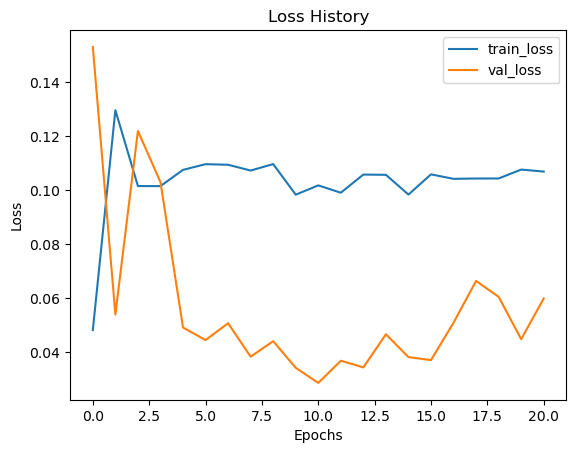

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

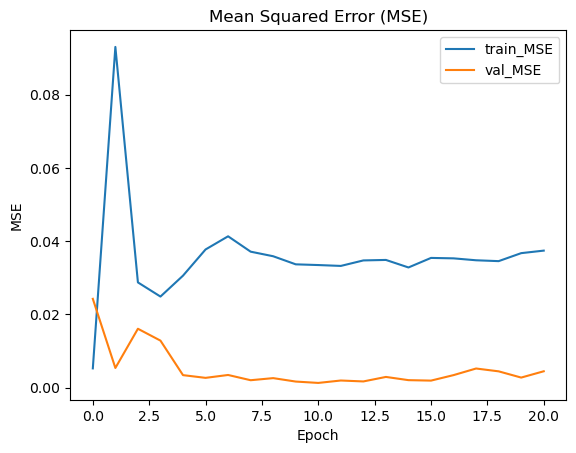

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

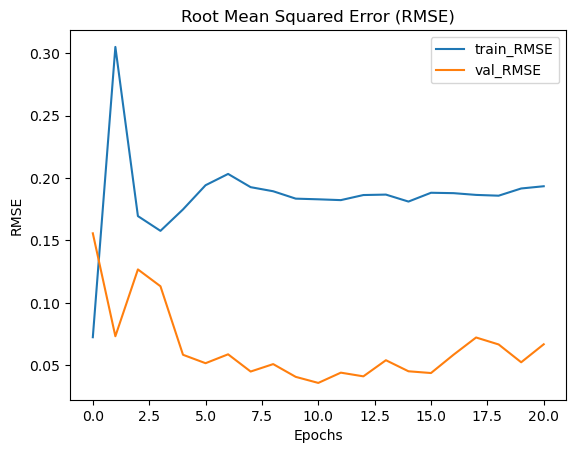

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

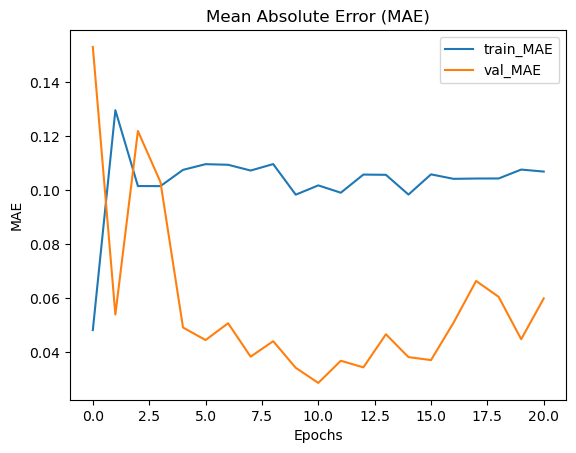

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

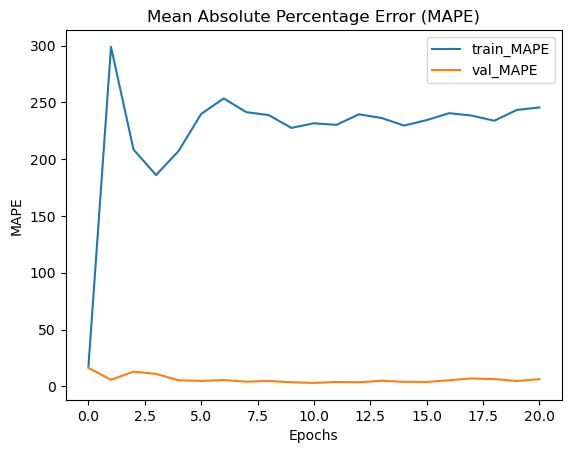

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:11:16.149829: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 3)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


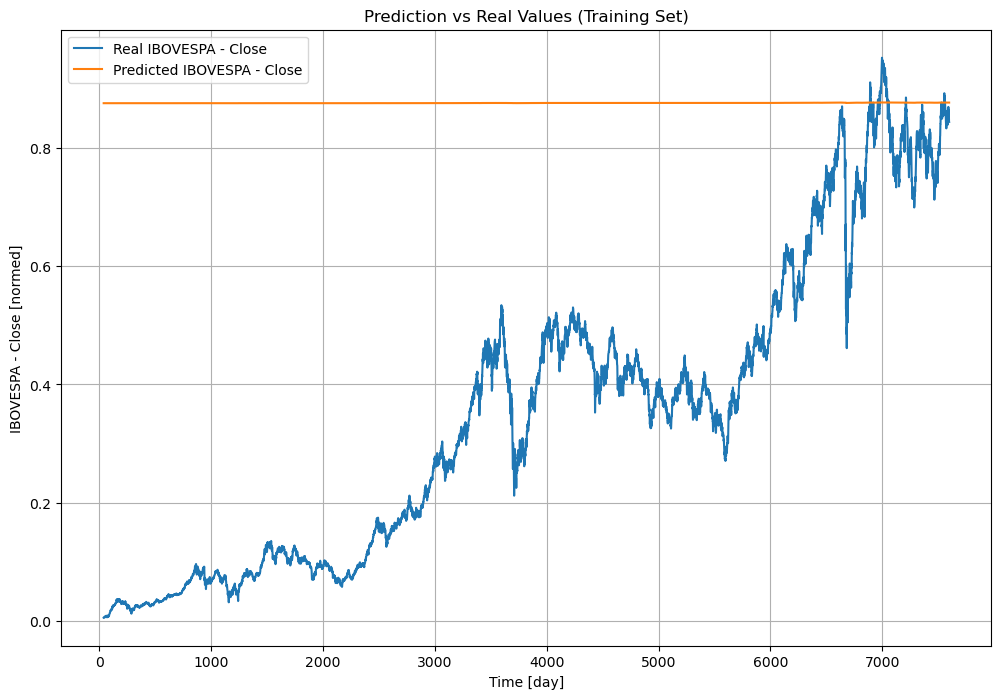

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 3)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


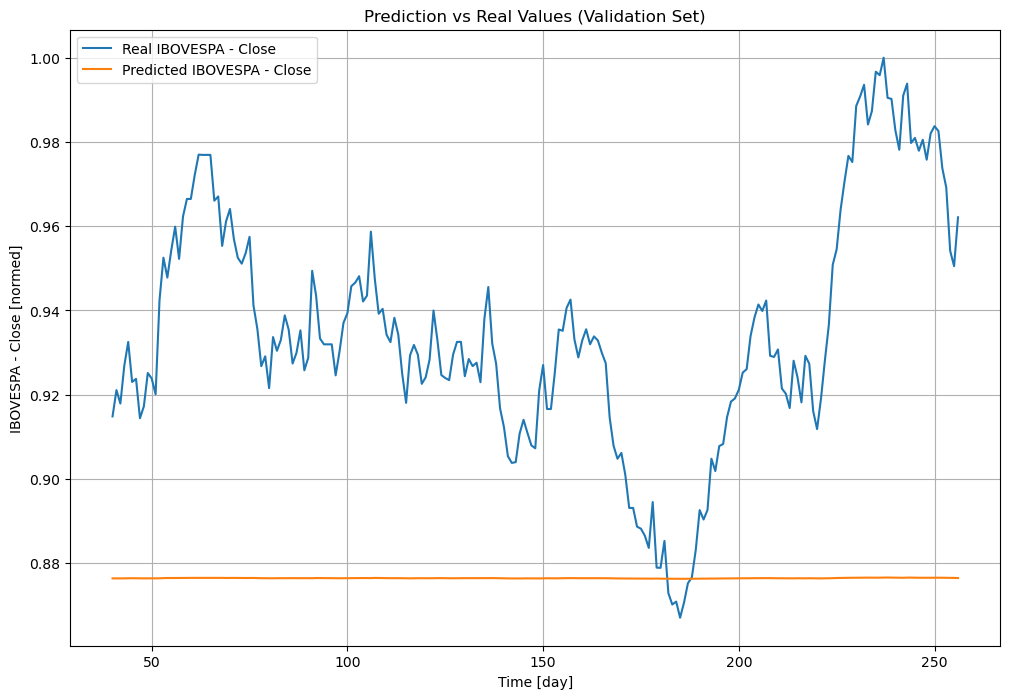

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 3)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


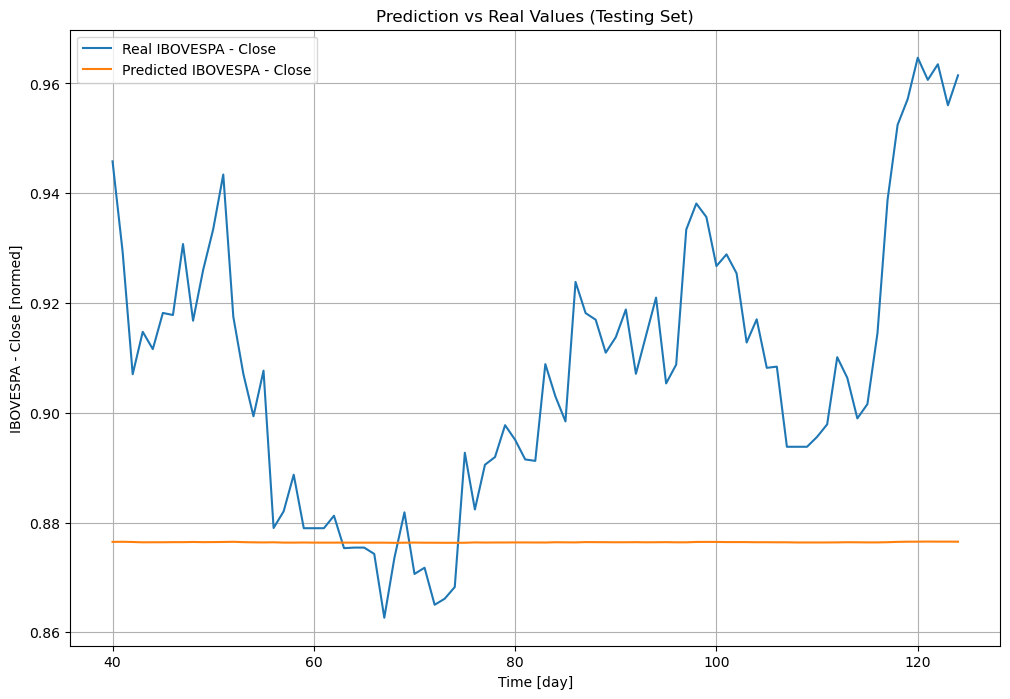

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

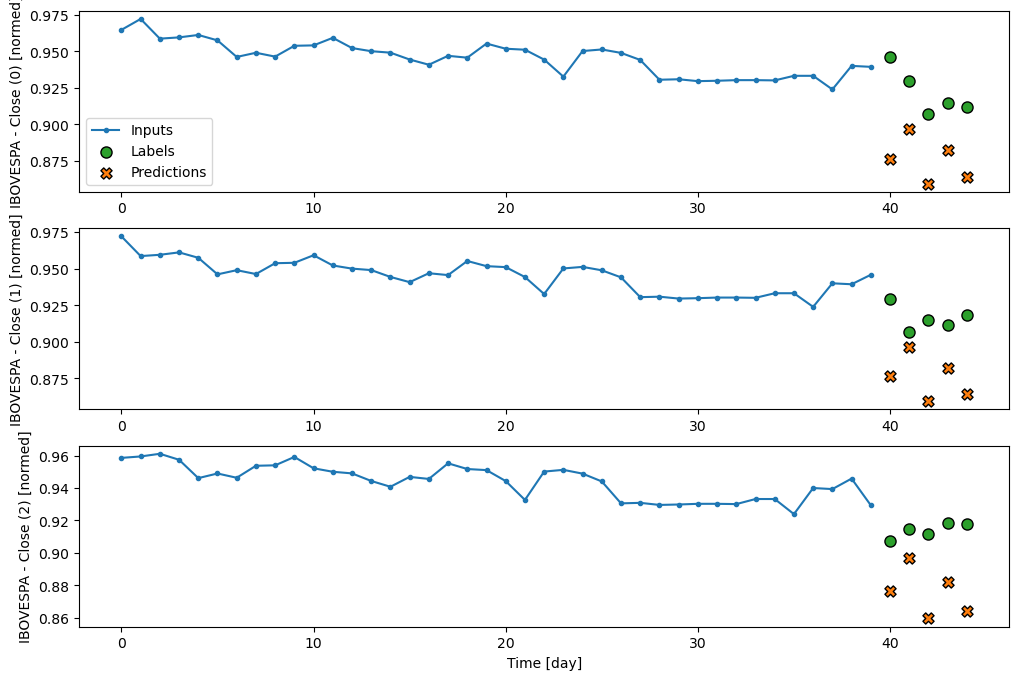

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:7s:411ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step


array([[[0.87647414, 0.87647414, 0.87647414, ..., 0.87647414,
         0.87647414, 0.87647414],
        [0.8967851 , 0.8967851 , 0.8967851 , ..., 0.8967851 ,
         0.8967851 , 0.8967851 ],
        [0.8595619 , 0.8595619 , 0.8595619 , ..., 0.8595619 ,
         0.8595619 , 0.8595619 ],
        [0.882293  , 0.882293  , 0.882293  , ..., 0.882293  ,
         0.882293  , 0.882293  ],
        [0.86410904, 0.86410904, 0.86410904, ..., 0.86410904,
         0.86410904, 0.86410904]],

       [[0.87649405, 0.87649405, 0.87649405, ..., 0.87649405,
         0.87649405, 0.87649405],
        [0.8967926 , 0.8967926 , 0.8967926 , ..., 0.8967926 ,
         0.8967926 , 0.8967926 ],
        [0.85958177, 0.85958177, 0.85958177, ..., 0.85958177,
         0.85958177, 0.85958177],
        [0.882326  , 0.882326  , 0.882326  , ..., 0.882326  ,
         0.882326  , 0.882326  ],
        [0.86413693, 0.86413693, 0.86413693, ..., 0.86413693,
         0.8641368 , 0.8641368 ]],

       [[0.8764566 , 0.8764566 , 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')